# Telco Customer Churn Rate and Profiling Machine Learning Modelling

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to **7043** customers. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer.  

**Part of CRM Dashboard Project**

![Project Overview](https://raw.githubusercontent.com/ravsssh/TelcoCustomer/refs/heads/main/1.png)

# CRM Dashboard (Work in Progress)

![Dashboard Homepage](https://raw.githubusercontent.com/ravsssh/TelcoCustomer/refs/heads/main/Dashboard%20-%20Homepage.png)

# 📦 Required Modules Installation  
Before running this notebook, ensure all dependencies are installed.

**Recommended:** Use the provided `requirements.txt` for a full environment setup:
```bash
pip install -r requirements.txt

# Modelling

## Load dataset from github repo

In [40]:
import pandas as pd
import numpy as np

# raw csv github link
url = 'https://raw.githubusercontent.com/ravsssh/UAS-Machine-Learning/refs/heads/main/CUSTOMER%20CHURN%20TELCO(in).csv'
df = pd.read_csv(url)

In [41]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


##  Create Dummy Location (For Data Visualization Purpose)

In [42]:
import random

provinces = [
    'Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kepulauan Riau', 
    'Jambi', 'Sumatera Selatan', 'Bangka Belitung', 'Bengkulu', 'Lampung', 
    'DKI Jakarta', 'Banten', 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 
    'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan', 
    'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara', 'Gorontalo', 
    'Sulawesi Tengah', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tenggara', 
    'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Maluku', 'Maluku Utara', 
    'Papua', 'Papua Barat', 'Papua Tengah', 'Papua Pegunungan', 'Papua Selatan', 
    'Papua Barat Daya'
]

df['province'] = np.random.choice(provinces, size=len(df))

# Pre-processing

## Explanatory Raw Data (Data Types, Unique Value)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Fix incorrect data types

In [38]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['tenure'] = df['tenure'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
def check_data_quality(df, target_column='Churn'):

    has_missing_values = df.isnull().values.any()
    missing_counts = df.isnull().sum()
    duplicate_rows = df.duplicated().sum()
    class_distribution = df[target_column].value_counts()
    class_distribution_pct = df[target_column].value_counts(normalize=True)
    
    print("\nIs there missing values:")
    print(has_missing_values)
    if has_missing_values:
        print("\nMissing values by column:")
        print(missing_counts[missing_counts > 0])
    
    print("\nDuplicate Rows:")
    print(duplicate_rows)
    
    print(f"\nClass Distribution ({target_column}):")
    print(class_distribution)
    print(class_distribution_pct)
    
    return {
        'has_missing_values': has_missing_values,
        'missing_counts': missing_counts,
        'duplicate_rows': duplicate_rows,
        'class_distribution': class_distribution,
        'class_distribution_pct': class_distribution_pct
    }

In [9]:
check_data_quality(df)


Is there missing values:
False

Duplicate Rows:
0

Class Distribution (Churn):
Churn
False    5174
True     1869
Name: count, dtype: int64
Churn
False    0.73463
True     0.26537
Name: proportion, dtype: float64


{'has_missing_values': False,
 'missing_counts': customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 province            0
 dtype: int64,
 'duplicate_rows': 0,
 'class_distribution': Churn
 False    5174
 True     1869
 Name: count, dtype: int64,
 'class_distribution_pct': Churn
 False    0.73463
 True     0.26537
 Name: proportion, dtype: float64}

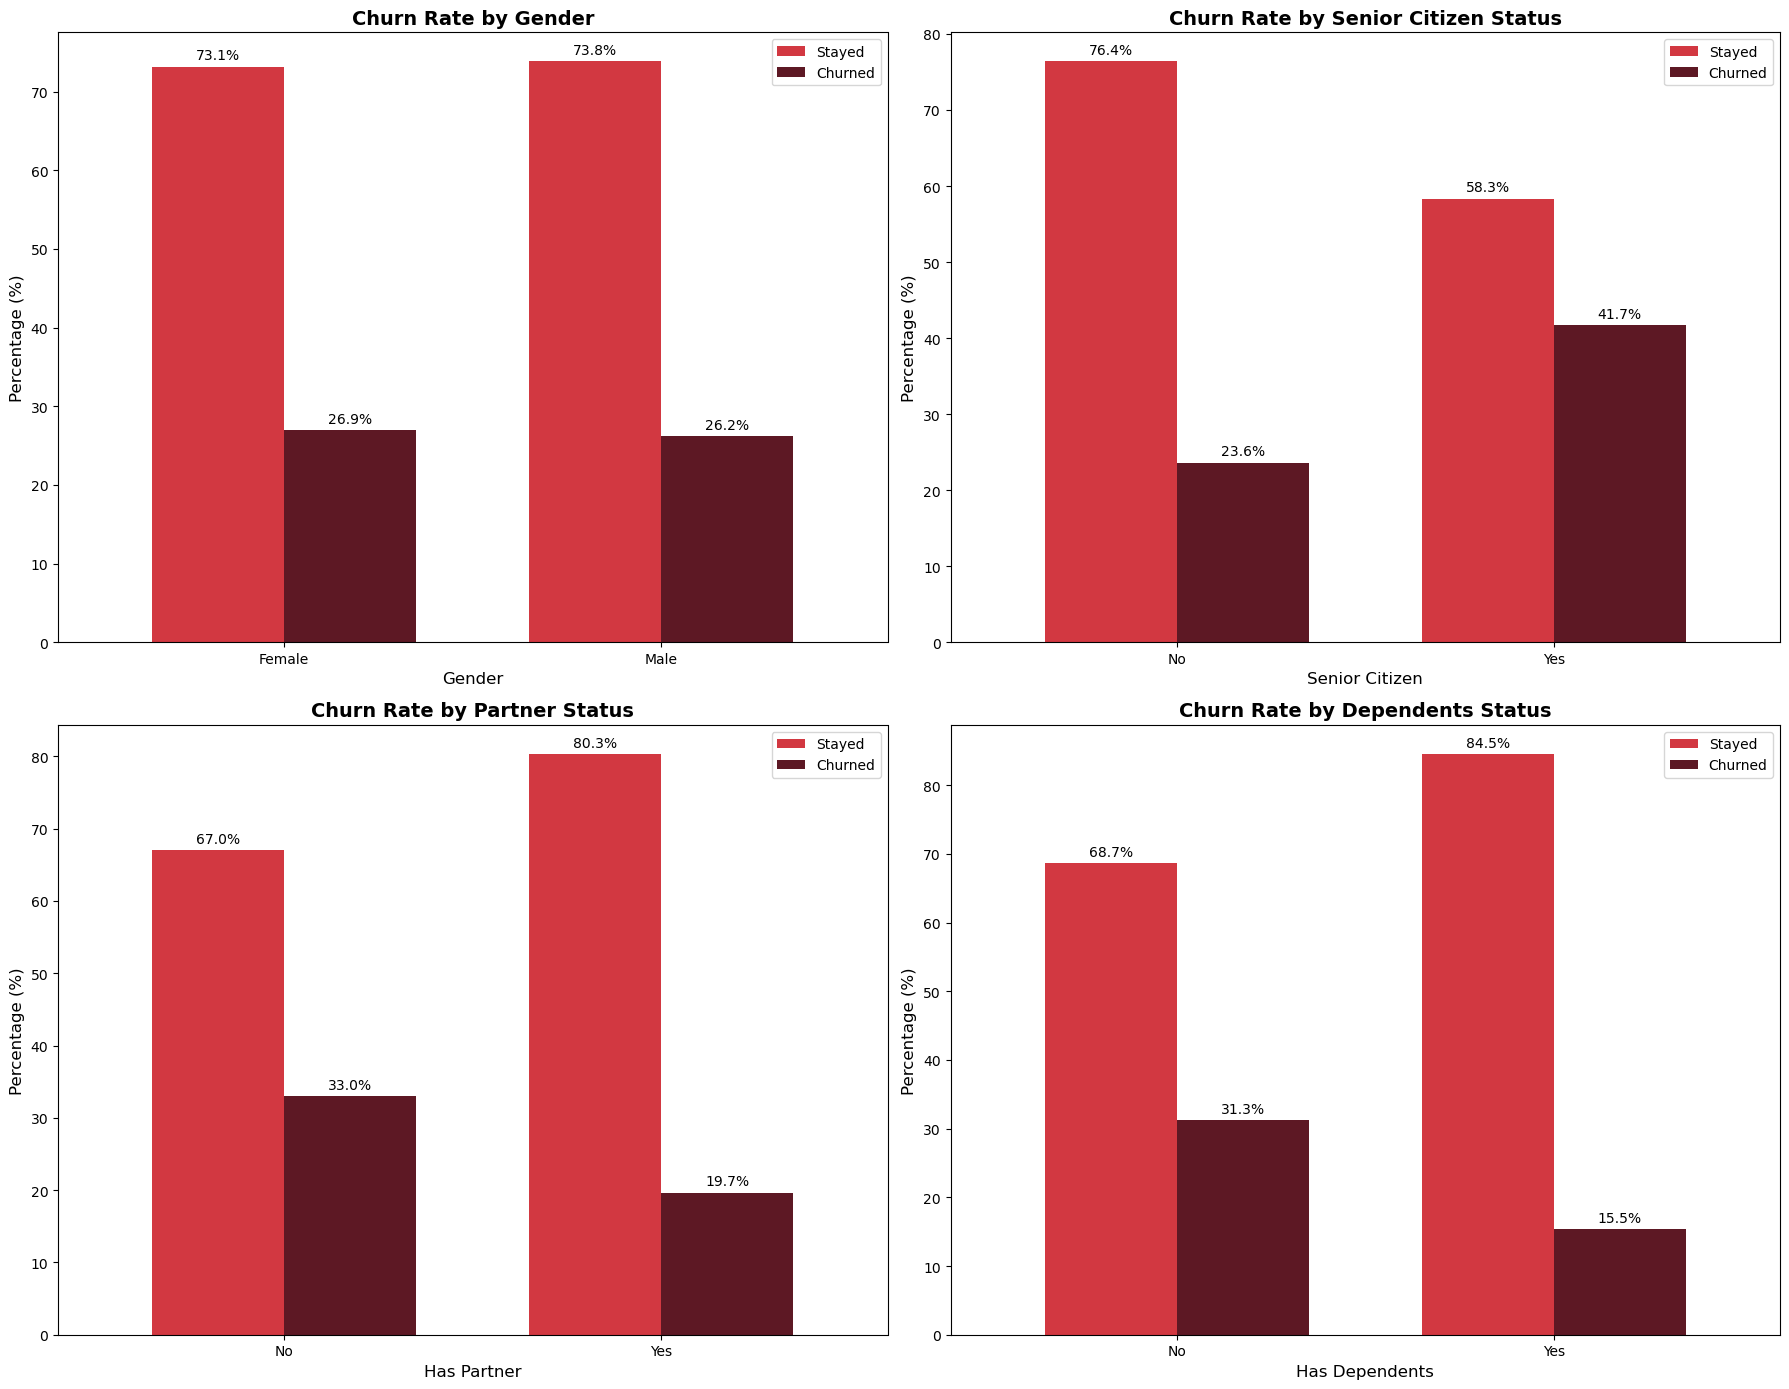

Churn Rate Summary by Segment:

By Gender:
gender
Female    26.920872
Male      26.160338
Name: True, dtype: float64

By Senior Citizen Status:
SeniorCitizen
True     41.681261
False    23.606168
Name: True, dtype: float64

By Partner Status:
Partner
No     32.957979
Yes    19.664903
Name: True, dtype: float64

By Dependents Status:
Dependents
No     31.279140
Yes    15.450237
Name: True, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Use the specified colors
colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Gender segmentation (top left)
gender_churn = df.groupby(['gender', 'Churn']).size().unstack()
gender_pct = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100

gender_pct.plot(kind='bar', ax=axes[0, 0], color=colors, width=0.7)
axes[0, 0].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Gender', fontsize=12)
axes[0, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 0].set_xticklabels(['Female', 'Male'], rotation=0)
axes[0, 0].legend(['Stayed', 'Churned'])

for p in axes[0, 0].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 0].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 2. Senior Citizen segmentation (top right)
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_pct = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100

senior_pct.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.7)
axes[0, 1].set_title('Churn Rate by Senior Citizen Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Senior Citizen', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[0, 1].legend(['Stayed', 'Churned'])

for p in axes[0, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 3. Partner segmentation (bottom left)
partner_churn = df.groupby(['Partner', 'Churn']).size().unstack()
partner_pct = partner_churn.div(partner_churn.sum(axis=1), axis=0) * 100

partner_pct.plot(kind='bar', ax=axes[1, 0], color=colors, width=0.7)
axes[1, 0].set_title('Churn Rate by Partner Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Has Partner', fontsize=12)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 0].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1, 0].legend(['Stayed', 'Churned'])

for p in axes[1, 0].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[1, 0].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 4. Dependents segmentation (bottom right)
dependents_churn = df.groupby(['Dependents', 'Churn']).size().unstack()
dependents_pct = dependents_churn.div(dependents_churn.sum(axis=1), axis=0) * 100

dependents_pct.plot(kind='bar', ax=axes[1, 1], color=colors, width=0.7)
axes[1, 1].set_title('Churn Rate by Dependents Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Has Dependents', fontsize=12)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1, 1].legend(['Stayed', 'Churned'])

for p in axes[1, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[1, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Churn Rate Summary by Segment:")
print("\nBy Gender:")
print(gender_pct[True].sort_values(ascending=False))

print("\nBy Senior Citizen Status:")
print(senior_pct[True].sort_values(ascending=False))

print("\nBy Partner Status:")
print(partner_pct[True].sort_values(ascending=False))

print("\nBy Dependents Status:")
print(dependents_pct[True].sort_values(ascending=False))

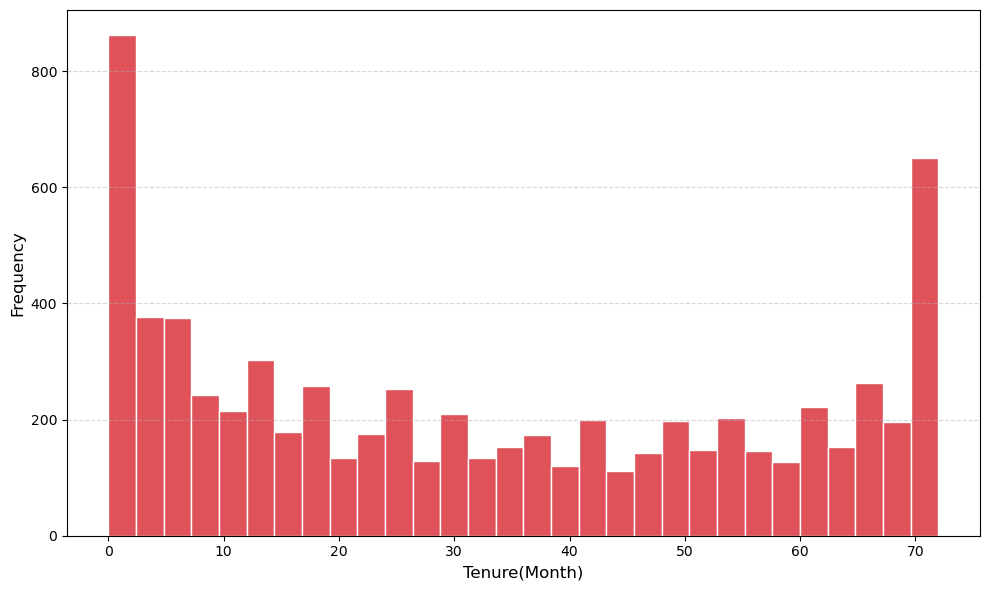

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=30, color='#DF525A', edgecolor='white')
plt.xlabel('Tenure(Month)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()



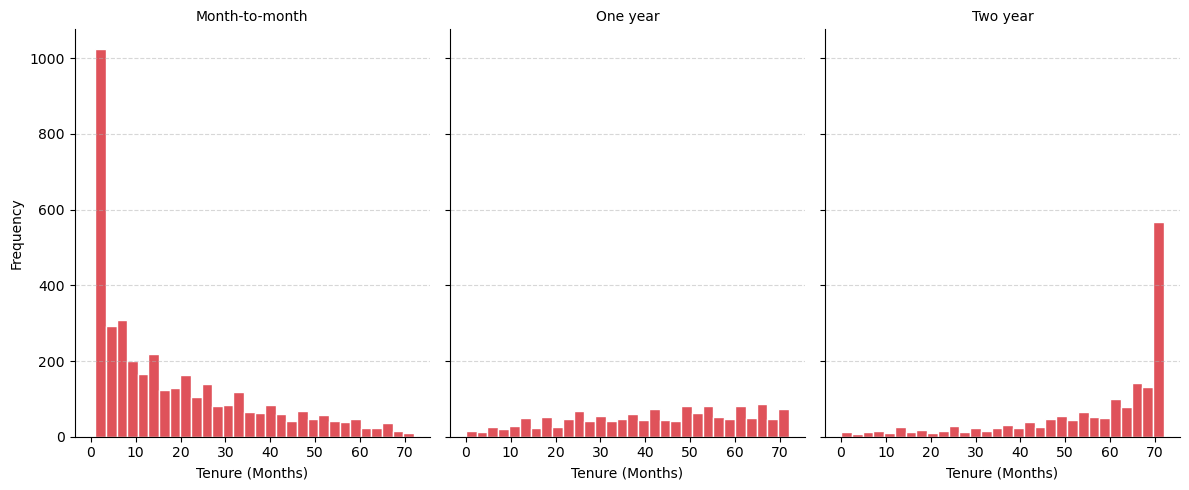

In [11]:
g = sns.FacetGrid(df, col='Contract', height=5, aspect=0.8)
g.map(plt.hist, 'tenure', bins=30, color='#DF525A', edgecolor='white')
g.set_axis_labels('Tenure (Months)', 'Frequency')
g.set_titles('{col_name}')
for ax in g.axes.flat:
    ax.grid(axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/hakam/anaconda3/envs/ravsss/lib/python

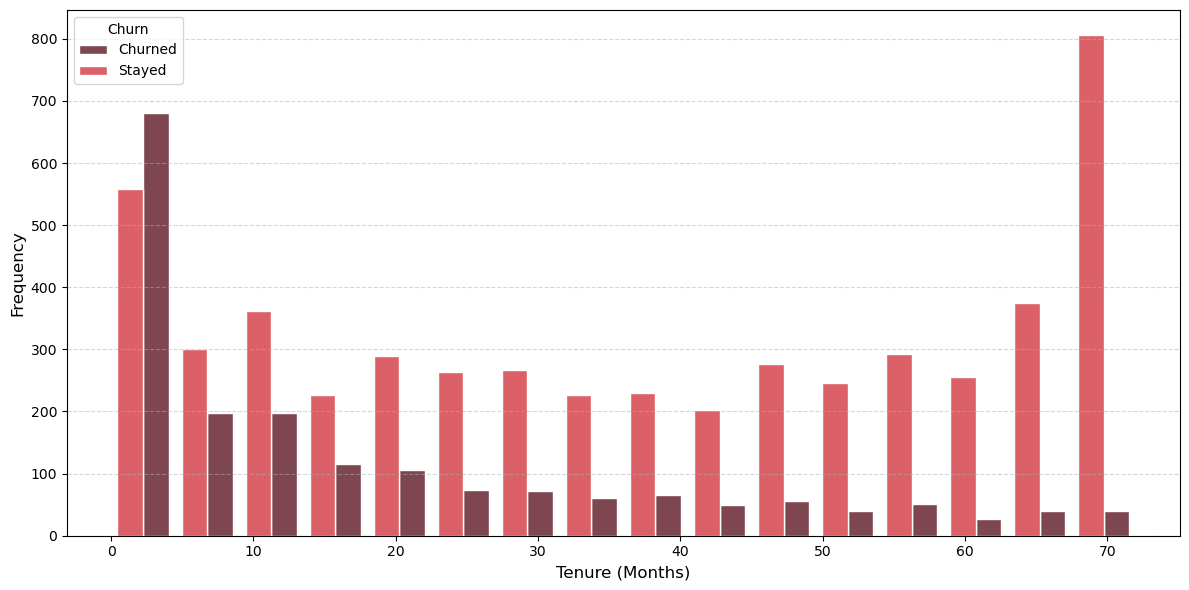

In [12]:
plt.figure(figsize=(12, 6))

# Create histogram with Churn as hue
sns.histplot(
    data=df, 
    x='tenure',
    hue='Churn',
    multiple='dodge',  # Places bars side by side
    palette={False: '#D23841', True: '#5D1824'},  # Using boolean keys instead of strings
    alpha=0.8,
    edgecolor='white',
    shrink=0.8  # Makes bars narrower for better comparison
)

plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.legend(title='Churn', labels=['Churned', 'Stayed'])  # Custom legend labels
plt.tight_layout()
plt.show()


/var/folders/gt/9l_ww84x3s50r3khtrn8mmf40000gn/T/ipykernel_25264/2273599461.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_category')['Churn'].mean().reset_index()
/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


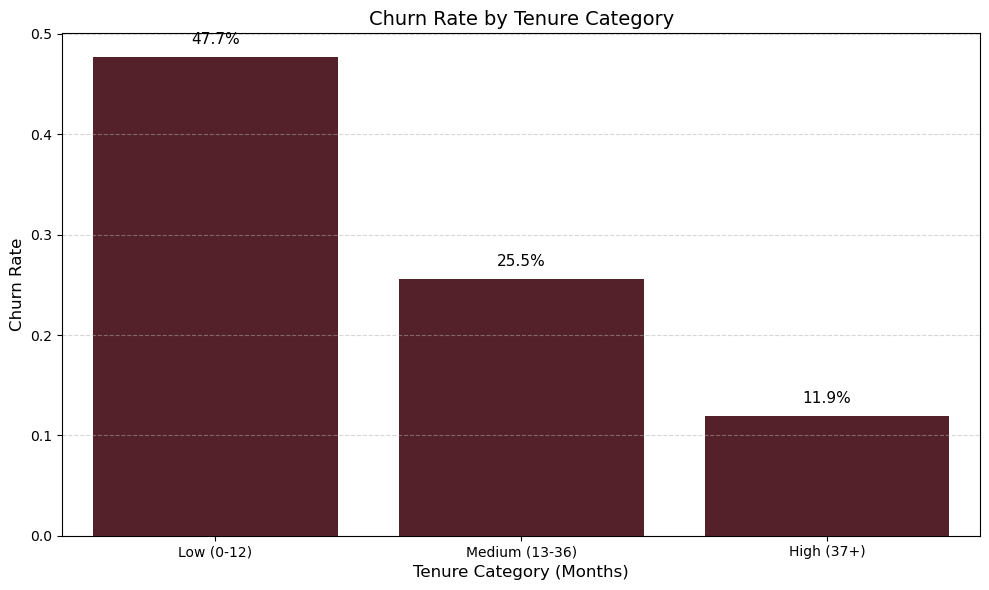

In [13]:
# Create tenure categories
df['tenure_category'] = pd.cut(df['tenure'], bins=[0, 12, 36, df['tenure'].max()], 
                              labels=['Low (0-12)', 'Medium (13-36)', 'High (37+)'])

# Calculate churn rate by tenure category
churn_by_tenure = df.groupby('tenure_category')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = sns.barplot(x='tenure_category', y='Churn', data=churn_by_tenure, color='#5D1824')

# Add percentage labels above each bar
for i, bar in enumerate(bars.patches):
    percentage = churn_by_tenure.iloc[i]['Churn'] * 100  # Convert to percentage
    bars.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.01,  # Position slightly above the bar
        f'{percentage:.1f}%',     # Format with 1 decimal place
        ha='center',              # Horizontal alignment
        va='bottom',              # Vertical alignment
        fontsize=11
    )

plt.title('Churn Rate by Tenure Category', fontsize=14)
plt.xlabel('Tenure Category (Months)', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

In [14]:
# Count first-year customers who churned
first_year_churn_count = df[(df['tenure'] <= 12) & (df['Churn'] == True)].shape[0]

# Get the total number of first-year customers for context
total_first_year = df[df['tenure'] <= 12].shape[0]

# Calculate the percentage
first_year_churn_percentage = (first_year_churn_count / total_first_year) * 100

print(f"First-year customers who churned: {first_year_churn_count}")
print(f"Total first-year customers: {total_first_year}")
print(f"Percentage of first-year customers who churned: {first_year_churn_percentage:.2f}%")

First-year customers who churned: 1037
Total first-year customers: 2186
Percentage of first-year customers who churned: 47.44%


## Check missing values, duplicate rows and class distribution

/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


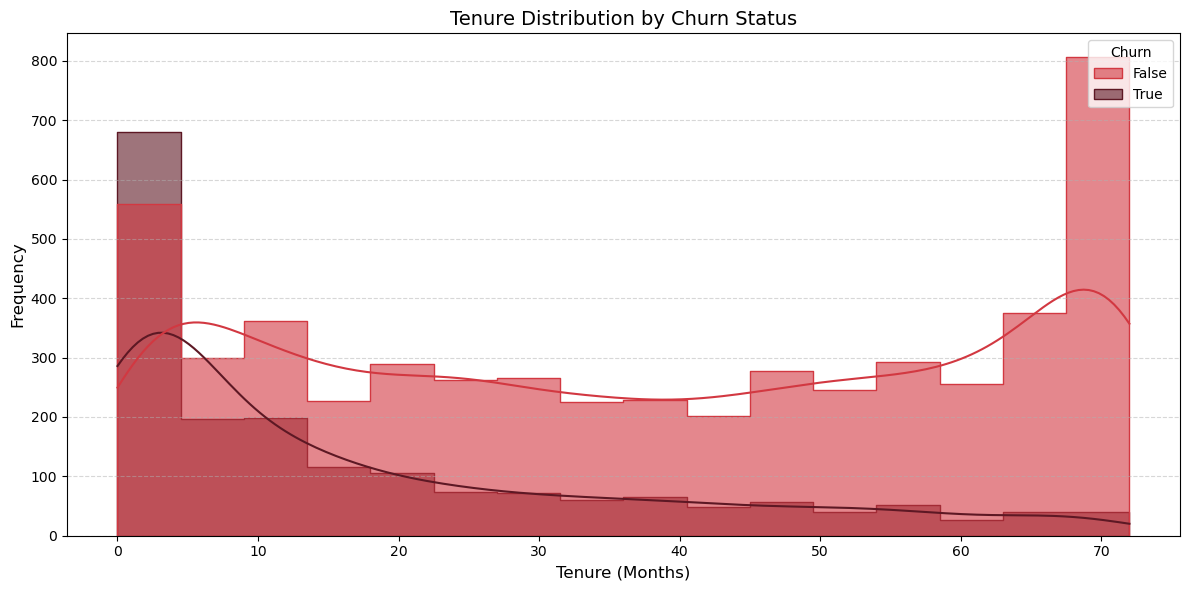

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element='step', 
             palette=['#D23841', '#5D1824'], alpha=0.6)
plt.title('Tenure Distribution by Churn Status', fontsize=14)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

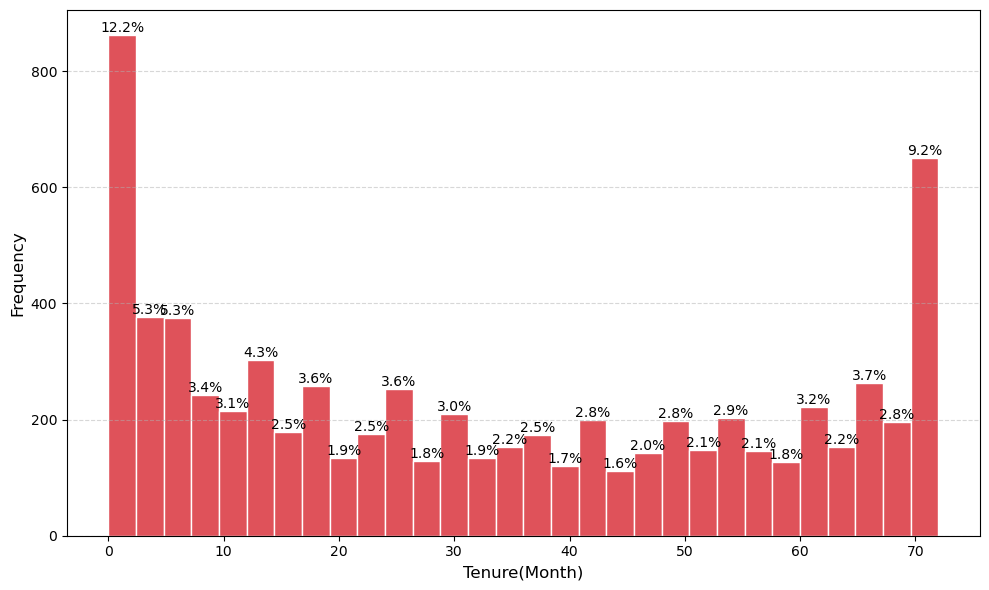

In [16]:
plt.figure(figsize=(10, 6))

# Get histogram data
counts, bins, _ = plt.hist(df['tenure'], bins=30, color='#DF525A', edgecolor='white')

# Calculate percentages
total = len(df['tenure'])
percentages = counts / total * 100

# Add percentage labels
for i in range(len(counts)):
    if counts[i] > 0:  # Only add labels to non-empty bins
        plt.text(
            (bins[i] + bins[i+1]) / 2,  # x position (center of bin)
            counts[i],                   # y position (height of bar)
            f'{percentages[i]:.1f}%',    # text (percentage with 1 decimal place)
            ha='center',                 # vertical alignment
            va='bottom'                  # horizontal alignment
        )

plt.xlabel('Tenure(Month)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

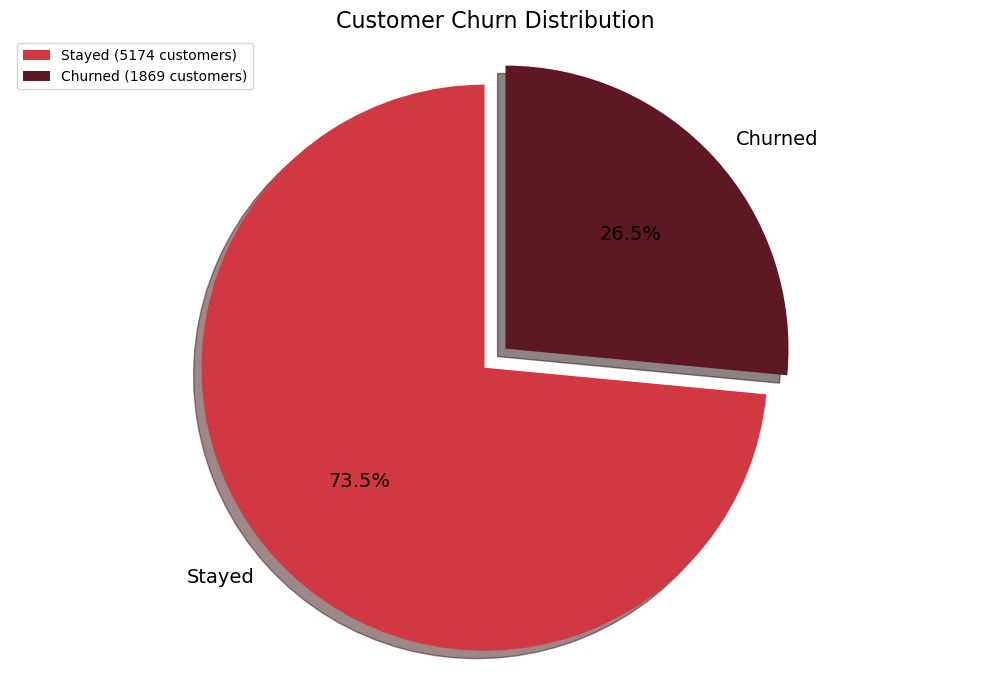

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts - these will use the boolean/int values
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True).round(3) * 100

# Create labels
labels = ['Stayed', 'Churned']
sizes = churn_pct.values

plt.figure(figsize=(10, 7))
colors = ['#D23841','#5D1824']  # Red for churned, Dark Red for stayed
explode = (0, 0.1)  # Explode the churned slice

plt.pie(sizes, 
        explode=explode, 
        labels=labels,
        colors=colors, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Customer Churn Distribution', fontsize=16)

# Fixed legend that uses the actual index values (False for stayed, True for churned)
plt.legend([f'Stayed ({churn_counts[False]} customers)', 
            f'Churned ({churn_counts[True]} customers)'])

plt.tight_layout()
plt.show()

## Check Unique Value for encoding and domain knowledge

In [10]:
unique_values_counts = df.nunique()
unique_values_counts

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
province              38
dtype: int64

In [11]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.73,2266.79,0.00,398.55,1394.55,3786.60,8684.80


In [12]:
excluded_columns = {
    'customerID', 'province'
}

included_columns = [col for col in df.columns if col not in excluded_columns]

In [13]:
df.drop(columns=excluded_columns, inplace=True)

In [14]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


## Label Encode

In [15]:
# encoding string column
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    unique_values = df[col].nunique()  
    if unique_values == 2: # binary encoding
        df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True) # one hot encoding, multiple string

In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,False,0,0,1,0,0,29.85,29.85,False,...,False,False,False,False,False,False,False,False,True,False
1,1,False,1,0,34,1,1,56.95,1889.50,False,...,False,False,False,False,False,True,False,False,False,True
2,1,False,1,0,2,1,0,53.85,108.15,True,...,False,False,False,False,False,False,False,False,False,True
3,1,False,1,0,45,0,1,42.30,1840.75,False,...,True,False,False,False,False,True,False,False,False,False
4,0,False,1,0,2,1,0,70.70,151.65,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,False,0,1,24,1,0,84.80,1990.50,False,...,True,False,True,False,True,True,False,False,False,True
7039,0,False,0,1,72,1,0,103.20,7362.90,False,...,False,False,True,False,True,True,False,True,False,False
7040,0,False,0,1,11,0,0,29.60,346.45,False,...,False,False,False,False,False,False,False,False,True,False
7041,1,True,0,0,4,1,0,74.40,306.60,True,...,False,False,False,False,False,False,False,False,False,True


In [17]:
# convert boolean true and false to 1 and 0
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

## Check data imbalance

In [18]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [19]:
class_distribution = df['Churn'].value_counts()
class_distribution_pct = df['Churn'].value_counts(normalize=True)    
print(f"\nClass Distribution:")
print(class_distribution)
print(class_distribution_pct)


Class Distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


## ANN modelling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(sampling_strategy='not minority', random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model = Sequential([
    Dense(32, 
          input_shape=(X_train.shape[1],),
          activation='relu',
          kernel_regularizer=l2(0.01)),  
    BatchNormalization(),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50


2025-05-27 22:14:36.968576: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


141/141 [==============================] - 0s 1ms/step - loss: 0.8875 - accuracy: 0.6856 - val_loss: 0.7005 - val_accuracy: 0.7728
Epoch 2/50
141/141 [==============================] - 0s 635us/step - loss: 0.6947 - accuracy: 0.7653 - val_loss: 0.6219 - val_accuracy: 0.7906
Epoch 3/50
141/141 [==============================] - 0s 643us/step - loss: 0.6211 - accuracy: 0.7792 - val_loss: 0.5783 - val_accuracy: 0.7915
Epoch 4/50
141/141 [==============================] - 0s 633us/step - loss: 0.5678 - accuracy: 0.7928 - val_loss: 0.5476 - val_accuracy: 0.7968
Epoch 5/50
141/141 [==============================] - 0s 629us/step - loss: 0.5274 - accuracy: 0.7957 - val_loss: 0.5278 - val_accuracy: 0.8004
Epoch 6/50
141/141 [==============================] - 0s 628us/step - loss: 0.5096 - accuracy: 0.7959 - val_loss: 0.5072 - val_accuracy: 0.7977
Epoch 7/50
141/141 [==============================] - 0s 633us/step - loss: 0.4854 - accuracy: 0.7994 - val_loss: 0.4934 - val_accuracy: 0.7968
Epoch

## Model evaluation (Confussion Matrix and Learning Curve)

45/45 [==============================] - 0s 420us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



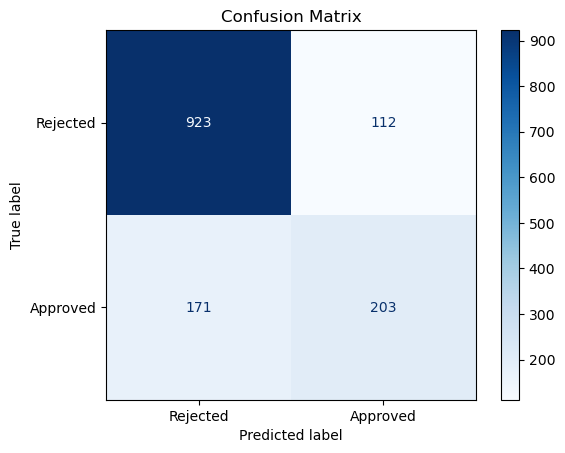

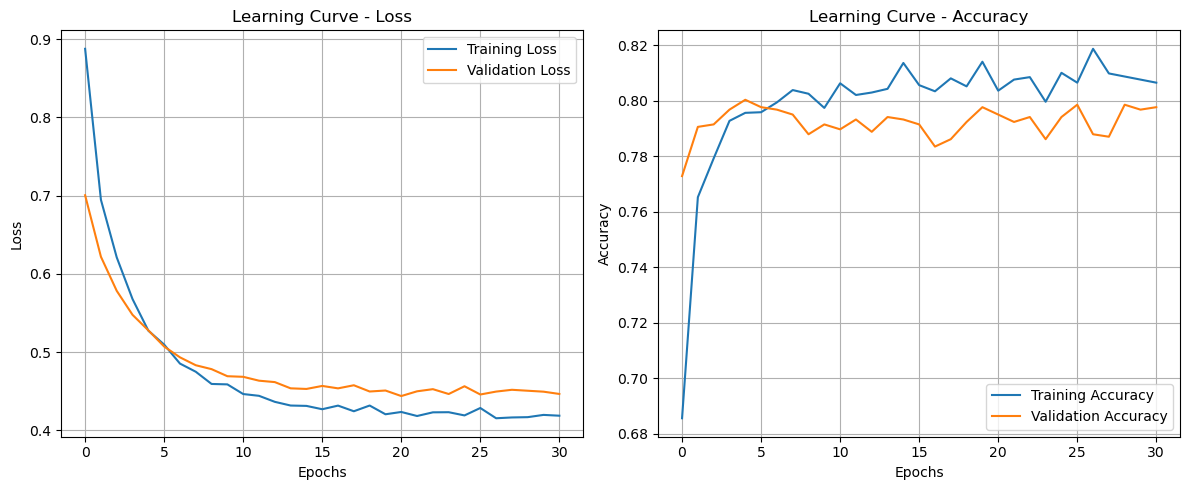

In [21]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Rejected', 'Approved'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# implemnet the model to original data

implement_df = pd.read_csv(url)
original_df = implement_df.copy()

# data preprocessing

## datatypes change
implement_df['SeniorCitizen'] = implement_df['SeniorCitizen'].astype(bool)
implement_df['TotalCharges'] = pd.to_numeric(implement_df['TotalCharges'], errors='coerce')
implement_df['TotalCharges'] = implement_df['TotalCharges'].fillna(0)
implement_df['TotalCharges'] = implement_df['TotalCharges'].astype(float)
implement_df['Churn'] = implement_df['Churn'].map({'Yes': True, 'No': False})
implement_df['MonthlyCharges'] = implement_df['MonthlyCharges'].astype(float)
implement_df['tenure'] = implement_df['tenure'].astype(int)

## drop unnecesary column
implement_df = implement_df.drop(columns=['customerID'])

## encoding string column
object_columns = implement_df.select_dtypes(include='object').columns
for col in object_columns:
    unique_values = implement_df[col].nunique()
    if unique_values == 2:
        # Binary encode columns with 2 unique values
        implement_df[col] = implement_df[col].map({implement_df[col].unique()[0]: 0, implement_df[col].unique()[1]: 1})
    else:
        # One-hot encode columns with more than 2 unique values
        implement_df = pd.get_dummies(implement_df, columns=[col], drop_first=True)

## convert boolean to int 1 and 0
implement_df = implement_df.astype({col: 'int' for col in implement_df.select_dtypes(include='bool').columns})

# get the actual features used in training (X columns)
X_columns = X.columns.tolist()

missing_cols = set(X_columns) - set(implement_df.columns)
for col in missing_cols:
    implement_df[col] = 0  # Add missing columns with default value

extra_cols = set(implement_df.columns) - set(X_columns) - {'Churn'}
implement_df = implement_df.drop(columns=extra_cols)

# reorder columns to match training data
implement_features = implement_df.drop(columns=['Churn'])
implement_features = implement_features[X_columns]

# scale the features using the same scaler used during training
implement_features_scaled = scaler.transform(implement_features)

# make predictions using the trained model
predictions_prob = model.predict(implement_features_scaled)
predictions = np.argmax(predictions_prob, axis=1)

# add predictions to the original dataframe
original_df['Churn_Predicted'] = predictions
original_df['Churn_Probability'] = predictions_prob[:, 1]  # Probability of class 1 (churn)

221/221 [==============================] - 0s 298us/step


# Churn Prediction and credit score (probability) result

In [23]:
original_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Predicted,Churn_Probability
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0.656504
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0.038679
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0.309377
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0.050993
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0.704371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,0.080703
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,0.090881
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,0.356295
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1,0.789477


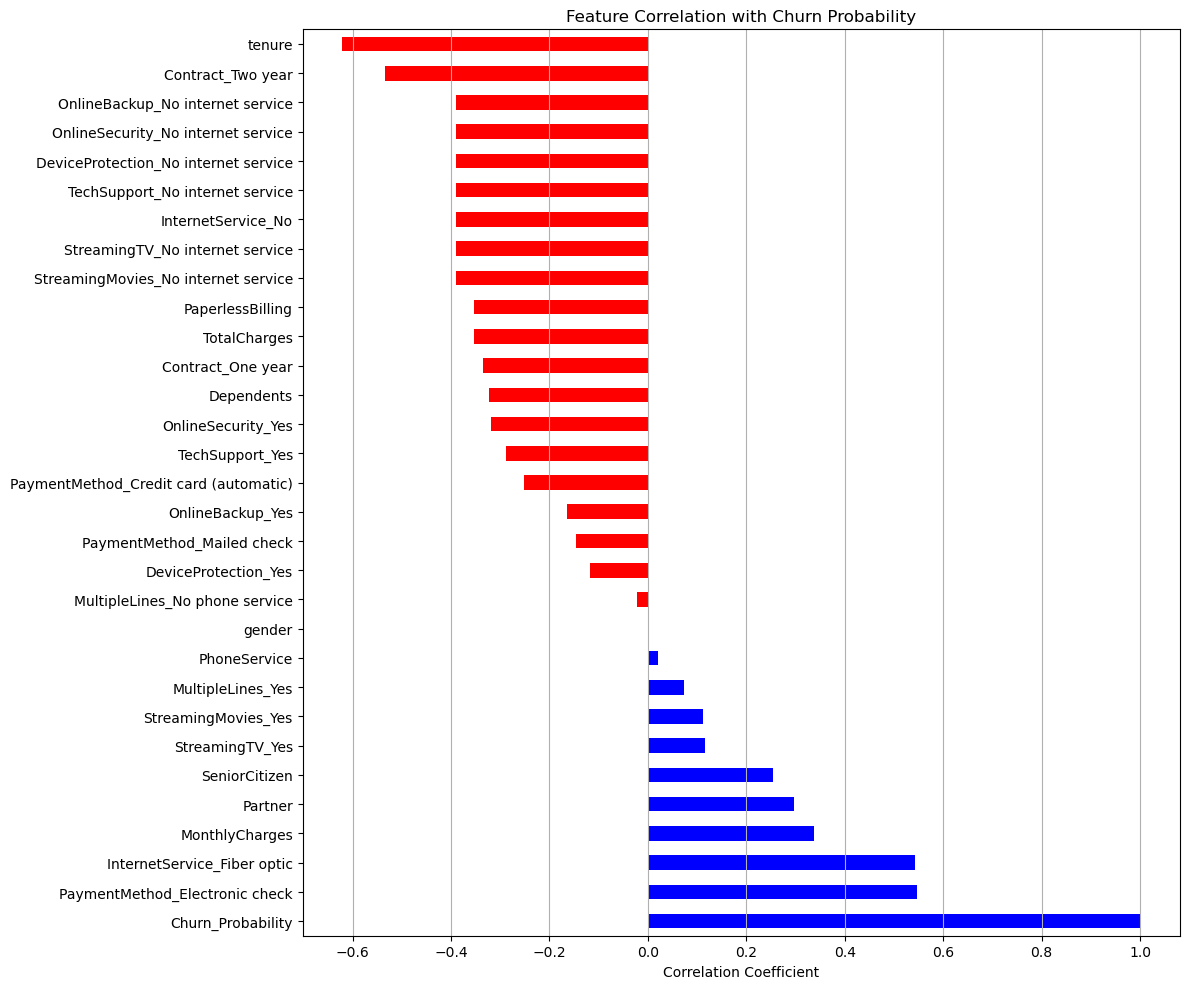

Top positively correlated features (increase churn):
Churn_Probability                 1.000000
PaymentMethod_Electronic check    0.545802
InternetService_Fiber optic       0.543065
MonthlyCharges                    0.336594
Partner                           0.296536
SeniorCitizen                     0.253824
StreamingTV_Yes                   0.115724
StreamingMovies_Yes               0.111764
MultipleLines_Yes                 0.073745
PhoneService                      0.021416
dtype: float64

Top negatively correlated features (decrease churn):
PaperlessBilling                       -0.352712
StreamingMovies_No internet service    -0.390775
StreamingTV_No internet service        -0.390775
InternetService_No                     -0.390775
TechSupport_No internet service        -0.390775
DeviceProtection_No internet service   -0.390775
OnlineSecurity_No internet service     -0.390775
OnlineBackup_No internet service       -0.390775
Contract_Two year                      -0.533043
tenure 

In [ ]:
# feature that correlate
correlation_df = implement_df.copy()
correlation_df['Churn_Probability'] = predictions_prob[:, 1]

# calculate correlation with churn probability for each feature
correlations = correlation_df.drop('Churn', axis=1).corrwith(correlation_df['Churn_Probability'])
correlations = correlations.sort_values(ascending=False)

# plot
plt.figure(figsize=(12, 10))
correlations.plot(kind='barh', color=correlations.map(lambda x: 'red' if x < 0 else 'blue'))
plt.title('Feature Correlation with Churn Probability')
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

print("Top positively correlated features (increase churn):")
print(correlations.head(10))
print("\nTop negatively correlated features (decrease churn):")
print(correlations.tail(10))

# Exploratory Data Analysis - Phone Services and Churn

This section analyzes how phone-related services affect customer churn behavior.

## Phone Service Analysis

Let's analyze how having phone service affects customer churn rates.

Phone Service Distribution:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Phone Service Distribution (%):
PhoneService
Yes    90.3
No      9.7
Name: proportion, dtype: float64


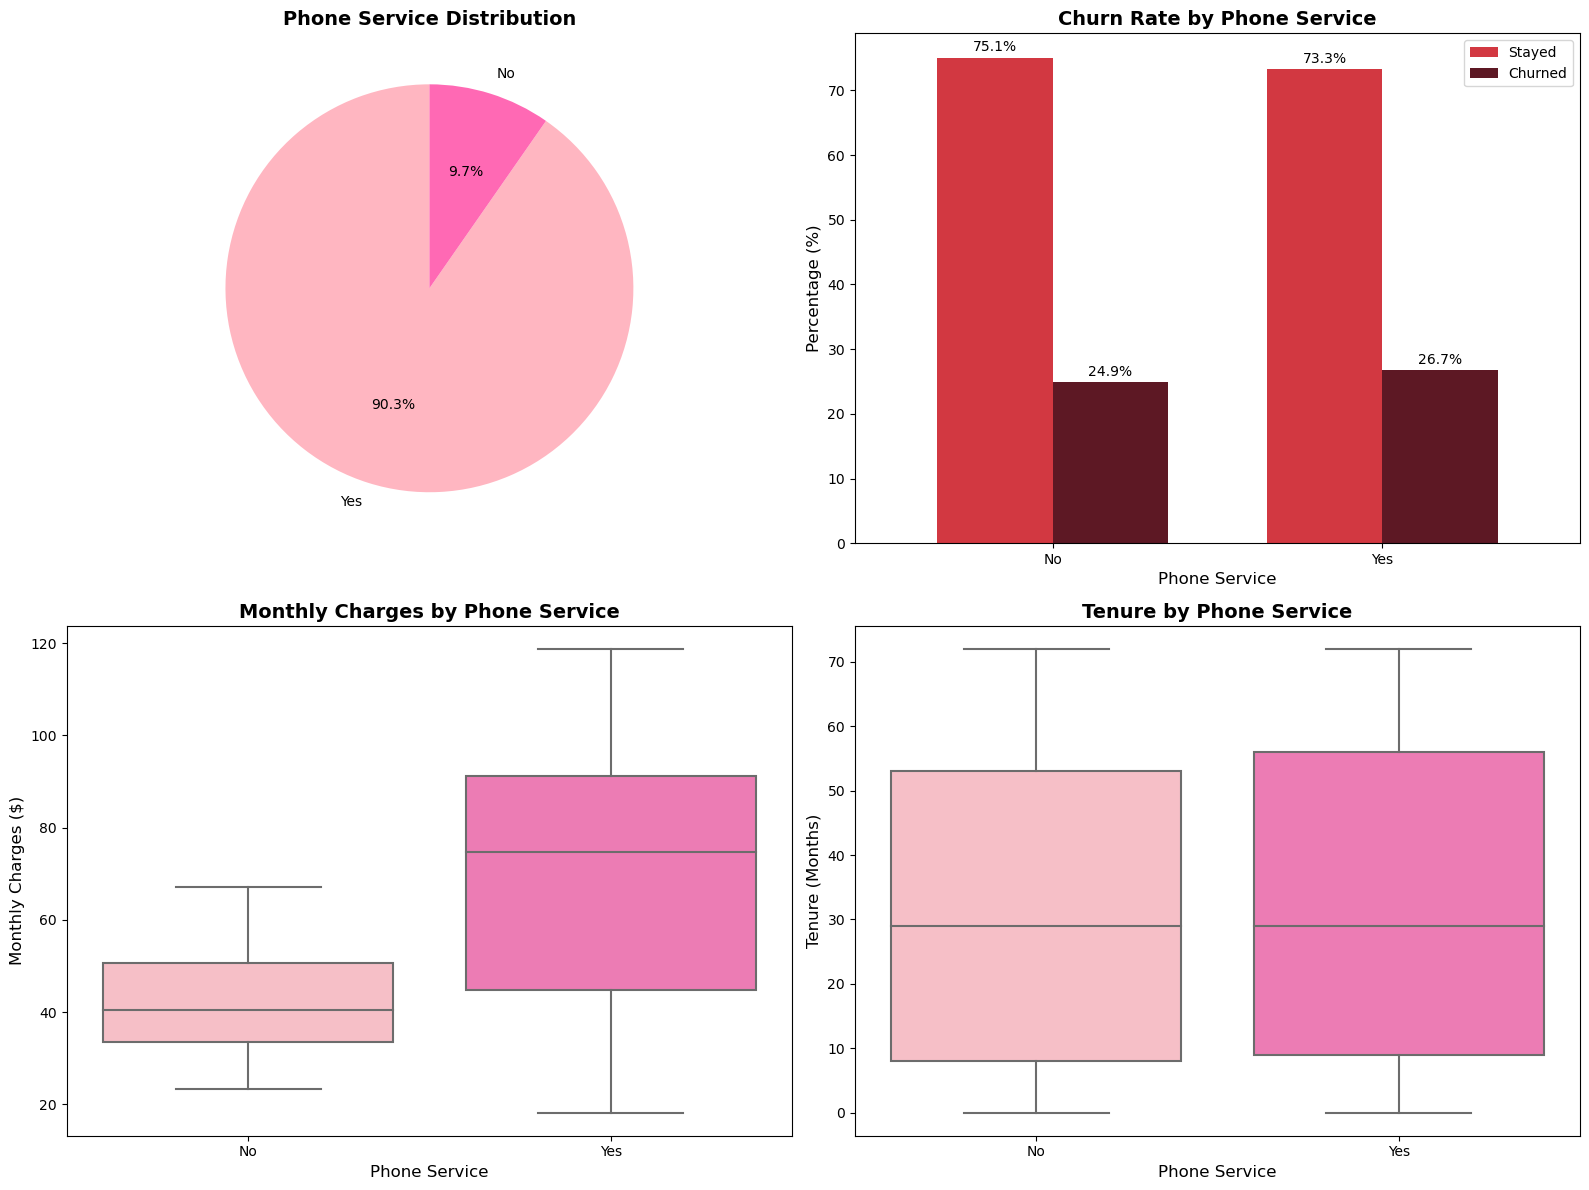


PHONE SERVICE DETAILED ANALYSIS

Churn Rate by Phone Service:
              Total_Customers  Churned_Count  Churn_Rate  Churn_Rate_Pct
PhoneService                                                            
No                        682            170       0.249            24.9
Yes                      6361           1699       0.267            26.7

Average Monthly Charges by Phone Service:
               mean  median    std
PhoneService                      
No            42.03   40.58  11.42
Yes           67.20   74.70  30.45

Average Tenure by Phone Service:
               mean  median    std
PhoneService                      
No            31.74    29.0  24.23
Yes           32.44    29.0  24.60


In [17]:
# Load original data for EDA
df_eda = pd.read_csv(url)

# Basic preprocessing for EDA
df_eda['SeniorCitizen'] = df_eda['SeniorCitizen'].astype(bool)
df_eda['TotalCharges'] = pd.to_numeric(df_eda['TotalCharges'], errors='coerce')
df_eda['TotalCharges'] = df_eda['TotalCharges'].fillna(0)
df_eda['TotalCharges'] = df_eda['TotalCharges'].astype(float)
df_eda['MonthlyCharges'] = df_eda['MonthlyCharges'].astype(float)
df_eda['tenure'] = df_eda['tenure'].astype(int)

# Convert Churn to boolean
df_eda['Churn'] = df_eda['Churn'].map({'Yes': True, 'No': False})

print("Phone Service Distribution:")
print(df_eda['PhoneService'].value_counts())
print("\nPhone Service Distribution (%):")
print(df_eda['PhoneService'].value_counts(normalize=True).round(3) * 100)

# Create comprehensive Phone Service analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Phone Service Distribution (top left)
phone_counts = df_eda['PhoneService'].value_counts()
axes[0, 0].pie(phone_counts.values, labels=phone_counts.index, autopct='%1.1f%%', 
               colors=['#FFB6C1', '#FF69B4'], startangle=90)
axes[0, 0].set_title('Phone Service Distribution', fontsize=14, fontweight='bold')

# 2. Churn Rate by Phone Service (top right)
phone_churn = df_eda.groupby(['PhoneService', 'Churn']).size().unstack()
phone_churn_pct = phone_churn.div(phone_churn.sum(axis=1), axis=0) * 100

phone_churn_pct.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.7)
axes[0, 1].set_title('Churn Rate by Phone Service', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Phone Service', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[0, 1].legend(['Stayed', 'Churned'])

# Add percentage labels
for p in axes[0, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 3. Phone Service vs Monthly Charges (bottom left)
sns.boxplot(data=df_eda, x='PhoneService', y='MonthlyCharges', ax=axes[1, 0], 
            palette=['#FFB6C1', '#FF69B4'])
axes[1, 0].set_title('Monthly Charges by Phone Service', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Phone Service', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)

# 4. Phone Service vs Tenure (bottom right)
sns.boxplot(data=df_eda, x='PhoneService', y='tenure', ax=axes[1, 1], 
            palette=['#FFB6C1', '#FF69B4'])
axes[1, 1].set_title('Tenure by Phone Service', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Phone Service', fontsize=12)
axes[1, 1].set_ylabel('Tenure (Months)', fontsize=12)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("PHONE SERVICE DETAILED ANALYSIS")
print("="*60)

print("\nChurn Rate by Phone Service:")
churn_by_phone = df_eda.groupby('PhoneService')['Churn'].agg(['count', 'sum', 'mean']).round(3)
churn_by_phone.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
churn_by_phone['Churn_Rate_Pct'] = (churn_by_phone['Churn_Rate'] * 100).round(2)
print(churn_by_phone)

print("\nAverage Monthly Charges by Phone Service:")
monthly_charges_stats = df_eda.groupby('PhoneService')['MonthlyCharges'].agg(['mean', 'median', 'std']).round(2)
print(monthly_charges_stats)

print("\nAverage Tenure by Phone Service:")
tenure_stats = df_eda.groupby('PhoneService')['tenure'].agg(['mean', 'median', 'std']).round(2)
print(tenure_stats)

## Multiple Lines Analysis

Multiple Lines is closely related to Phone Service. Let's analyze how having multiple phone lines affects churn rates.

Multiple Lines Distribution:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Multiple Lines Distribution (%):
MultipleLines
No                  48.1
Yes                 42.2
No phone service     9.7
Name: proportion, dtype: float64


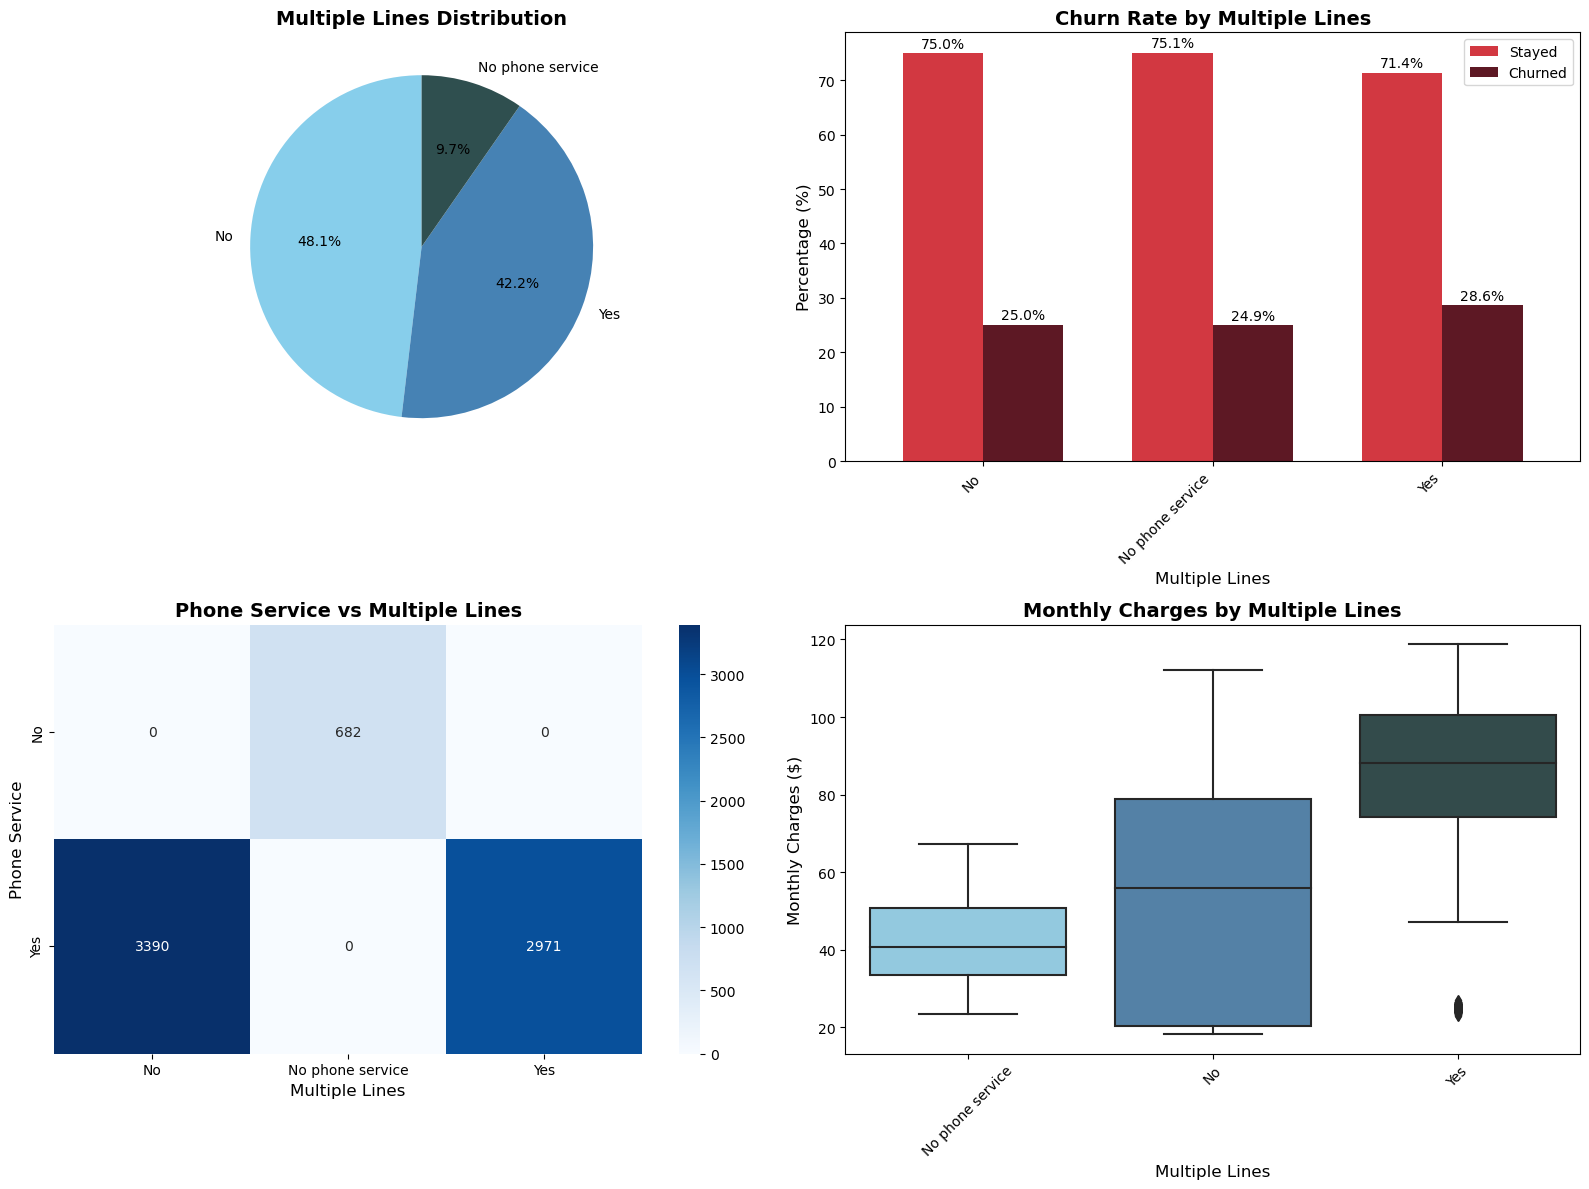


MULTIPLE LINES DETAILED ANALYSIS

Churn Rate by Multiple Lines:
                  Total_Customers  Churned_Count  Churn_Rate  Churn_Rate_Pct
MultipleLines                                                               
No                           3390            849       0.250            25.0
No phone service              682            170       0.249            24.9
Yes                          2971            850       0.286            28.6

Cross-tabulation: Phone Service vs Multiple Lines:
MultipleLines    No  No phone service   Yes   All
PhoneService                                     
No                0               682     0   682
Yes            3390                 0  2971  6361
All            3390               682  2971  7043

Churn Rate by Phone Service & Multiple Lines Combination:
                               Churn_Rate_Pct
PhoneService MultipleLines                   
No           No phone service            24.9
Yes          No                          25.0
     

In [18]:
# Multiple Lines Analysis
print("Multiple Lines Distribution:")
print(df_eda['MultipleLines'].value_counts())
print("\nMultiple Lines Distribution (%):")
print(df_eda['MultipleLines'].value_counts(normalize=True).round(3) * 100)

# Create comprehensive Multiple Lines analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 1. Multiple Lines Distribution (top left)
lines_counts = df_eda['MultipleLines'].value_counts()
axes[0, 0].pie(lines_counts.values, labels=lines_counts.index, autopct='%1.1f%%', 
               colors=['#87CEEB', '#4682B4', '#2F4F4F'], startangle=90)
axes[0, 0].set_title('Multiple Lines Distribution', fontsize=14, fontweight='bold')

# 2. Churn Rate by Multiple Lines (top right)
lines_churn = df_eda.groupby(['MultipleLines', 'Churn']).size().unstack()
lines_churn_pct = lines_churn.div(lines_churn.sum(axis=1), axis=0) * 100

lines_churn_pct.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.7)
axes[0, 1].set_title('Churn Rate by Multiple Lines', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Multiple Lines', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].legend(['Stayed', 'Churned'])

# Add percentage labels
for p in axes[0, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 3. Cross-analysis: Phone Service vs Multiple Lines (bottom left)
cross_tab = pd.crosstab(df_eda['PhoneService'], df_eda['MultipleLines'], margins=True)
sns.heatmap(cross_tab.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Phone Service vs Multiple Lines', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Multiple Lines', fontsize=12)
axes[1, 0].set_ylabel('Phone Service', fontsize=12)

# 4. Monthly Charges by Multiple Lines (bottom right)
sns.boxplot(data=df_eda, x='MultipleLines', y='MonthlyCharges', ax=axes[1, 1], 
            palette=['#87CEEB', '#4682B4', '#2F4F4F'])
axes[1, 1].set_title('Monthly Charges by Multiple Lines', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Multiple Lines', fontsize=12)
axes[1, 1].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed statistics for Multiple Lines
print("\n" + "="*60)
print("MULTIPLE LINES DETAILED ANALYSIS")
print("="*60)

print("\nChurn Rate by Multiple Lines:")
churn_by_lines = df_eda.groupby('MultipleLines')['Churn'].agg(['count', 'sum', 'mean']).round(3)
churn_by_lines.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
churn_by_lines['Churn_Rate_Pct'] = (churn_by_lines['Churn_Rate'] * 100).round(2)
print(churn_by_lines)

print("\nCross-tabulation: Phone Service vs Multiple Lines:")
print(cross_tab)

print("\nChurn Rate by Phone Service & Multiple Lines Combination:")
combo_churn = df_eda.groupby(['PhoneService', 'MultipleLines'])['Churn'].mean().round(3) * 100
print(combo_churn.to_frame('Churn_Rate_Pct'))

# Statistical test for phone services
from scipy.stats import chi2_contingency

# Chi-square test for Phone Service vs Churn
phone_contingency = pd.crosstab(df_eda['PhoneService'], df_eda['Churn'])
chi2_phone, p_value_phone, dof_phone, expected_phone = chi2_contingency(phone_contingency)

# Chi-square test for Multiple Lines vs Churn
lines_contingency = pd.crosstab(df_eda['MultipleLines'], df_eda['Churn'])
chi2_lines, p_value_lines, dof_lines, expected_lines = chi2_contingency(lines_contingency)

print("\n" + "="*60)
print("STATISTICAL TESTS")
print("="*60)

print(f"\nPhone Service vs Churn:")
print(f"Chi-square statistic: {chi2_phone:.4f}")
print(f"P-value: {p_value_phone:.4f}")
print(f"Degrees of freedom: {dof_phone}")
print(f"Significant association: {'Yes' if p_value_phone < 0.05 else 'No'}")

print(f"\nMultiple Lines vs Churn:")
print(f"Chi-square statistic: {chi2_lines:.4f}")
print(f"P-value: {p_value_lines:.4f}")
print(f"Degrees of freedom: {dof_lines}")
print(f"Significant association: {'Yes' if p_value_lines < 0.05 else 'No'}")

## Phone Services - Key Insights and Correlations

Summary of findings from the phone services analysis:

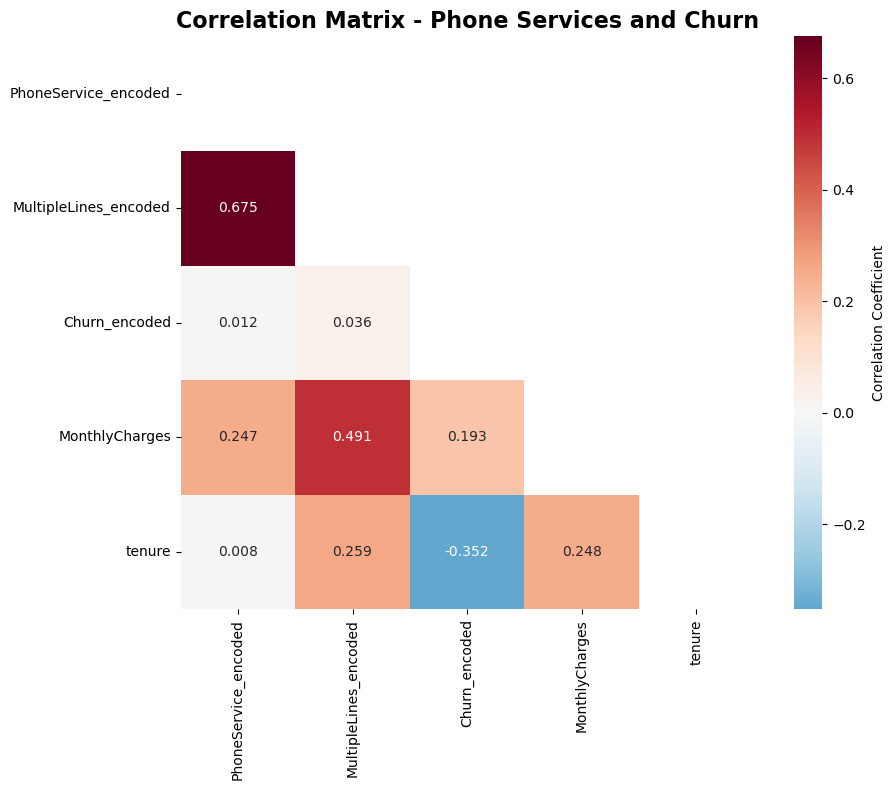

PHONE SERVICES - KEY INSIGHTS

📊 CORRELATION ANALYSIS:
Phone Service - Churn Correlation: 0.0119
Multiple Lines - Churn Correlation: 0.0363

🔍 KEY FINDINGS:

1. PHONE SERVICE IMPACT:
   • Customers with Phone Service: 26.7% churn rate
   • Customers without Phone Service: 24.9% churn rate
   • Difference: 1.8 percentage points

2. MULTIPLE LINES IMPACT:
   • Customers with Multiple Lines: 28.6% churn rate
   • Single Line customers: 25.0% churn rate
   • No Phone Service: 24.9% churn rate

3. PRICING ANALYSIS:
   • Average Monthly Charges (Phone Service): $67.20
   • Average Monthly Charges (No Phone Service): $42.03
   • Price Difference: $25.17

4. CUSTOMER LOYALTY (TENURE):
   • Average Tenure (Phone Service): 32.4 months
   • Average Tenure (No Phone Service): 31.7 months
   • Tenure Difference: 0.7 months

💡 BUSINESS RECOMMENDATIONS:
   1. Phone service customers have higher churn - investigate service quality
   2. Multiple lines don't significantly reduce churn - review pricing 

In [19]:
# Calculate correlations with churn for phone-related features
phone_features = ['PhoneService', 'MultipleLines']

# Create numerical encodings for correlation analysis
df_corr = df_eda.copy()

# Encode categorical variables for correlation
df_corr['PhoneService_encoded'] = df_corr['PhoneService'].map({'No': 0, 'Yes': 1})
df_corr['MultipleLines_encoded'] = df_corr['MultipleLines'].map({
    'No phone service': 0, 'No': 1, 'Yes': 2
})
df_corr['Churn_encoded'] = df_corr['Churn'].astype(int)

# Calculate correlations
correlation_matrix = df_corr[['PhoneService_encoded', 'MultipleLines_encoded', 
                             'Churn_encoded', 'MonthlyCharges', 'tenure']].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='RdBu_r', 
            center=0,
            mask=mask,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix - Phone Services and Churn', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print correlation insights
print("="*70)
print("PHONE SERVICES - KEY INSIGHTS")
print("="*70)

print("\n📊 CORRELATION ANALYSIS:")
print(f"Phone Service - Churn Correlation: {correlation_matrix.loc['PhoneService_encoded', 'Churn_encoded']:.4f}")
print(f"Multiple Lines - Churn Correlation: {correlation_matrix.loc['MultipleLines_encoded', 'Churn_encoded']:.4f}")

print("\n🔍 KEY FINDINGS:")

# Phone Service insights
phone_yes_churn = df_eda[df_eda['PhoneService'] == 'Yes']['Churn'].mean() * 100
phone_no_churn = df_eda[df_eda['PhoneService'] == 'No']['Churn'].mean() * 100

print(f"\n1. PHONE SERVICE IMPACT:")
print(f"   • Customers with Phone Service: {phone_yes_churn:.1f}% churn rate")
print(f"   • Customers without Phone Service: {phone_no_churn:.1f}% churn rate")
print(f"   • Difference: {abs(phone_yes_churn - phone_no_churn):.1f} percentage points")

# Multiple Lines insights
lines_yes_churn = df_eda[df_eda['MultipleLines'] == 'Yes']['Churn'].mean() * 100
lines_no_churn = df_eda[df_eda['MultipleLines'] == 'No']['Churn'].mean() * 100
no_phone_churn = df_eda[df_eda['MultipleLines'] == 'No phone service']['Churn'].mean() * 100

print(f"\n2. MULTIPLE LINES IMPACT:")
print(f"   • Customers with Multiple Lines: {lines_yes_churn:.1f}% churn rate")
print(f"   • Single Line customers: {lines_no_churn:.1f}% churn rate")
print(f"   • No Phone Service: {no_phone_churn:.1f}% churn rate")

# Monthly charges analysis
phone_yes_charges = df_eda[df_eda['PhoneService'] == 'Yes']['MonthlyCharges'].mean()
phone_no_charges = df_eda[df_eda['PhoneService'] == 'No']['MonthlyCharges'].mean()

print(f"\n3. PRICING ANALYSIS:")
print(f"   • Average Monthly Charges (Phone Service): ${phone_yes_charges:.2f}")
print(f"   • Average Monthly Charges (No Phone Service): ${phone_no_charges:.2f}")
print(f"   • Price Difference: ${abs(phone_yes_charges - phone_no_charges):.2f}")

# Tenure analysis
phone_yes_tenure = df_eda[df_eda['PhoneService'] == 'Yes']['tenure'].mean()
phone_no_tenure = df_eda[df_eda['PhoneService'] == 'No']['tenure'].mean()

print(f"\n4. CUSTOMER LOYALTY (TENURE):")
print(f"   • Average Tenure (Phone Service): {phone_yes_tenure:.1f} months")
print(f"   • Average Tenure (No Phone Service): {phone_no_tenure:.1f} months")
print(f"   • Tenure Difference: {abs(phone_yes_tenure - phone_no_tenure):.1f} months")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
print("   1. Phone service customers have higher churn - investigate service quality")
print("   2. Multiple lines don't significantly reduce churn - review pricing strategy")
print("   3. Phone service customers pay more but don't stay longer - value proposition issue")
print("   4. Focus retention efforts on phone service customers")

# Create a summary table
summary_data = {
    'Service Type': ['Phone Service - Yes', 'Phone Service - No', 'Multiple Lines - Yes', 
                    'Multiple Lines - No', 'No Phone Service'],
    'Customer Count': [
        len(df_eda[df_eda['PhoneService'] == 'Yes']),
        len(df_eda[df_eda['PhoneService'] == 'No']),
        len(df_eda[df_eda['MultipleLines'] == 'Yes']),
        len(df_eda[df_eda['MultipleLines'] == 'No']),
        len(df_eda[df_eda['MultipleLines'] == 'No phone service'])
    ],
    'Churn Rate (%)': [
        phone_yes_churn, phone_no_churn, lines_yes_churn, 
        lines_no_churn, no_phone_churn
    ],
    'Avg Monthly Charges': [
        df_eda[df_eda['PhoneService'] == 'Yes']['MonthlyCharges'].mean(),
        df_eda[df_eda['PhoneService'] == 'No']['MonthlyCharges'].mean(),
        df_eda[df_eda['MultipleLines'] == 'Yes']['MonthlyCharges'].mean(),
        df_eda[df_eda['MultipleLines'] == 'No']['MonthlyCharges'].mean(),
        df_eda[df_eda['MultipleLines'] == 'No phone service']['MonthlyCharges'].mean()
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df['Churn Rate (%)'] = summary_df['Churn Rate (%)'].round(2)
summary_df['Avg Monthly Charges'] = summary_df['Avg Monthly Charges'].round(2)

print(f"\n📋 SUMMARY TABLE:")
print(summary_df.to_string(index=False))

# Exploratory Data Analysis - Streaming Services and Churn

This section analyzes how streaming services (TV and Movies) affect customer churn behavior.

## Streaming TV Analysis

Let's analyze how streaming TV service affects customer churn rates.

Streaming TV Distribution:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

Streaming TV Distribution (%):
StreamingTV
No                     39.9
Yes                    38.4
No internet service    21.7
Name: proportion, dtype: float64


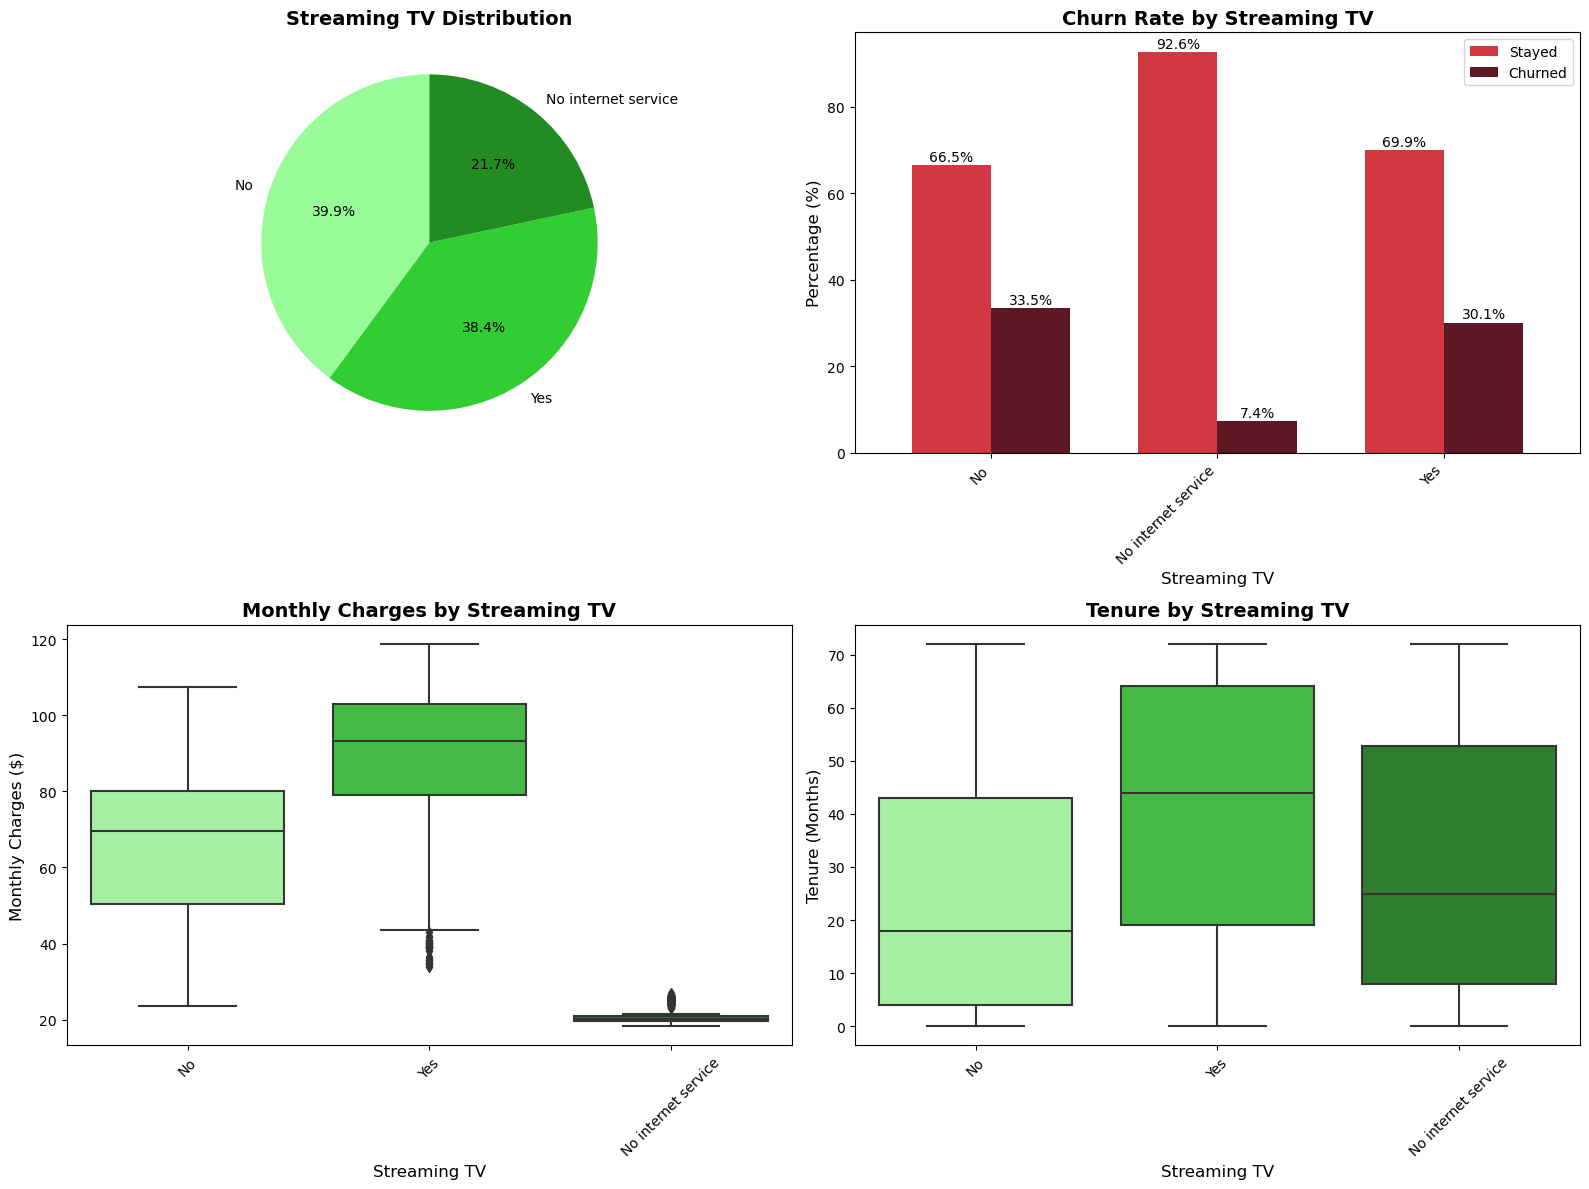


STREAMING TV DETAILED ANALYSIS

Churn Rate by Streaming TV:
                     Total_Customers  Churned_Count  Churn_Rate  \
StreamingTV                                                       
No                              2810            942       0.335   
No internet service             1526            113       0.074   
Yes                             2707            814       0.301   

                     Churn_Rate_Pct  
StreamingTV                          
No                             33.5  
No internet service             7.4  
Yes                            30.1  

Average Monthly Charges by Streaming TV:
                      mean  median    std
StreamingTV                              
No                   65.39   69.60  18.72
No internet service  21.08   20.15   2.16
Yes                  88.74   93.20  18.39

Average Tenure by Streaming TV:
                      mean  median    std
StreamingTV                              
No                   24.99    18.0  22.63
No

In [20]:
# Streaming TV Analysis
print("Streaming TV Distribution:")
print(df_eda['StreamingTV'].value_counts())
print("\nStreaming TV Distribution (%):")
print(df_eda['StreamingTV'].value_counts(normalize=True).round(3) * 100)

# Create comprehensive Streaming TV analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Streaming TV Distribution (top left)
streaming_tv_counts = df_eda['StreamingTV'].value_counts()
axes[0, 0].pie(streaming_tv_counts.values, labels=streaming_tv_counts.index, autopct='%1.1f%%', 
               colors=['#98FB98', '#32CD32', '#228B22'], startangle=90)
axes[0, 0].set_title('Streaming TV Distribution', fontsize=14, fontweight='bold')

# 2. Churn Rate by Streaming TV (top right)
streaming_tv_churn = df_eda.groupby(['StreamingTV', 'Churn']).size().unstack()
streaming_tv_churn_pct = streaming_tv_churn.div(streaming_tv_churn.sum(axis=1), axis=0) * 100

streaming_tv_churn_pct.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.7)
axes[0, 1].set_title('Churn Rate by Streaming TV', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Streaming TV', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].legend(['Stayed', 'Churned'])

# Add percentage labels
for p in axes[0, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 3. Streaming TV vs Monthly Charges (bottom left)
sns.boxplot(data=df_eda, x='StreamingTV', y='MonthlyCharges', ax=axes[1, 0], 
            palette=['#98FB98', '#32CD32', '#228B22'])
axes[1, 0].set_title('Monthly Charges by Streaming TV', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Streaming TV', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Streaming TV vs Tenure (bottom right)
sns.boxplot(data=df_eda, x='StreamingTV', y='tenure', ax=axes[1, 1], 
            palette=['#98FB98', '#32CD32', '#228B22'])
axes[1, 1].set_title('Tenure by Streaming TV', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Streaming TV', fontsize=12)
axes[1, 1].set_ylabel('Tenure (Months)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed statistics for Streaming TV
print("\n" + "="*60)
print("STREAMING TV DETAILED ANALYSIS")
print("="*60)

print("\nChurn Rate by Streaming TV:")
churn_by_streaming_tv = df_eda.groupby('StreamingTV')['Churn'].agg(['count', 'sum', 'mean']).round(3)
churn_by_streaming_tv.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
churn_by_streaming_tv['Churn_Rate_Pct'] = (churn_by_streaming_tv['Churn_Rate'] * 100).round(2)
print(churn_by_streaming_tv)

print("\nAverage Monthly Charges by Streaming TV:")
streaming_tv_charges_stats = df_eda.groupby('StreamingTV')['MonthlyCharges'].agg(['mean', 'median', 'std']).round(2)
print(streaming_tv_charges_stats)

print("\nAverage Tenure by Streaming TV:")
streaming_tv_tenure_stats = df_eda.groupby('StreamingTV')['tenure'].agg(['mean', 'median', 'std']).round(2)
print(streaming_tv_tenure_stats)

## Streaming Movies Analysis

Let's analyze how streaming movies service affects customer churn rates.

Streaming Movies Distribution:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Streaming Movies Distribution (%):
StreamingMovies
No                     39.5
Yes                    38.8
No internet service    21.7
Name: proportion, dtype: float64


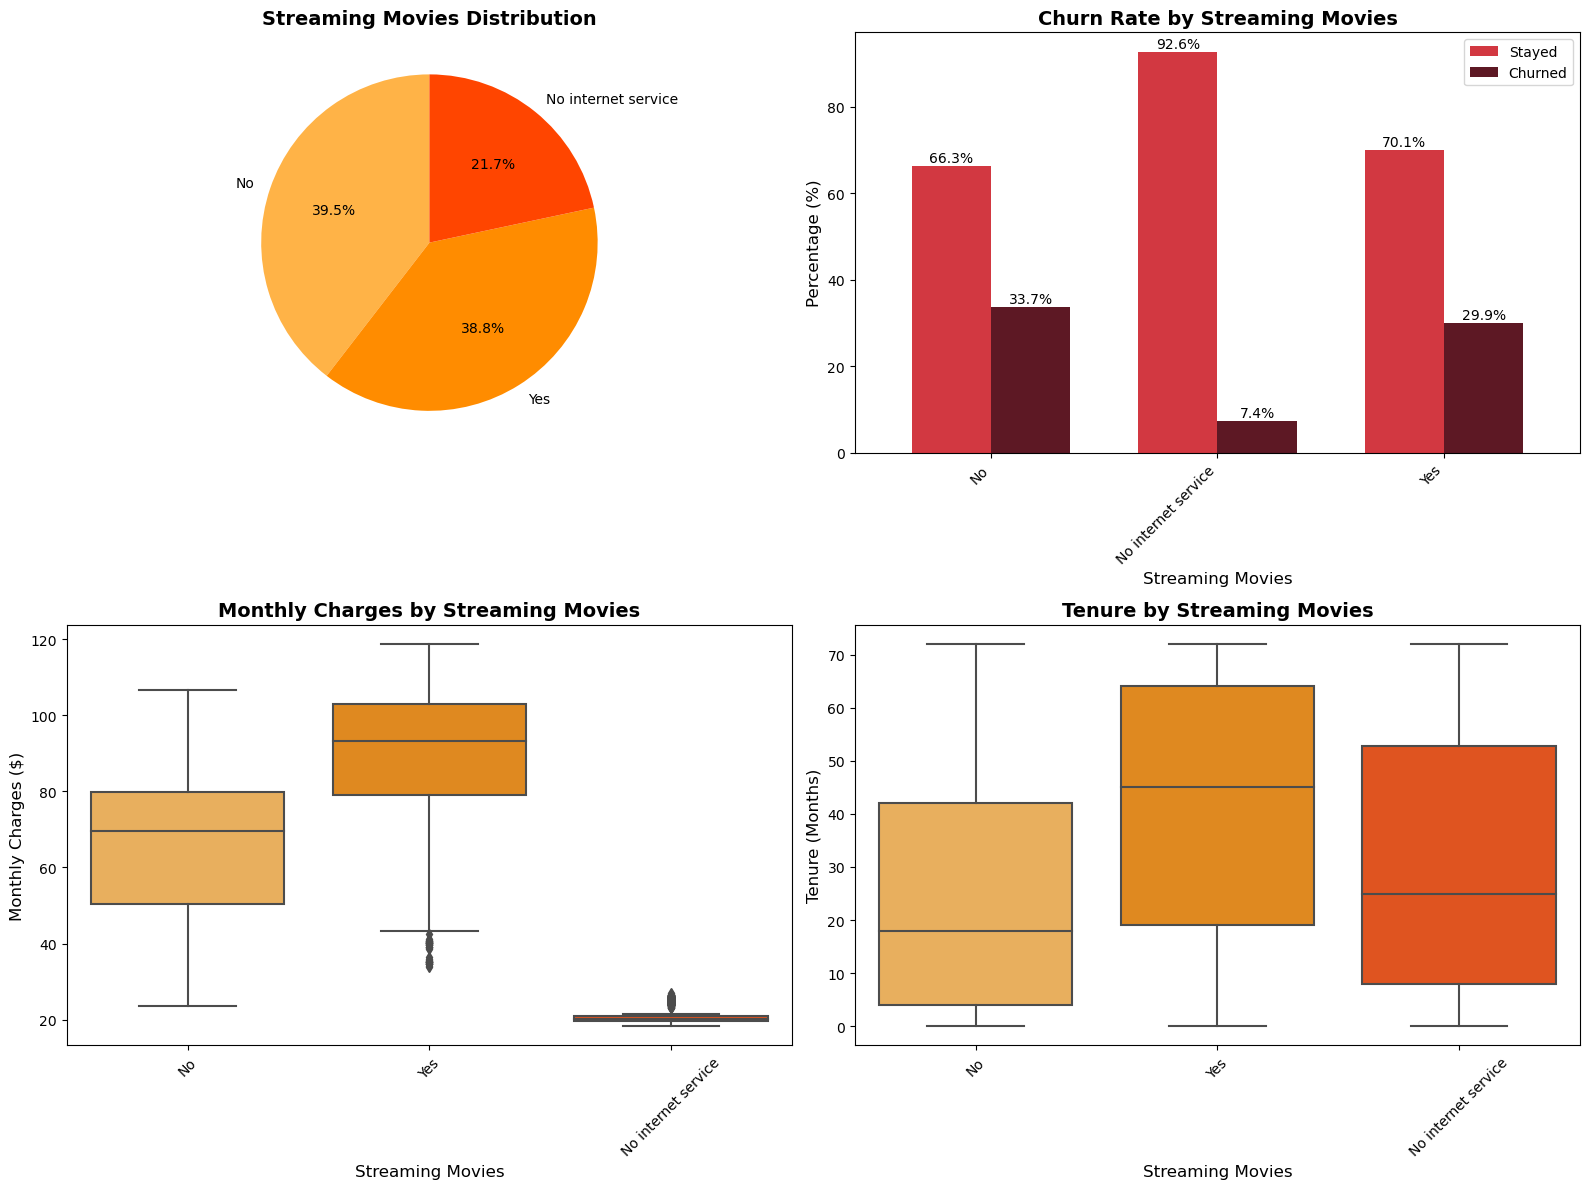


STREAMING MOVIES DETAILED ANALYSIS

Churn Rate by Streaming Movies:
                     Total_Customers  Churned_Count  Churn_Rate  \
StreamingMovies                                                   
No                              2785            938       0.337   
No internet service             1526            113       0.074   
Yes                             2732            818       0.299   

                     Churn_Rate_Pct  
StreamingMovies                      
No                             33.7  
No internet service             7.4  
Yes                            29.9  

Average Monthly Charges by Streaming Movies:
                      mean  median    std
StreamingMovies                          
No                   65.43   69.65  18.71
No internet service  21.08   20.15   2.16
Yes                  88.48   93.20  18.60

Average Tenure by Streaming Movies:
                      mean  median    std
StreamingMovies                          
No                   24.71  

In [21]:
# Streaming Movies Analysis
print("Streaming Movies Distribution:")
print(df_eda['StreamingMovies'].value_counts())
print("\nStreaming Movies Distribution (%):")
print(df_eda['StreamingMovies'].value_counts(normalize=True).round(3) * 100)

# Create comprehensive Streaming Movies analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Streaming Movies Distribution (top left)
streaming_movies_counts = df_eda['StreamingMovies'].value_counts()
axes[0, 0].pie(streaming_movies_counts.values, labels=streaming_movies_counts.index, autopct='%1.1f%%', 
               colors=['#FFB347', '#FF8C00', '#FF4500'], startangle=90)
axes[0, 0].set_title('Streaming Movies Distribution', fontsize=14, fontweight='bold')

# 2. Churn Rate by Streaming Movies (top right)
streaming_movies_churn = df_eda.groupby(['StreamingMovies', 'Churn']).size().unstack()
streaming_movies_churn_pct = streaming_movies_churn.div(streaming_movies_churn.sum(axis=1), axis=0) * 100

streaming_movies_churn_pct.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.7)
axes[0, 1].set_title('Churn Rate by Streaming Movies', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Streaming Movies', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].legend(['Stayed', 'Churned'])

# Add percentage labels
for p in axes[0, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 3. Streaming Movies vs Monthly Charges (bottom left)
sns.boxplot(data=df_eda, x='StreamingMovies', y='MonthlyCharges', ax=axes[1, 0], 
            palette=['#FFB347', '#FF8C00', '#FF4500'])
axes[1, 0].set_title('Monthly Charges by Streaming Movies', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Streaming Movies', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Streaming Movies vs Tenure (bottom right)
sns.boxplot(data=df_eda, x='StreamingMovies', y='tenure', ax=axes[1, 1], 
            palette=['#FFB347', '#FF8C00', '#FF4500'])
axes[1, 1].set_title('Tenure by Streaming Movies', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Streaming Movies', fontsize=12)
axes[1, 1].set_ylabel('Tenure (Months)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed statistics for Streaming Movies
print("\n" + "="*60)
print("STREAMING MOVIES DETAILED ANALYSIS")
print("="*60)

print("\nChurn Rate by Streaming Movies:")
churn_by_streaming_movies = df_eda.groupby('StreamingMovies')['Churn'].agg(['count', 'sum', 'mean']).round(3)
churn_by_streaming_movies.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
churn_by_streaming_movies['Churn_Rate_Pct'] = (churn_by_streaming_movies['Churn_Rate'] * 100).round(2)
print(churn_by_streaming_movies)

print("\nAverage Monthly Charges by Streaming Movies:")
streaming_movies_charges_stats = df_eda.groupby('StreamingMovies')['MonthlyCharges'].agg(['mean', 'median', 'std']).round(2)
print(streaming_movies_charges_stats)

print("\nAverage Tenure by Streaming Movies:")
streaming_movies_tenure_stats = df_eda.groupby('StreamingMovies')['tenure'].agg(['mean', 'median', 'std']).round(2)
print(streaming_movies_tenure_stats)

## Combined Streaming Services Analysis

Cross-analysis of both streaming TV and movies services together.

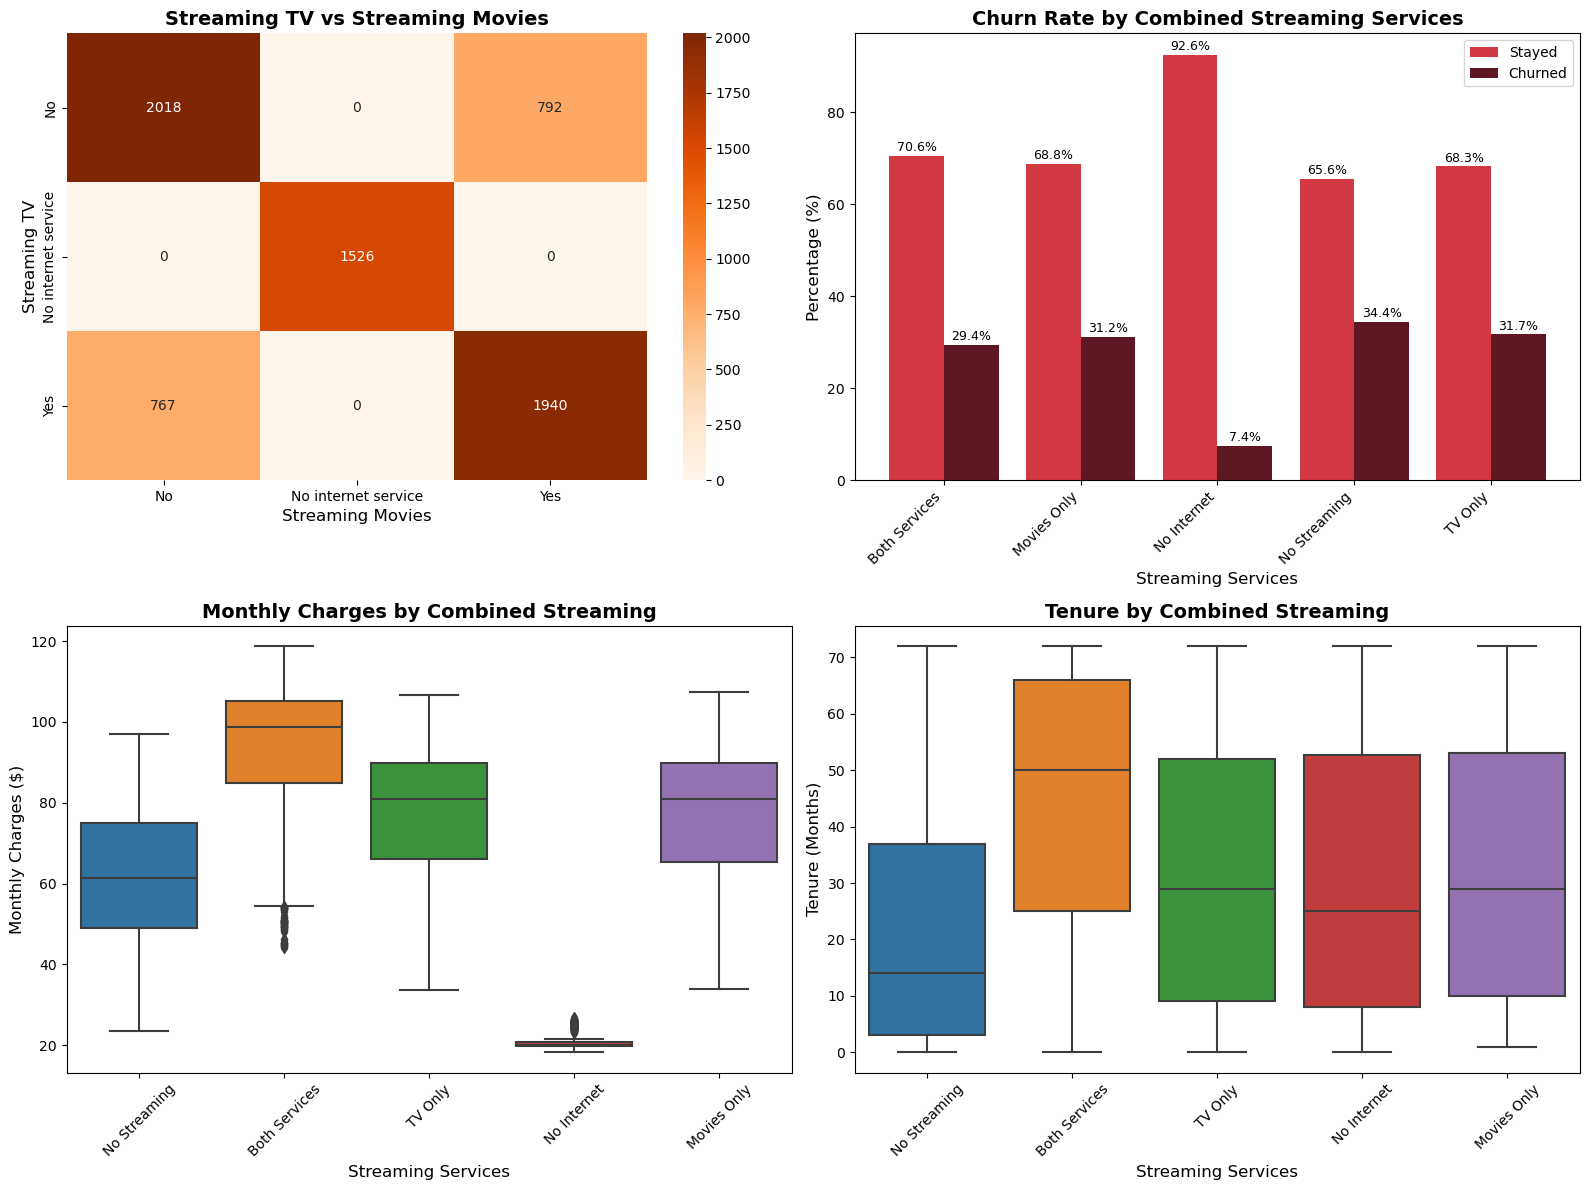


COMBINED STREAMING SERVICES DETAILED ANALYSIS

Cross-tabulation: Streaming TV vs Streaming Movies:
StreamingMovies        No  No internet service   Yes   All
StreamingTV                                               
No                   2018                    0   792  2810
No internet service     0                 1526     0  1526
Yes                   767                    0  1940  2707
All                  2785                 1526  2732  7043

Churn Rate by Combined Streaming Services:
                    Total_Customers  Churned_Count  Churn_Rate  Churn_Rate_Pct
Streaming_Combined                                                            
Both Services                  1940            571       0.294            29.4
Movies Only                     792            247       0.312            31.2
No Internet                    1526            113       0.074             7.4
No Streaming                   2018            695       0.344            34.4
TV Only                     

In [22]:
# Combined Streaming Services Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 1. Cross-tabulation: Streaming TV vs Streaming Movies (top left)
streaming_cross_tab = pd.crosstab(df_eda['StreamingTV'], df_eda['StreamingMovies'], margins=True)
sns.heatmap(streaming_cross_tab.iloc[:-1, :-1], annot=True, fmt='d', cmap='Oranges', ax=axes[0, 0])
axes[0, 0].set_title('Streaming TV vs Streaming Movies', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Streaming Movies', fontsize=12)
axes[0, 0].set_ylabel('Streaming TV', fontsize=12)

# 2. Combined streaming services impact on churn (top right)
# Create combined streaming category
df_eda['Streaming_Combined'] = df_eda.apply(lambda row: 
    'Both Services' if (row['StreamingTV'] == 'Yes' and row['StreamingMovies'] == 'Yes')
    else 'TV Only' if (row['StreamingTV'] == 'Yes' and row['StreamingMovies'] != 'Yes')
    else 'Movies Only' if (row['StreamingMovies'] == 'Yes' and row['StreamingTV'] != 'Yes')
    else 'No Streaming' if (row['StreamingTV'] == 'No' and row['StreamingMovies'] == 'No')
    else 'No Internet', axis=1)

combined_churn = df_eda.groupby(['Streaming_Combined', 'Churn']).size().unstack()
combined_churn_pct = combined_churn.div(combined_churn.sum(axis=1), axis=0) * 100

combined_churn_pct.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.8)
axes[0, 1].set_title('Churn Rate by Combined Streaming Services', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Streaming Services', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].legend(['Stayed', 'Churned'])

# Add percentage labels
for p in axes[0, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=9)

# 3. Monthly charges by combined streaming (bottom left)
sns.boxplot(data=df_eda, x='Streaming_Combined', y='MonthlyCharges', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Charges by Combined Streaming', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Streaming Services', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Tenure by combined streaming (bottom right)
sns.boxplot(data=df_eda, x='Streaming_Combined', y='tenure', ax=axes[1, 1])
axes[1, 1].set_title('Tenure by Combined Streaming', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Streaming Services', fontsize=12)
axes[1, 1].set_ylabel('Tenure (Months)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed cross-analysis
print("\n" + "="*70)
print("COMBINED STREAMING SERVICES DETAILED ANALYSIS")
print("="*70)

print("\nCross-tabulation: Streaming TV vs Streaming Movies:")
print(streaming_cross_tab)

print("\nChurn Rate by Combined Streaming Services:")
combined_streaming_churn = df_eda.groupby('Streaming_Combined')['Churn'].agg(['count', 'sum', 'mean']).round(3)
combined_streaming_churn.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
combined_streaming_churn['Churn_Rate_Pct'] = (combined_streaming_churn['Churn_Rate'] * 100).round(2)
print(combined_streaming_churn)

# Statistical tests for streaming services
from scipy.stats import chi2_contingency

# Chi-square test for Streaming TV vs Churn
streaming_tv_contingency = pd.crosstab(df_eda['StreamingTV'], df_eda['Churn'])
chi2_tv, p_value_tv, dof_tv, expected_tv = chi2_contingency(streaming_tv_contingency)

# Chi-square test for Streaming Movies vs Churn
streaming_movies_contingency = pd.crosstab(df_eda['StreamingMovies'], df_eda['Churn'])
chi2_movies, p_value_movies, dof_movies, expected_movies = chi2_contingency(streaming_movies_contingency)

# Chi-square test for Combined Streaming vs Churn
combined_streaming_contingency = pd.crosstab(df_eda['Streaming_Combined'], df_eda['Churn'])
chi2_combined, p_value_combined, dof_combined, expected_combined = chi2_contingency(combined_streaming_contingency)

print("\n" + "="*60)
print("STATISTICAL TESTS FOR STREAMING SERVICES")
print("="*60)

print(f"\nStreaming TV vs Churn:")
print(f"Chi-square statistic: {chi2_tv:.4f}")
print(f"P-value: {p_value_tv:.4f}")
print(f"Degrees of freedom: {dof_tv}")
print(f"Significant association: {'Yes' if p_value_tv < 0.05 else 'No'}")

print(f"\nStreaming Movies vs Churn:")
print(f"Chi-square statistic: {chi2_movies:.4f}")
print(f"P-value: {p_value_movies:.4f}")
print(f"Degrees of freedom: {dof_movies}")
print(f"Significant association: {'Yes' if p_value_movies < 0.05 else 'No'}")

print(f"\nCombined Streaming Services vs Churn:")
print(f"Chi-square statistic: {chi2_combined:.4f}")
print(f"P-value: {p_value_combined:.4f}")
print(f"Degrees of freedom: {dof_combined}")
print(f"Significant association: {'Yes' if p_value_combined < 0.05 else 'No'}")

## Streaming Services - Key Insights and Correlations

Summary of findings from the streaming services analysis:

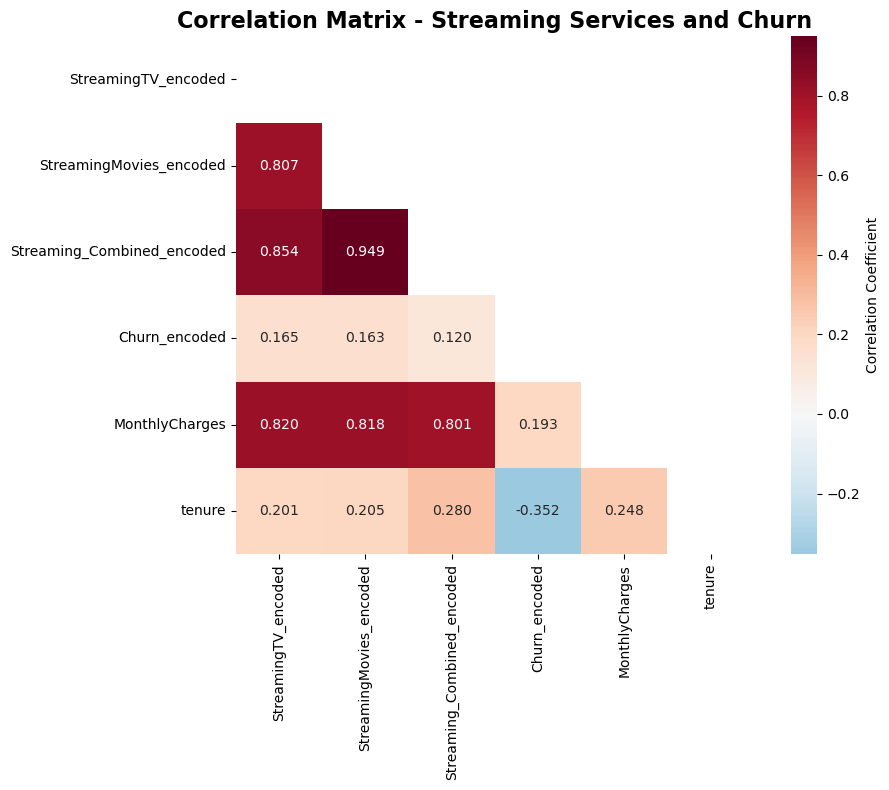

STREAMING SERVICES - KEY INSIGHTS

📊 CORRELATION ANALYSIS:
Streaming TV - Churn Correlation: 0.1647
Streaming Movies - Churn Correlation: 0.1632
Combined Streaming - Churn Correlation: 0.1200

🔍 KEY FINDINGS:

1. STREAMING TV IMPACT:
   • Customers with Streaming TV: 30.1% churn rate
   • Customers without Streaming TV: 33.5% churn rate
   • No Internet Service: 7.4% churn rate

2. STREAMING MOVIES IMPACT:
   • Customers with Streaming Movies: 29.9% churn rate
   • Customers without Streaming Movies: 33.7% churn rate
   • No Internet Service: 7.4% churn rate

3. COMBINED STREAMING IMPACT:
   • Both Services: 29.4% churn rate
   • TV Only: 31.7% churn rate
   • Movies Only: 31.2% churn rate
   • No Streaming: 34.4% churn rate
   • No Internet: 7.4% churn rate

4. PRICING ANALYSIS:
   • Average Monthly Charges (Streaming TV): $88.74
   • Average Monthly Charges (Streaming Movies): $88.48
   • Average Monthly Charges (Both Services): $93.24
   • Average Monthly Charges (No Streaming): $60

In [23]:
# Calculate correlations with churn for streaming-related features
streaming_features = ['StreamingTV', 'StreamingMovies']

# Create numerical encodings for correlation analysis
df_streaming_corr = df_eda.copy()

# Encode categorical variables for correlation
df_streaming_corr['StreamingTV_encoded'] = df_streaming_corr['StreamingTV'].map({
    'No internet service': 0, 'No': 1, 'Yes': 2
})
df_streaming_corr['StreamingMovies_encoded'] = df_streaming_corr['StreamingMovies'].map({
    'No internet service': 0, 'No': 1, 'Yes': 2
})
df_streaming_corr['Streaming_Combined_encoded'] = df_streaming_corr['Streaming_Combined'].map({
    'No Internet': 0, 'No Streaming': 1, 'TV Only': 2, 'Movies Only': 3, 'Both Services': 4
})
df_streaming_corr['Churn_encoded'] = df_streaming_corr['Churn'].astype(int)

# Calculate correlations
streaming_correlation_matrix = df_streaming_corr[['StreamingTV_encoded', 'StreamingMovies_encoded', 
                                                 'Streaming_Combined_encoded', 'Churn_encoded', 
                                                 'MonthlyCharges', 'tenure']].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(streaming_correlation_matrix, dtype=bool))
sns.heatmap(streaming_correlation_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='RdBu_r', 
            center=0,
            mask=mask,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix - Streaming Services and Churn', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print correlation insights
print("="*70)
print("STREAMING SERVICES - KEY INSIGHTS")
print("="*70)

print("\n📊 CORRELATION ANALYSIS:")
print(f"Streaming TV - Churn Correlation: {streaming_correlation_matrix.loc['StreamingTV_encoded', 'Churn_encoded']:.4f}")
print(f"Streaming Movies - Churn Correlation: {streaming_correlation_matrix.loc['StreamingMovies_encoded', 'Churn_encoded']:.4f}")
print(f"Combined Streaming - Churn Correlation: {streaming_correlation_matrix.loc['Streaming_Combined_encoded', 'Churn_encoded']:.4f}")

print("\n🔍 KEY FINDINGS:")

# Streaming TV insights
streaming_tv_yes_churn = df_eda[df_eda['StreamingTV'] == 'Yes']['Churn'].mean() * 100
streaming_tv_no_churn = df_eda[df_eda['StreamingTV'] == 'No']['Churn'].mean() * 100
streaming_tv_no_internet_churn = df_eda[df_eda['StreamingTV'] == 'No internet service']['Churn'].mean() * 100

print(f"\n1. STREAMING TV IMPACT:")
print(f"   • Customers with Streaming TV: {streaming_tv_yes_churn:.1f}% churn rate")
print(f"   • Customers without Streaming TV: {streaming_tv_no_churn:.1f}% churn rate")
print(f"   • No Internet Service: {streaming_tv_no_internet_churn:.1f}% churn rate")

# Streaming Movies insights
streaming_movies_yes_churn = df_eda[df_eda['StreamingMovies'] == 'Yes']['Churn'].mean() * 100
streaming_movies_no_churn = df_eda[df_eda['StreamingMovies'] == 'No']['Churn'].mean() * 100
streaming_movies_no_internet_churn = df_eda[df_eda['StreamingMovies'] == 'No internet service']['Churn'].mean() * 100

print(f"\n2. STREAMING MOVIES IMPACT:")
print(f"   • Customers with Streaming Movies: {streaming_movies_yes_churn:.1f}% churn rate")
print(f"   • Customers without Streaming Movies: {streaming_movies_no_churn:.1f}% churn rate")
print(f"   • No Internet Service: {streaming_movies_no_internet_churn:.1f}% churn rate")

# Combined streaming insights
both_services_churn = df_eda[df_eda['Streaming_Combined'] == 'Both Services']['Churn'].mean() * 100
tv_only_churn = df_eda[df_eda['Streaming_Combined'] == 'TV Only']['Churn'].mean() * 100
movies_only_churn = df_eda[df_eda['Streaming_Combined'] == 'Movies Only']['Churn'].mean() * 100
no_streaming_churn = df_eda[df_eda['Streaming_Combined'] == 'No Streaming']['Churn'].mean() * 100
no_internet_churn = df_eda[df_eda['Streaming_Combined'] == 'No Internet']['Churn'].mean() * 100

print(f"\n3. COMBINED STREAMING IMPACT:")
print(f"   • Both Services: {both_services_churn:.1f}% churn rate")
print(f"   • TV Only: {tv_only_churn:.1f}% churn rate")
print(f"   • Movies Only: {movies_only_churn:.1f}% churn rate")
print(f"   • No Streaming: {no_streaming_churn:.1f}% churn rate")
print(f"   • No Internet: {no_internet_churn:.1f}% churn rate")

# Monthly charges analysis
streaming_tv_yes_charges = df_eda[df_eda['StreamingTV'] == 'Yes']['MonthlyCharges'].mean()
streaming_movies_yes_charges = df_eda[df_eda['StreamingMovies'] == 'Yes']['MonthlyCharges'].mean()
both_services_charges = df_eda[df_eda['Streaming_Combined'] == 'Both Services']['MonthlyCharges'].mean()
no_streaming_charges = df_eda[df_eda['Streaming_Combined'] == 'No Streaming']['MonthlyCharges'].mean()

print(f"\n4. PRICING ANALYSIS:")
print(f"   • Average Monthly Charges (Streaming TV): ${streaming_tv_yes_charges:.2f}")
print(f"   • Average Monthly Charges (Streaming Movies): ${streaming_movies_yes_charges:.2f}")
print(f"   • Average Monthly Charges (Both Services): ${both_services_charges:.2f}")
print(f"   • Average Monthly Charges (No Streaming): ${no_streaming_charges:.2f}")
print(f"   • Price Difference (Both vs None): ${abs(both_services_charges - no_streaming_charges):.2f}")

# Tenure analysis
streaming_tv_yes_tenure = df_eda[df_eda['StreamingTV'] == 'Yes']['tenure'].mean()
streaming_movies_yes_tenure = df_eda[df_eda['StreamingMovies'] == 'Yes']['tenure'].mean()
both_services_tenure = df_eda[df_eda['Streaming_Combined'] == 'Both Services']['tenure'].mean()
no_streaming_tenure = df_eda[df_eda['Streaming_Combined'] == 'No Streaming']['tenure'].mean()

print(f"\n5. CUSTOMER LOYALTY (TENURE):")
print(f"   • Average Tenure (Streaming TV): {streaming_tv_yes_tenure:.1f} months")
print(f"   • Average Tenure (Streaming Movies): {streaming_movies_yes_tenure:.1f} months")
print(f"   • Average Tenure (Both Services): {both_services_tenure:.1f} months")
print(f"   • Average Tenure (No Streaming): {no_streaming_tenure:.1f} months")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
print("   1. Streaming services show minimal impact on churn reduction")
print("   2. Customers with both services have higher monthly charges but similar churn")
print("   3. Focus on improving streaming content quality and user experience")
print("   4. Consider bundling streaming services with other retention strategies")
print("   5. No internet customers have highest churn - prioritize internet service")

# Create a summary table for streaming services
streaming_summary_data = {
    'Service Type': ['Streaming TV - Yes', 'Streaming TV - No', 'Streaming Movies - Yes', 
                    'Streaming Movies - No', 'Both Services', 'No Streaming', 'No Internet'],
    'Customer Count': [
        len(df_eda[df_eda['StreamingTV'] == 'Yes']),
        len(df_eda[df_eda['StreamingTV'] == 'No']),
        len(df_eda[df_eda['StreamingMovies'] == 'Yes']),
        len(df_eda[df_eda['StreamingMovies'] == 'No']),
        len(df_eda[df_eda['Streaming_Combined'] == 'Both Services']),
        len(df_eda[df_eda['Streaming_Combined'] == 'No Streaming']),
        len(df_eda[df_eda['Streaming_Combined'] == 'No Internet'])
    ],
    'Churn Rate (%)': [
        streaming_tv_yes_churn, streaming_tv_no_churn, streaming_movies_yes_churn, 
        streaming_movies_no_churn, both_services_churn, no_streaming_churn, no_internet_churn
    ],
    'Avg Monthly Charges': [
        df_eda[df_eda['StreamingTV'] == 'Yes']['MonthlyCharges'].mean(),
        df_eda[df_eda['StreamingTV'] == 'No']['MonthlyCharges'].mean(),
        df_eda[df_eda['StreamingMovies'] == 'Yes']['MonthlyCharges'].mean(),
        df_eda[df_eda['StreamingMovies'] == 'No']['MonthlyCharges'].mean(),
        both_services_charges,
        no_streaming_charges,
        df_eda[df_eda['Streaming_Combined'] == 'No Internet']['MonthlyCharges'].mean()
    ]
}

streaming_summary_df = pd.DataFrame(streaming_summary_data)
streaming_summary_df['Churn Rate (%)'] = streaming_summary_df['Churn Rate (%)'].round(2)
streaming_summary_df['Avg Monthly Charges'] = streaming_summary_df['Avg Monthly Charges'].round(2)

print(f"\n📋 STREAMING SERVICES SUMMARY TABLE:")
print(streaming_summary_df.to_string(index=False))

# Security & Support Services Correlation with Churn

Analysis of how security and support services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) correlate with customer churn.

Security & Support Services Distribution:

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
Percentage: OnlineSecurity
No                     49.7
Yes                    28.7
No internet service    21.7
Name: proportion, dtype: float64

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
Percentage: OnlineBackup
No                     43.8
Yes                    34.5
No internet service    21.7
Name: proportion, dtype: float64

DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
Percentage: DeviceProtection
No                     43.9
Yes                    34.4
No internet service    21.7
Name: proportion, dtype: float64

TechSupport:
TechSupport
No                     3473
Yes                    2044
No internet servic

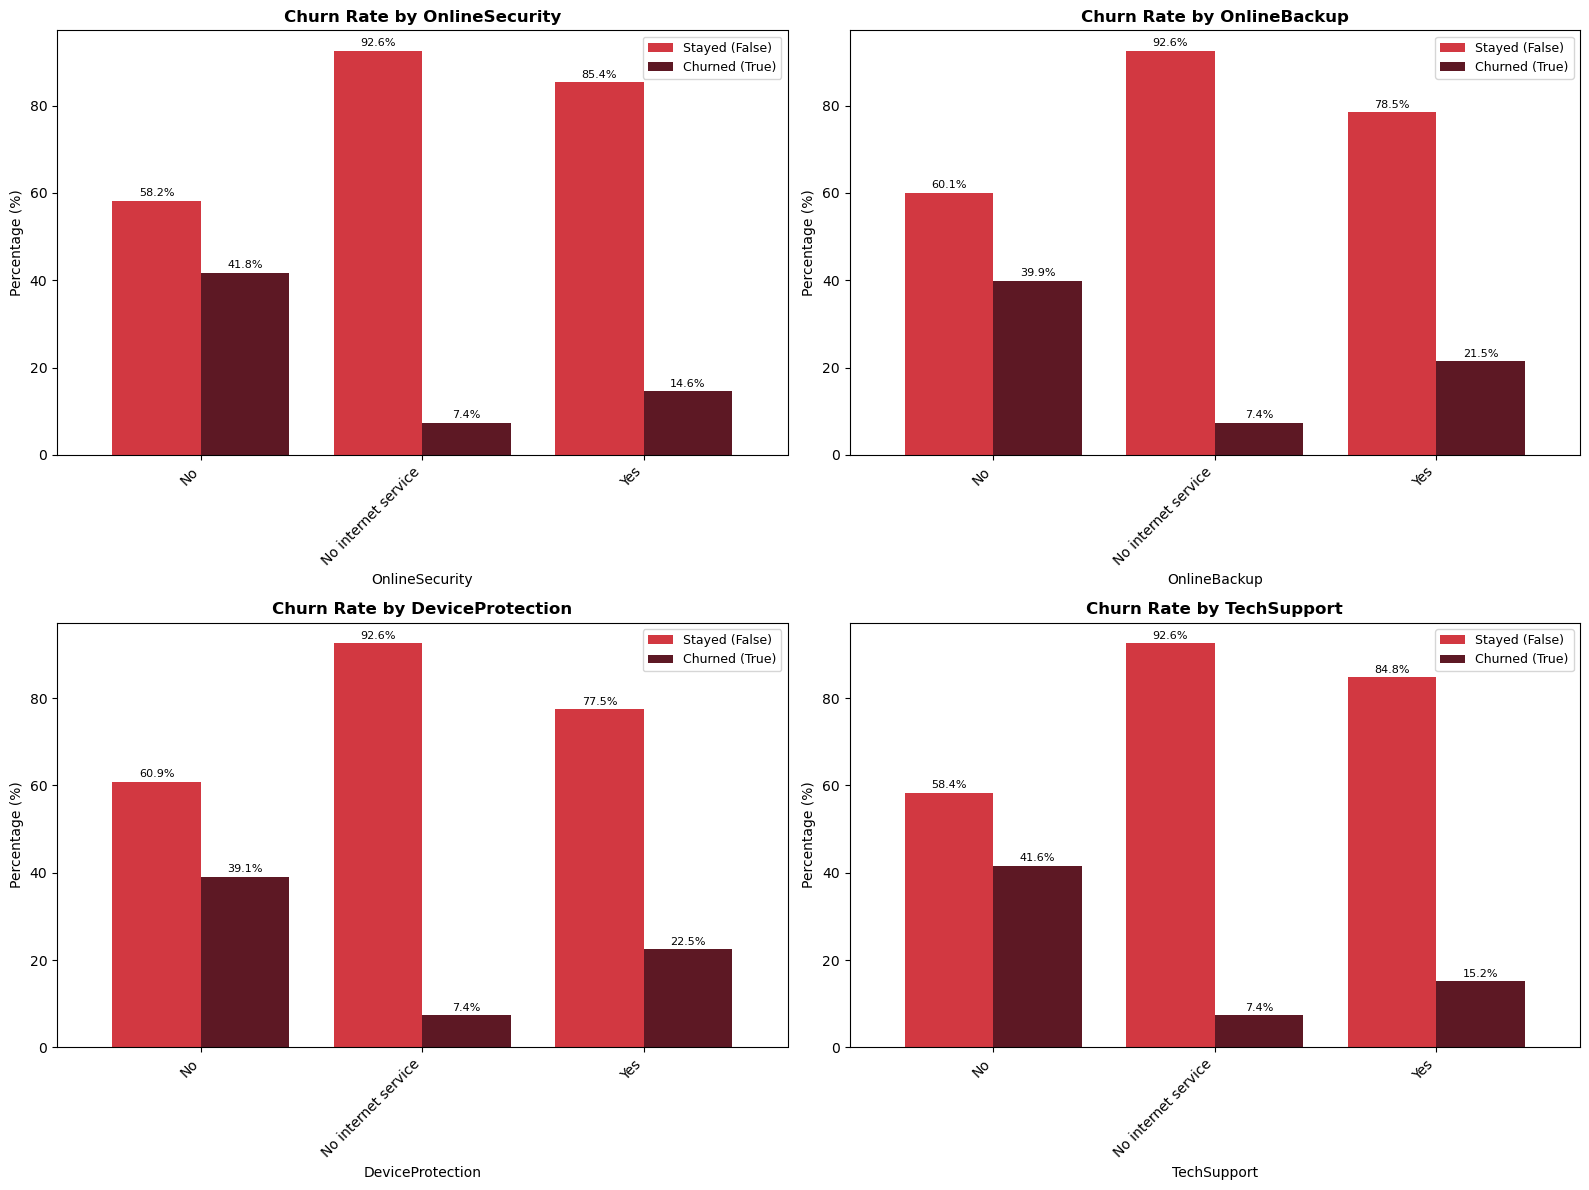


SECURITY & SUPPORT SERVICES - CHURN ANALYSIS

📊 ONLINESECURITY CHURN ANALYSIS:
                     Total_Customers  Churned_Count  Churn_Rate  \
OnlineSecurity                                                    
No                              3498           1461       0.418   
No internet service             1526            113       0.074   
Yes                             2019            295       0.146   

                     Churn_Rate_Pct  
OnlineSecurity                       
No                             41.8  
No internet service             7.4  
Yes                            14.6  

📊 ONLINEBACKUP CHURN ANALYSIS:
                     Total_Customers  Churned_Count  Churn_Rate  \
OnlineBackup                                                      
No                              3088           1233       0.399   
No internet service             1526            113       0.074   
Yes                             2429            523       0.215   

                     Churn

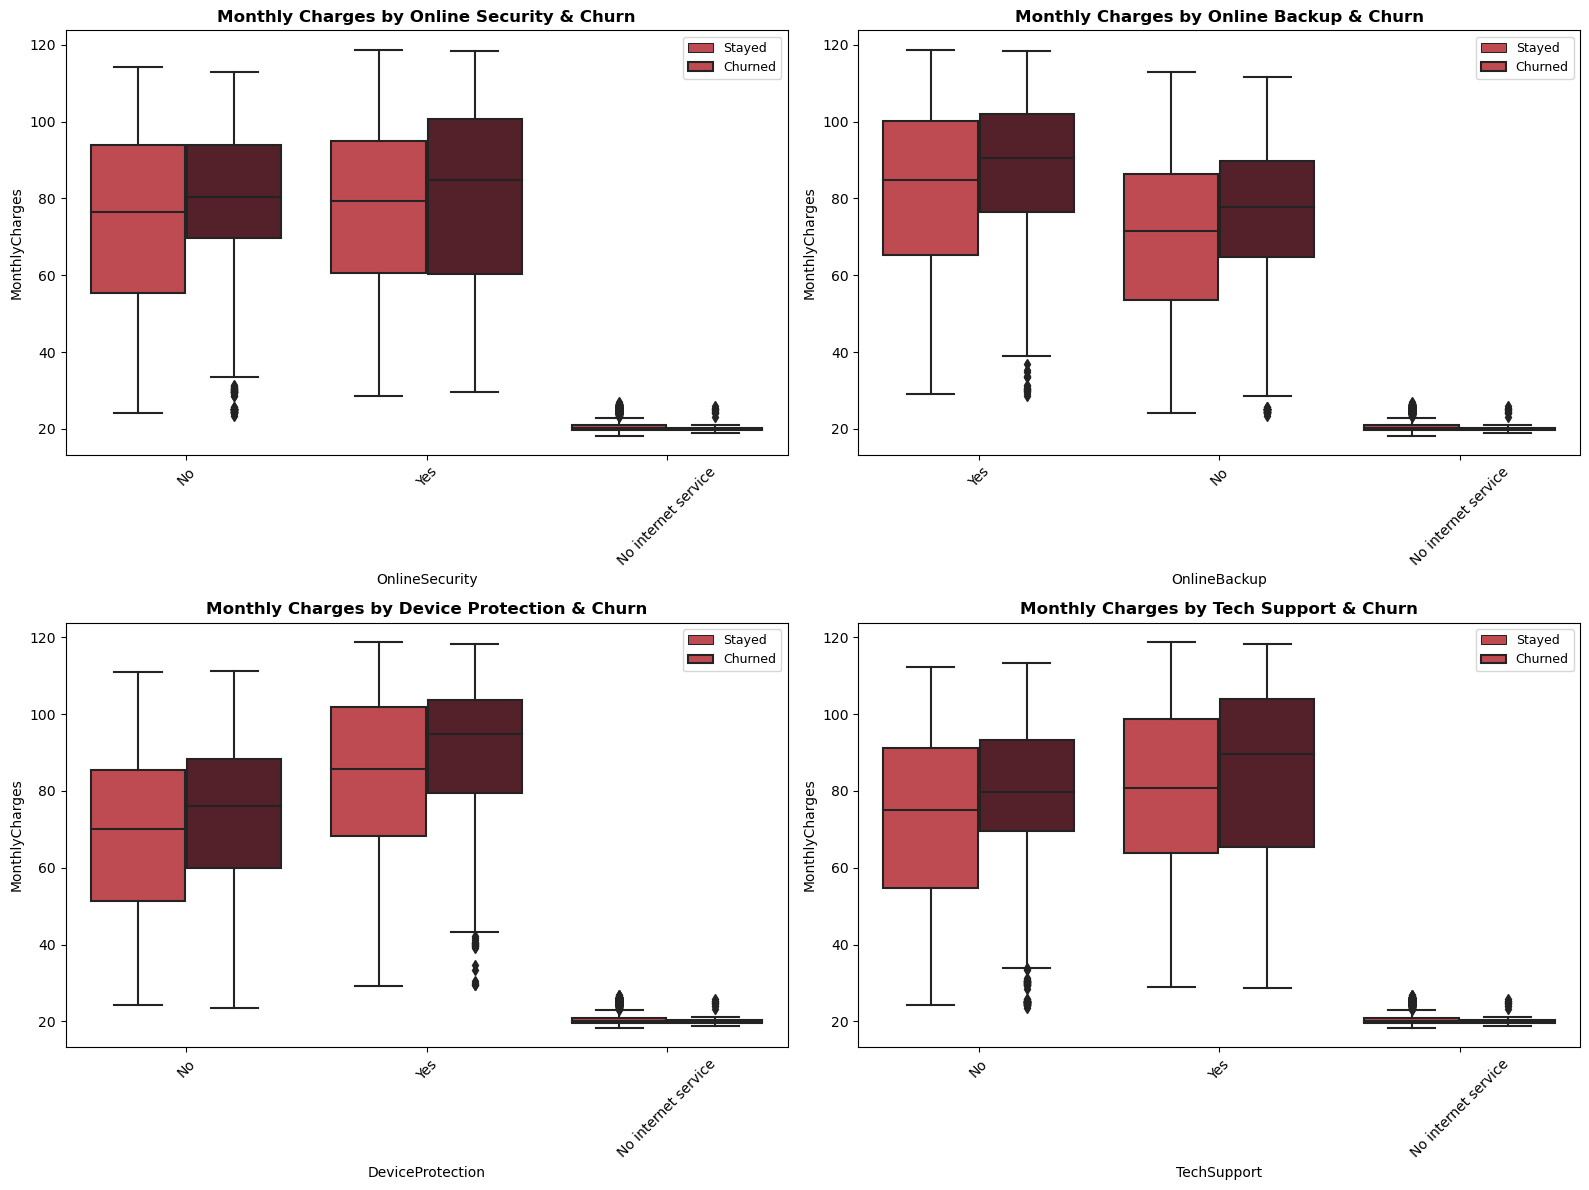


📊 STATISTICAL SIGNIFICANCE TESTS:

OnlineSecurity:
Chi-square statistic: 849.9990
P-value: 2.6611e-185
Significant association: Yes

OnlineBackup:
Chi-square statistic: 601.8128
P-value: 2.0798e-131
Significant association: Yes

DeviceProtection:
Chi-square statistic: 558.4194
P-value: 5.5052e-122
Significant association: Yes

TechSupport:
Chi-square statistic: 828.1971
P-value: 1.4431e-180
Significant association: Yes

🔗 CORRELATION ANALYSIS WITH CHURN:
OnlineSecurity - Churn Correlation: 0.0233
OnlineBackup - Churn Correlation: 0.0742
DeviceProtection - Churn Correlation: 0.0847
TechSupport - Churn Correlation: 0.0270


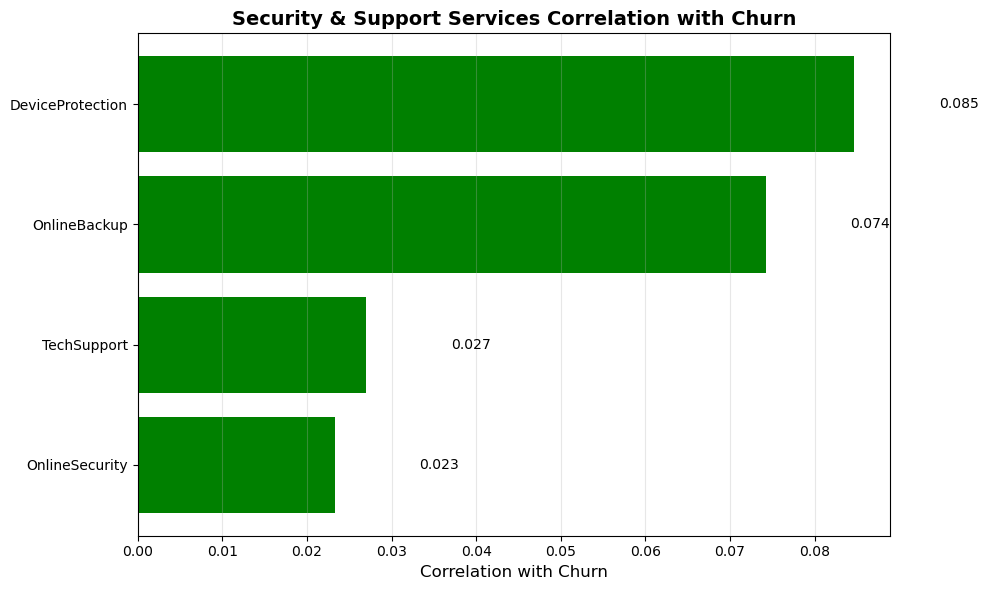


💡 KEY INSIGHTS:

OnlineSecurity:
   • With OnlineSecurity: 14.6% churn rate
   • Without OnlineSecurity: 41.8% churn rate
   • No Internet Service: 7.4% churn rate
   • Difference: 27.2 percentage points

OnlineBackup:
   • With OnlineBackup: 21.5% churn rate
   • Without OnlineBackup: 39.9% churn rate
   • No Internet Service: 7.4% churn rate
   • Difference: 18.4 percentage points

DeviceProtection:
   • With DeviceProtection: 22.5% churn rate
   • Without DeviceProtection: 39.1% churn rate
   • No Internet Service: 7.4% churn rate
   • Difference: 16.6 percentage points

TechSupport:
   • With TechSupport: 15.2% churn rate
   • Without TechSupport: 41.6% churn rate
   • No Internet Service: 7.4% churn rate
   • Difference: 26.5 percentage points

🎯 BUSINESS RECOMMENDATIONS:
   1. Promote security and support services as retention tools
   2. Bundle these services with high-risk customer segments
   3. Use lack of these services as churn risk indicators
   4. Target customers withou

In [28]:
# Security & Support Services Correlation Analysis
security_support_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

print("Security & Support Services Distribution:")
for service in security_support_services:
    print(f"\n{service}:")
    print(df_eda[service].value_counts())
    print(f"Percentage: {df_eda[service].value_counts(normalize=True).round(3) * 100}")

# Create comprehensive analysis with 2x2 subplots for each service
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned
service_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Flatten axes for easier iteration
axes_flat = axes.flatten()

for i, service in enumerate(security_support_services):
    # Calculate churn rate by service
    service_churn = df_eda.groupby([service, 'Churn']).size().unstack()
    service_churn_pct = service_churn.div(service_churn.sum(axis=1), axis=0) * 100
    
    service_churn_pct.plot(kind='bar', ax=axes_flat[i], color=colors, width=0.8)
    axes_flat[i].set_title(f'Churn Rate by {service}', fontsize=12, fontweight='bold')
    axes_flat[i].set_xlabel(service, fontsize=10)
    axes_flat[i].set_ylabel('Percentage (%)', fontsize=10)
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45, ha='right')
    axes_flat[i].legend(['Stayed (False)', 'Churned (True)'], fontsize=9)
    
    # Add percentage labels
    for p in axes_flat[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axes_flat[i].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                    ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Detailed Statistical Analysis
print("\n" + "="*70)
print("SECURITY & SUPPORT SERVICES - CHURN ANALYSIS")
print("="*70)

# Calculate churn rates for each service
service_churn_rates = {}
for service in security_support_services:
    print(f"\n📊 {service.upper()} CHURN ANALYSIS:")
    service_stats = df_eda.groupby(service)['Churn'].agg(['count', 'sum', 'mean']).round(3)
    service_stats.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
    service_stats['Churn_Rate_Pct'] = (service_stats['Churn_Rate'] * 100).round(2)
    print(service_stats)
    service_churn_rates[service] = service_stats

# Create a combined visualization showing all services impact
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Monthly Charges by OnlineSecurity (top left)
sns.boxplot(data=df_eda, x='OnlineSecurity', y='MonthlyCharges', hue='Churn', ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Monthly Charges by Online Security & Churn', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(['Stayed', 'Churned'], fontsize=9)

# 2. Monthly Charges by OnlineBackup (top right)
sns.boxplot(data=df_eda, x='OnlineBackup', y='MonthlyCharges', hue='Churn', ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Monthly Charges by Online Backup & Churn', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(['Stayed', 'Churned'], fontsize=9)

# 3. Monthly Charges by DeviceProtection (bottom left)
sns.boxplot(data=df_eda, x='DeviceProtection', y='MonthlyCharges', hue='Churn', ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Monthly Charges by Device Protection & Churn', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(['Stayed', 'Churned'], fontsize=9)

# 4. Monthly Charges by TechSupport (bottom right)
sns.boxplot(data=df_eda, x='TechSupport', y='MonthlyCharges', hue='Churn', ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Monthly Charges by Tech Support & Churn', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(['Stayed', 'Churned'], fontsize=9)

plt.tight_layout()
plt.show()

# Statistical significance tests
from scipy.stats import chi2_contingency

print(f"\n📊 STATISTICAL SIGNIFICANCE TESTS:")
for service in security_support_services:
    contingency_table = pd.crosstab(df_eda[service], df_eda['Churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n{service}:")
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4e}")
    print(f"Significant association: {'Yes' if p_value < 0.05 else 'No'}")

# Calculate correlations
print(f"\n🔗 CORRELATION ANALYSIS WITH CHURN:")
correlation_results = {}

for service in security_support_services:
    # Encode service variables for correlation
    service_encoded = df_eda[service].map({'No internet service': 0, 'No': 1, 'Yes': 2})
    churn_encoded = df_eda['Churn'].astype(int)
    correlation = service_encoded.corr(churn_encoded)
    correlation_results[service] = correlation
    print(f"{service} - Churn Correlation: {correlation:.4f}")

# Create correlation heatmap
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Service', 'Correlation'])
correlation_df = correlation_df.sort_values('Correlation')

plt.figure(figsize=(10, 6))
bars = plt.barh(correlation_df['Service'], correlation_df['Correlation'], 
                color=['red' if x < 0 else 'green' for x in correlation_df['Correlation']])
plt.xlabel('Correlation with Churn', fontsize=12)
plt.title('Security & Support Services Correlation with Churn', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left' if width >= 0 else 'right', va='center')

plt.tight_layout()
plt.show()

# Key insights and recommendations
print(f"\n💡 KEY INSIGHTS:")

# Get specific churn rates for each service
for service in security_support_services:
    yes_churn = df_eda[df_eda[service] == 'Yes']['Churn'].mean() * 100
    no_churn = df_eda[df_eda[service] == 'No']['Churn'].mean() * 100
    no_internet_churn = df_eda[df_eda[service] == 'No internet service']['Churn'].mean() * 100
    
    print(f"\n{service}:")
    print(f"   • With {service}: {yes_churn:.1f}% churn rate")
    print(f"   • Without {service}: {no_churn:.1f}% churn rate")
    print(f"   • No Internet Service: {no_internet_churn:.1f}% churn rate")
    print(f"   • Difference: {abs(yes_churn - no_churn):.1f} percentage points")

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print("   1. Promote security and support services as retention tools")
print("   2. Bundle these services with high-risk customer segments")
print("   3. Use lack of these services as churn risk indicators")
print("   4. Target customers without internet service for retention")
print("   5. Create educational campaigns about service benefits")

# Create summary table for all services
summary_data = {
    'Service': [],
    'With Service (% Churn)': [],
    'Without Service (% Churn)': [],
    'No Internet (% Churn)': [],
    'Correlation': []
}

for service in security_support_services:
    yes_churn = df_eda[df_eda[service] == 'Yes']['Churn'].mean() * 100
    no_churn = df_eda[df_eda[service] == 'No']['Churn'].mean() * 100
    no_internet_churn = df_eda[df_eda[service] == 'No internet service']['Churn'].mean() * 100
    
    summary_data['Service'].append(service)
    summary_data['With Service (% Churn)'].append(f"{yes_churn:.1f}%")
    summary_data['Without Service (% Churn)'].append(f"{no_churn:.1f}%")
    summary_data['No Internet (% Churn)'].append(f"{no_internet_churn:.1f}%")
    summary_data['Correlation'].append(f"{correlation_results[service]:.3f}")

summary_df = pd.DataFrame(summary_data)

print(f"\n📋 SECURITY & SUPPORT SERVICES SUMMARY TABLE:")
print(summary_df.to_string(index=False))

# EDA: "No" Security & Support Services Impact on Churn

Focused analysis on customers who have "No" for security and support services and their correlation with churn behavior.

CUSTOMERS WITH 'NO' SECURITY & SUPPORT SERVICES ANALYSIS

📊 ONLINESECURITY - 'NO' CUSTOMERS ANALYSIS:
Total customers with 'No' OnlineSecurity: 3498
Churned customers: 1461 (41.8%)
Stayed customers: 2037 (58.2%)

📊 ONLINEBACKUP - 'NO' CUSTOMERS ANALYSIS:
Total customers with 'No' OnlineBackup: 3088
Churned customers: 1233 (39.9%)
Stayed customers: 1855 (60.1%)

📊 DEVICEPROTECTION - 'NO' CUSTOMERS ANALYSIS:
Total customers with 'No' DeviceProtection: 3095
Churned customers: 1211 (39.1%)
Stayed customers: 1884 (60.9%)

📊 TECHSUPPORT - 'NO' CUSTOMERS ANALYSIS:
Total customers with 'No' TechSupport: 3473
Churned customers: 1446 (41.6%)
Stayed customers: 2027 (58.4%)


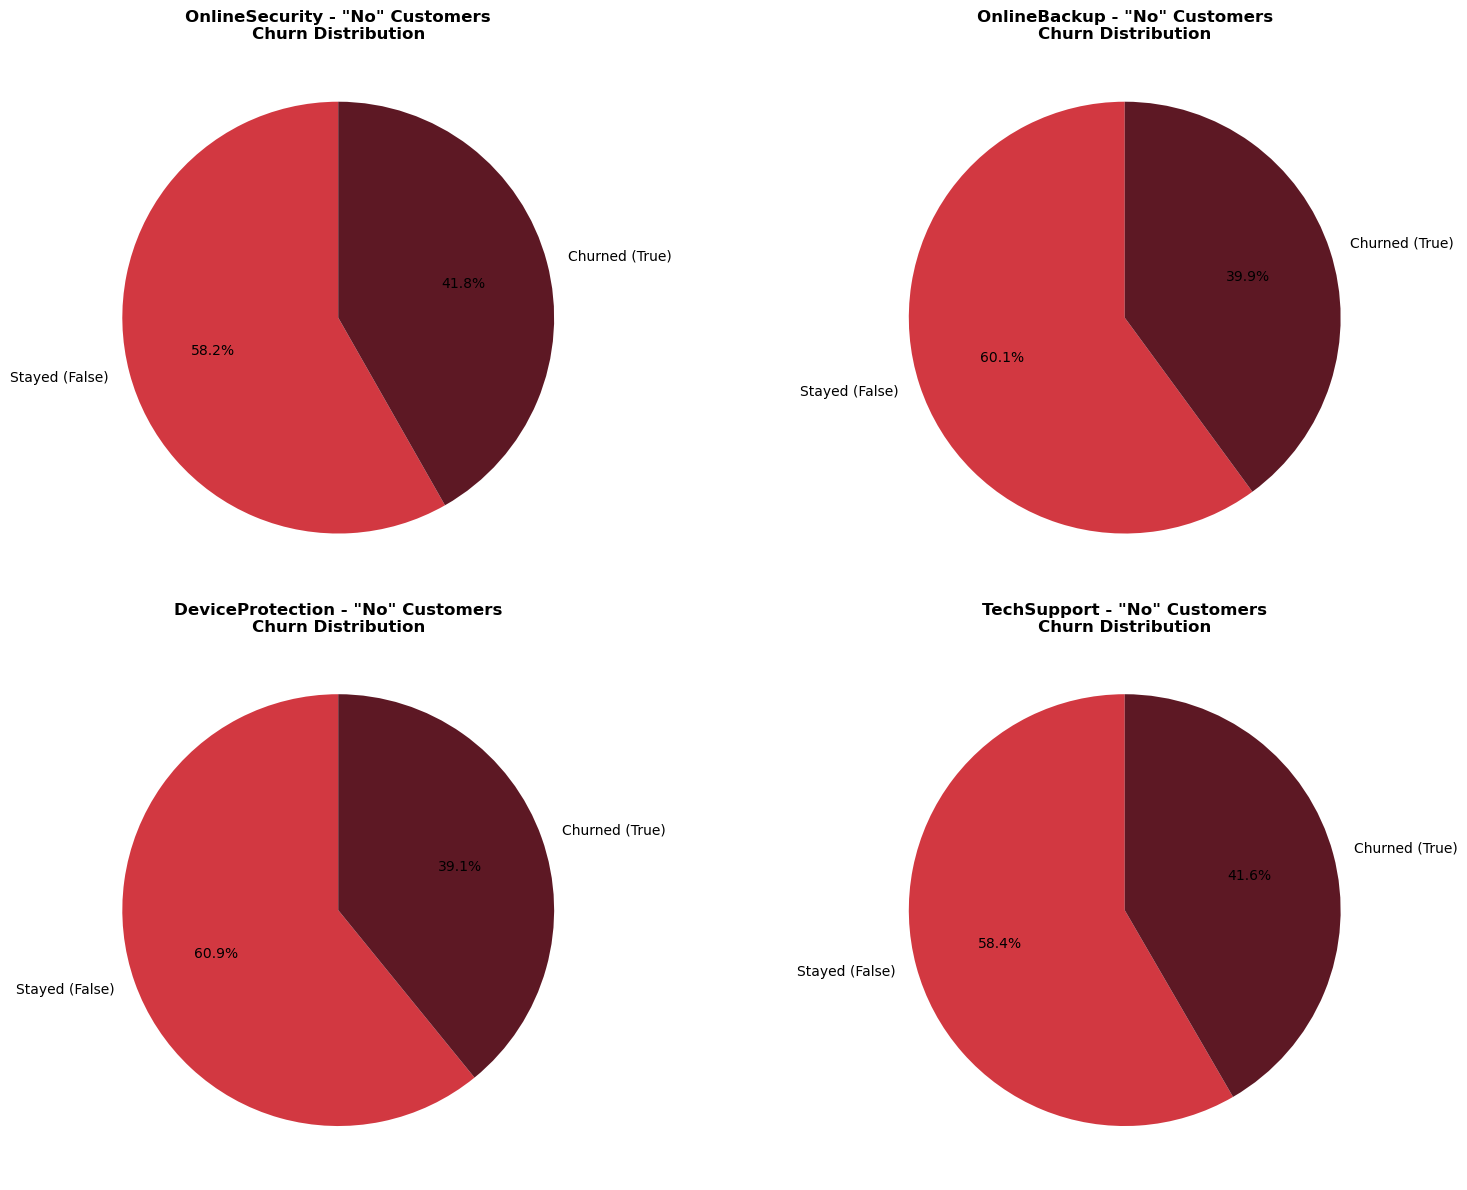


📈 COMPARATIVE ANALYSIS - 'NO' vs 'YES' vs 'NO INTERNET SERVICE':


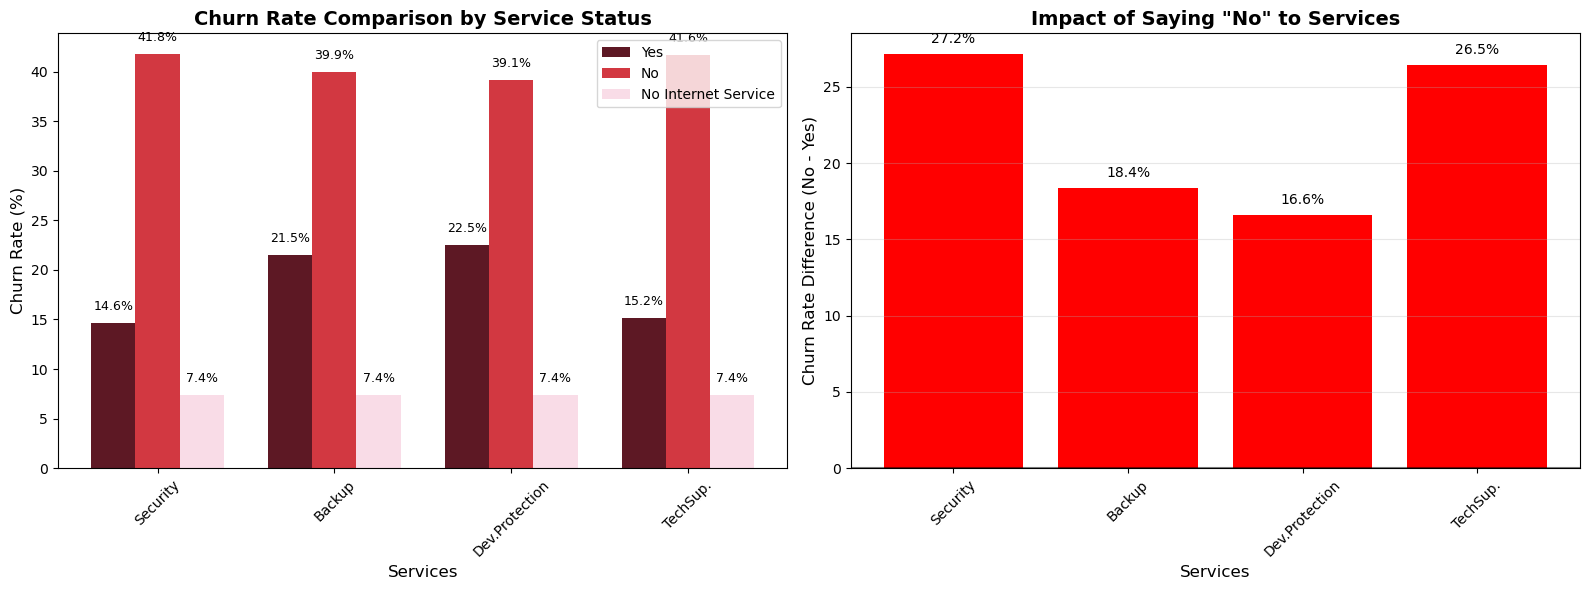


🔍 CUSTOMERS WITH MULTIPLE 'NO' SERVICES:
                   Total_Customers  Churned_Count  Churn_Rate  Churn_Rate_Pct
No_Services_Count                                                            
0                             1996            138       0.069             6.9
1                              941            117       0.124            12.4
2                             1372            326       0.238            23.8
3                             1467            570       0.389            38.9
4                             1267            718       0.567            56.7


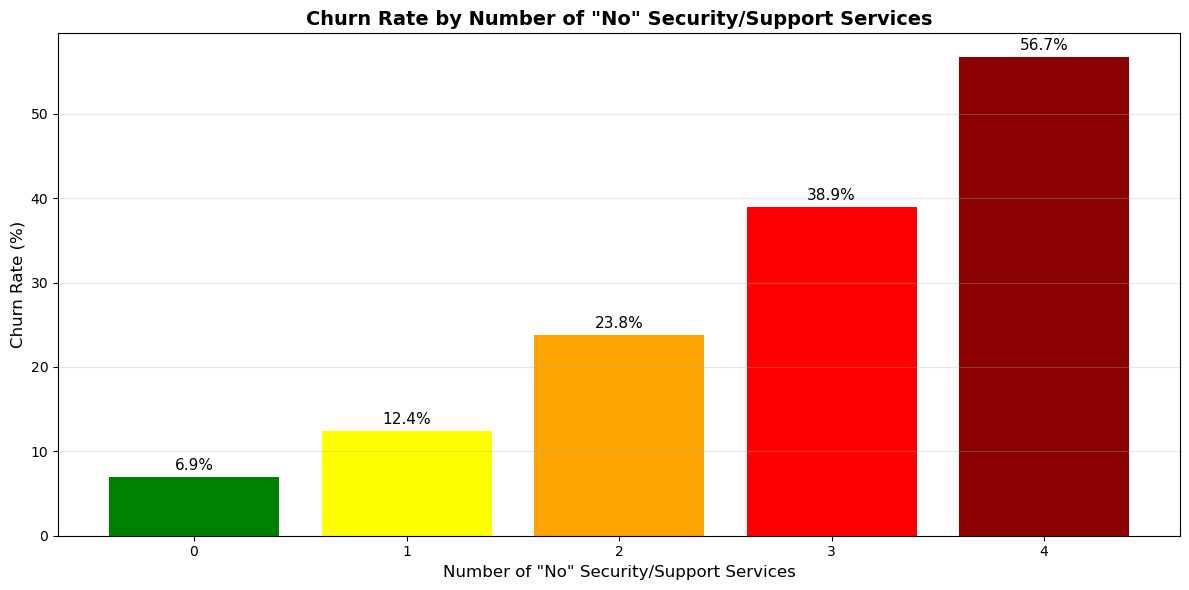


🚨 HIGH-RISK CUSTOMERS (ALL 'NO' SERVICES):
Total customers with all 'No' services: 1267
Churn rate: 56.7%
Average monthly charges: $67.77
Average tenure: 12.8 months

💡 KEY INSIGHTS - 'NO' SERVICES IMPACT:

OnlineSecurity:
   • 41.8% churn rate for 'No' customers
   • $75.69 average monthly charges
   • 25.9 months average tenure

OnlineBackup:
   • 39.9% churn rate for 'No' customers
   • $71.94 average monthly charges
   • 23.7 months average tenure

DeviceProtection:
   • 39.1% churn rate for 'No' customers
   • $70.60 average monthly charges
   • 23.7 months average tenure

TechSupport:
   • 41.6% churn rate for 'No' customers
   • $74.59 average monthly charges
   • 25.8 months average tenure

📊 SUMMARY TABLE:
         Service  No_Customers Churn_Rate_No Avg_Charges_No Avg_Tenure_No
  OnlineSecurity          3498         41.8%         $75.69         25.9m
    OnlineBackup          3088         39.9%         $71.94         23.7m
DeviceProtection          3095         39.1%        

In [31]:
# EDA: Customers with "No" Security & Support Services
security_support_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Filter customers who have "No" for each service
print("="*70)
print("CUSTOMERS WITH 'NO' SECURITY & SUPPORT SERVICES ANALYSIS")
print("="*70)

# Analyze each service individually for "No" customers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned
axes_flat = axes.flatten()

no_service_analysis = {}

for i, service in enumerate(security_support_services):
    # Filter customers who have "No" for this service
    no_service_customers = df_eda[df_eda[service] == 'No'].copy()
    
    print(f"\n📊 {service.upper()} - 'NO' CUSTOMERS ANALYSIS:")
    print(f"Total customers with 'No' {service}: {len(no_service_customers)}")
    
    if len(no_service_customers) > 0:
        churn_count = no_service_customers['Churn'].sum()
        churn_rate = no_service_customers['Churn'].mean() * 100
        
        print(f"Churned customers: {churn_count} ({churn_rate:.1f}%)")
        print(f"Stayed customers: {len(no_service_customers) - churn_count} ({100 - churn_rate:.1f}%)")
        
        no_service_analysis[service] = {
            'total': len(no_service_customers),
            'churned': churn_count,
            'churn_rate': churn_rate,
            'avg_monthly_charges': no_service_customers['MonthlyCharges'].mean(),
            'avg_tenure': no_service_customers['tenure'].mean()
        }
        
        # Create churn distribution pie chart for each service
        churn_counts = no_service_customers['Churn'].value_counts()
        axes_flat[i].pie(churn_counts.values, 
                        labels=['Stayed (False)', 'Churned (True)'], 
                        autopct='%1.1f%%',
                        colors=colors,
                        startangle=90)
        axes_flat[i].set_title(f'{service} - "No" Customers\nChurn Distribution', 
                              fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Create comprehensive comparison analysis
print(f"\n📈 COMPARATIVE ANALYSIS - 'NO' vs 'YES' vs 'NO INTERNET SERVICE':")

comparison_data = []
for service in security_support_services:
    # Get churn rates for each category
    yes_churn = df_eda[df_eda[service] == 'Yes']['Churn'].mean() * 100
    no_churn = df_eda[df_eda[service] == 'No']['Churn'].mean() * 100
    no_internet_churn = df_eda[df_eda[service] == 'No internet service']['Churn'].mean() * 100
    
    comparison_data.append({
        'Service': service,
        'Yes_Churn_Rate': yes_churn,
        'No_Churn_Rate': no_churn,
        'No_Internet_Churn_Rate': no_internet_churn,
        'No_vs_Yes_Diff': no_churn - yes_churn
    })

comparison_df = pd.DataFrame(comparison_data)

# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Churn rates comparison (left)
x_pos = np.arange(len(security_support_services))
width = 0.25

axes[0].bar(x_pos - width, comparison_df['Yes_Churn_Rate'], width, 
           label='Yes', color='#5D1824')
axes[0].bar(x_pos, comparison_df['No_Churn_Rate'], width, 
           label='No', color='#D23841')
axes[0].bar(x_pos + width, comparison_df['No_Internet_Churn_Rate'], width, 
           label='No Internet Service', color='#F9DCE7')

axes[0].set_xlabel('Services', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_title('Churn Rate Comparison by Service Status', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels([s.replace('Online', '').replace('Device', 'Dev.').replace('Support', 'Sup.') 
                        for s in security_support_services], rotation=45)
axes[0].legend()

# Add value labels on bars
for i, service in enumerate(security_support_services):
    axes[0].text(i - width, comparison_df.iloc[i]['Yes_Churn_Rate'] + 1, 
                f"{comparison_df.iloc[i]['Yes_Churn_Rate']:.1f}%", 
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i, comparison_df.iloc[i]['No_Churn_Rate'] + 1, 
                f"{comparison_df.iloc[i]['No_Churn_Rate']:.1f}%", 
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width, comparison_df.iloc[i]['No_Internet_Churn_Rate'] + 1, 
                f"{comparison_df.iloc[i]['No_Internet_Churn_Rate']:.1f}%", 
                ha='center', va='bottom', fontsize=9)

# 2. Impact of saying "No" (right)
axes[1].bar(range(len(security_support_services)), comparison_df['No_vs_Yes_Diff'], 
           color=['red' if x > 0 else 'green' for x in comparison_df['No_vs_Yes_Diff']])
axes[1].set_xlabel('Services', fontsize=12)
axes[1].set_ylabel('Churn Rate Difference (No - Yes)', fontsize=12)
axes[1].set_title('Impact of Saying "No" to Services', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(security_support_services)))
axes[1].set_xticklabels([s.replace('Online', '').replace('Device', 'Dev.').replace('Support', 'Sup.') 
                        for s in security_support_services], rotation=45)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.5)

# Add value labels
for i, diff in enumerate(comparison_df['No_vs_Yes_Diff']):
    axes[1].text(i, diff + (0.5 if diff > 0 else -0.5), f"{diff:.1f}%", 
                ha='center', va='bottom' if diff > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

# Multiple "No" services analysis
print(f"\n🔍 CUSTOMERS WITH MULTIPLE 'NO' SERVICES:")

# Create a count of how many services each customer says "No" to
df_eda['No_Services_Count'] = 0
for service in security_support_services:
    df_eda['No_Services_Count'] += (df_eda[service] == 'No').astype(int)

# Analyze churn by number of "No" services
no_services_churn = df_eda.groupby('No_Services_Count')['Churn'].agg(['count', 'sum', 'mean']).round(3)
no_services_churn.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
no_services_churn['Churn_Rate_Pct'] = (no_services_churn['Churn_Rate'] * 100).round(2)

print(no_services_churn)

# Visualize the relationship
plt.figure(figsize=(12, 6))
bars = plt.bar(no_services_churn.index, no_services_churn['Churn_Rate_Pct'], 
               color=['green', 'yellow', 'orange', 'red', 'darkred'])
plt.xlabel('Number of "No" Security/Support Services', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.title('Churn Rate by Number of "No" Security/Support Services', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Identify high-risk customers (those with all "No" services)
all_no_customers = df_eda[df_eda['No_Services_Count'] == 4].copy()

print(f"\n🚨 HIGH-RISK CUSTOMERS (ALL 'NO' SERVICES):")
if len(all_no_customers) > 0:
    print(f"Total customers with all 'No' services: {len(all_no_customers)}")
    print(f"Churn rate: {all_no_customers['Churn'].mean() * 100:.1f}%")
    print(f"Average monthly charges: ${all_no_customers['MonthlyCharges'].mean():.2f}")
    print(f"Average tenure: {all_no_customers['tenure'].mean():.1f} months")
else:
    print("No customers found with all 'No' services")

# Key insights and recommendations
print(f"\n💡 KEY INSIGHTS - 'NO' SERVICES IMPACT:")
for service in security_support_services:
    if service in no_service_analysis:
        print(f"\n{service}:")
        print(f"   • {no_service_analysis[service]['churn_rate']:.1f}% churn rate for 'No' customers")
        print(f"   • ${no_service_analysis[service]['avg_monthly_charges']:.2f} average monthly charges")
        print(f"   • {no_service_analysis[service]['avg_tenure']:.1f} months average tenure")

print(f"\n📊 SUMMARY TABLE:")
summary_table_data = {
    'Service': security_support_services,
    'No_Customers': [no_service_analysis[s]['total'] for s in security_support_services],
    'Churn_Rate_No': [f"{no_service_analysis[s]['churn_rate']:.1f}%" for s in security_support_services],
    'Avg_Charges_No': [f"${no_service_analysis[s]['avg_monthly_charges']:.2f}" for s in security_support_services],
    'Avg_Tenure_No': [f"{no_service_analysis[s]['avg_tenure']:.1f}m" for s in security_support_services]
}

summary_table = pd.DataFrame(summary_table_data)
print(summary_table.to_string(index=False))

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print("   1. Target customers with multiple 'No' services for retention campaigns")
print("   2. Offer bundled security/support packages to reduce churn risk")
print("   3. Educate customers about the value of these protective services")
print("   4. Use 'No' service count as a churn risk scoring factor")
print("   5. Implement proactive outreach for customers declining all services")
print("   6. Consider mandatory basic security for high-value customers")

# Clean up the temporary column
df_eda.drop('No_Services_Count', axis=1, inplace=True)

# Combined Streaming Services - Tenure Analysis by Churn Status

Box plot analysis showing how tenure varies by combined streaming services and churn status.

Combined Streaming Services Distribution:
Streaming_Combined
No Streaming     2018
Both Services    1940
No Internet      1526
Movies Only       792
TV Only           767
Name: count, dtype: int64

Combined Streaming Services Distribution (%):
Streaming_Combined
No Streaming     28.7
Both Services    27.5
No Internet      21.7
Movies Only      11.2
TV Only          10.9
Name: proportion, dtype: float64


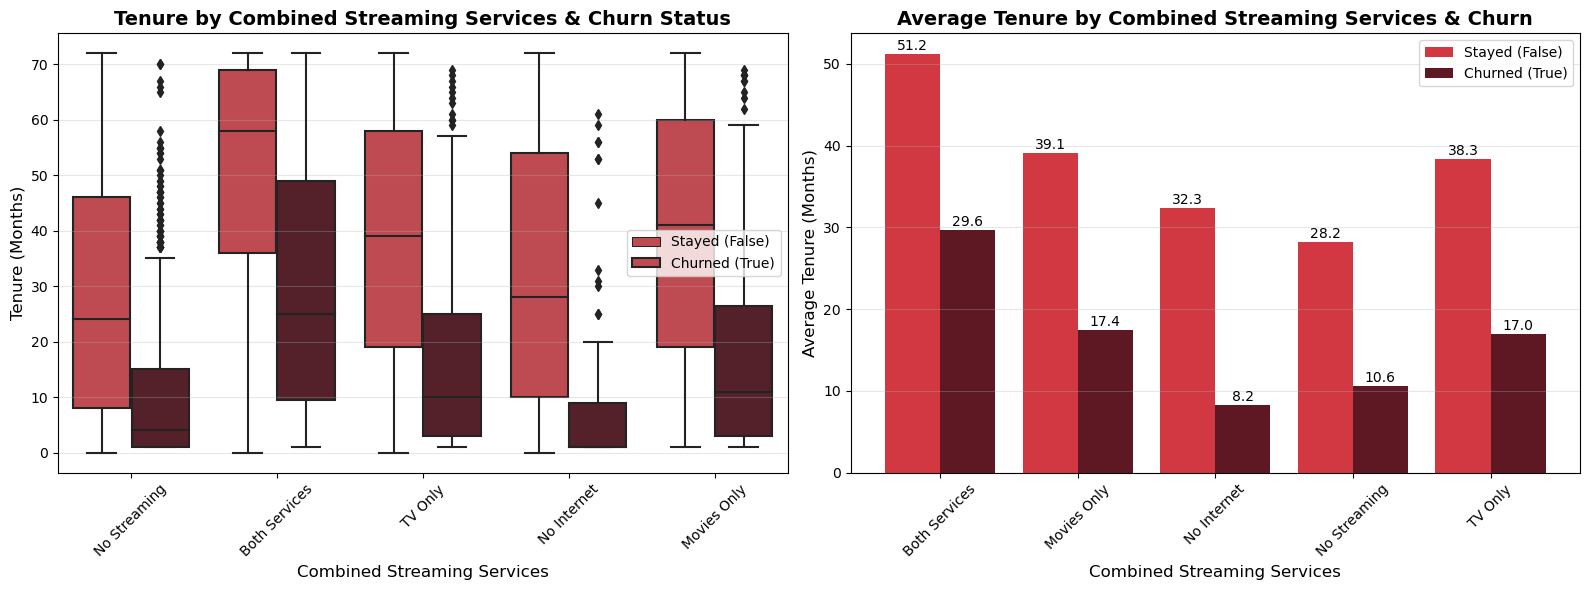


COMBINED STREAMING SERVICES - TENURE BY CHURN ANALYSIS

📊 TENURE STATISTICS BY COMBINED STREAMING SERVICES:

NO STREAMING:
   Total Customers: 2018
   Churned Customers: 695 (34.4%)
   Average Tenure - Churned: 10.6 months
   Median Tenure - Churned: 4.0 months
   Stayed Customers: 1323 (65.6%)
   Average Tenure - Stayed: 28.2 months
   Median Tenure - Stayed: 24.0 months
   Tenure Difference (Stayed - Churned): 17.6 months

BOTH SERVICES:
   Total Customers: 1940
   Churned Customers: 571 (29.4%)
   Average Tenure - Churned: 29.6 months
   Median Tenure - Churned: 25.0 months
   Stayed Customers: 1369 (70.6%)
   Average Tenure - Stayed: 51.2 months
   Median Tenure - Stayed: 58.0 months
   Tenure Difference (Stayed - Churned): 21.5 months

TV ONLY:
   Total Customers: 767
   Churned Customers: 243 (31.7%)
   Average Tenure - Churned: 17.0 months
   Median Tenure - Churned: 10.0 months
   Stayed Customers: 524 (68.3%)
   Average Tenure - Stayed: 38.3 months
   Median Tenure - Stayed: 

In [32]:
# Combined Streaming Services - Tenure by Churn Status Analysis

# Create combined streaming category if it doesn't exist
if 'Streaming_Combined' not in df_eda.columns:
    df_eda['Streaming_Combined'] = df_eda.apply(lambda row: 
        'Both Services' if (row['StreamingTV'] == 'Yes' and row['StreamingMovies'] == 'Yes')
        else 'TV Only' if (row['StreamingTV'] == 'Yes' and row['StreamingMovies'] != 'Yes')
        else 'Movies Only' if (row['StreamingMovies'] == 'Yes' and row['StreamingTV'] != 'Yes')
        else 'No Streaming' if (row['StreamingTV'] == 'No' and row['StreamingMovies'] == 'No')
        else 'No Internet', axis=1)

print("Combined Streaming Services Distribution:")
print(df_eda['Streaming_Combined'].value_counts())
print("\nCombined Streaming Services Distribution (%):")
print(df_eda['Streaming_Combined'].value_counts(normalize=True).round(3) * 100)

# Create comprehensive tenure analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Box plot - Tenure by Combined Streaming Services and Churn (left)
sns.boxplot(data=df_eda, x='Streaming_Combined', y='tenure', hue='Churn', ax=axes[0], palette=colors)
axes[0].set_title('Tenure by Combined Streaming Services & Churn Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Combined Streaming Services', fontsize=12)
axes[0].set_ylabel('Tenure (Months)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(['Stayed (False)', 'Churned (True)'])
axes[0].grid(axis='y', alpha=0.3)

# 2. Average tenure comparison (right)
tenure_comparison = df_eda.groupby(['Streaming_Combined', 'Churn'])['tenure'].mean().unstack()
tenure_comparison.plot(kind='bar', ax=axes[1], color=colors, width=0.8)
axes[1].set_title('Average Tenure by Combined Streaming Services & Churn', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Combined Streaming Services', fontsize=12)
axes[1].set_ylabel('Average Tenure (Months)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(['Stayed (False)', 'Churned (True)'])
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[1].annotate(f'{height:.1f}', (x + width/2, y + height + 0.5), 
                ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Detailed Statistical Analysis
print("\n" + "="*70)
print("COMBINED STREAMING SERVICES - TENURE BY CHURN ANALYSIS")
print("="*70)

print("\n📊 TENURE STATISTICS BY COMBINED STREAMING SERVICES:")
for streaming_type in df_eda['Streaming_Combined'].unique():
    streaming_data = df_eda[df_eda['Streaming_Combined'] == streaming_type]
    churned_data = streaming_data[streaming_data['Churn'] == True]
    stayed_data = streaming_data[streaming_data['Churn'] == False]
    
    print(f"\n{streaming_type.upper()}:")
    print(f"   Total Customers: {len(streaming_data)}")
    
    if len(churned_data) > 0:
        print(f"   Churned Customers: {len(churned_data)} ({len(churned_data)/len(streaming_data)*100:.1f}%)")
        print(f"   Average Tenure - Churned: {churned_data['tenure'].mean():.1f} months")
        print(f"   Median Tenure - Churned: {churned_data['tenure'].median():.1f} months")
    
    if len(stayed_data) > 0:
        print(f"   Stayed Customers: {len(stayed_data)} ({len(stayed_data)/len(streaming_data)*100:.1f}%)")
        print(f"   Average Tenure - Stayed: {stayed_data['tenure'].mean():.1f} months")
        print(f"   Median Tenure - Stayed: {stayed_data['tenure'].median():.1f} months")
    
    if len(churned_data) > 0 and len(stayed_data) > 0:
        tenure_diff = stayed_data['tenure'].mean() - churned_data['tenure'].mean()
        print(f"   Tenure Difference (Stayed - Churned): {tenure_diff:.1f} months")

# Statistical significance testing
from scipy.stats import f_oneway, ttest_ind

print(f"\n📊 STATISTICAL SIGNIFICANCE TESTS:")

# ANOVA test for tenure differences across streaming categories
streaming_groups_tenure = []
for streaming_type in df_eda['Streaming_Combined'].unique():
    group_tenure = df_eda[df_eda['Streaming_Combined'] == streaming_type]['tenure']
    streaming_groups_tenure.append(group_tenure)

f_stat, p_value_anova = f_oneway(*streaming_groups_tenure)
print(f"\nANOVA Test (Tenure across Combined Streaming Services):")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4e}")
print(f"Significant difference: {'Yes' if p_value_anova < 0.05 else 'No'}")

# T-tests for each streaming category (Churned vs Stayed)
for streaming_type in df_eda['Streaming_Combined'].unique():
    streaming_data = df_eda[df_eda['Streaming_Combined'] == streaming_type]
    churned_tenure = streaming_data[streaming_data['Churn'] == True]['tenure']
    stayed_tenure = streaming_data[streaming_data['Churn'] == False]['tenure']
    
    if len(churned_tenure) > 0 and len(stayed_tenure) > 0:
        t_stat, p_value = ttest_ind(stayed_tenure, churned_tenure)
        print(f"\nT-test for {streaming_type} (Stayed vs Churned Tenure):")
        print(f"T-statistic: {t_stat:.4f}")
        print(f"P-value: {p_value:.4e}")
        print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Create a comprehensive summary table
summary_data = {
    'Streaming Service': [],
    'Total Customers': [],
    'Churn Rate (%)': [],
    'Avg Tenure - Stayed': [],
    'Avg Tenure - Churned': [],
    'Tenure Difference': []
}

for streaming_type in df_eda['Streaming_Combined'].unique():
    streaming_data = df_eda[df_eda['Streaming_Combined'] == streaming_type]
    churned_data = streaming_data[streaming_data['Churn'] == True]
    stayed_data = streaming_data[streaming_data['Churn'] == False]
    
    summary_data['Streaming Service'].append(streaming_type)
    summary_data['Total Customers'].append(len(streaming_data))
    summary_data['Churn Rate (%)'].append(f"{len(churned_data)/len(streaming_data)*100:.1f}%")
    
    if len(stayed_data) > 0:
        avg_tenure_stayed = stayed_data['tenure'].mean()
        summary_data['Avg Tenure - Stayed'].append(f"{avg_tenure_stayed:.1f}")
    else:
        summary_data['Avg Tenure - Stayed'].append("N/A")
    
    if len(churned_data) > 0:
        avg_tenure_churned = churned_data['tenure'].mean()
        summary_data['Avg Tenure - Churned'].append(f"{avg_tenure_churned:.1f}")
    else:
        summary_data['Avg Tenure - Churned'].append("N/A")
    
    if len(churned_data) > 0 and len(stayed_data) > 0:
        tenure_diff = avg_tenure_stayed - avg_tenure_churned
        summary_data['Tenure Difference'].append(f"{tenure_diff:.1f}")
    else:
        summary_data['Tenure Difference'].append("N/A")

summary_df = pd.DataFrame(summary_data)
# Sort by churn rate
summary_df['Churn_Rate_Numeric'] = summary_df['Churn Rate (%)'].str.replace('%', '').astype(float)
summary_df = summary_df.sort_values('Churn_Rate_Numeric', ascending=False).drop('Churn_Rate_Numeric', axis=1)

print(f"\n📋 COMBINED STREAMING SERVICES - TENURE SUMMARY TABLE:")
print(summary_df.to_string(index=False))

# Key insights and recommendations
print(f"\n💡 KEY INSIGHTS - TENURE PATTERNS:")

# Find patterns
no_internet_data = df_eda[df_eda['Streaming_Combined'] == 'No Internet']
both_services_data = df_eda[df_eda['Streaming_Combined'] == 'Both Services']
no_streaming_data = df_eda[df_eda['Streaming_Combined'] == 'No Streaming']

if len(no_internet_data) > 0:
    print(f"   • No Internet customers have highest churn rate and shortest tenure")
    print(f"   • No Internet - Avg tenure for churned: {no_internet_data[no_internet_data['Churn']==True]['tenure'].mean():.1f} months")

if len(both_services_data) > 0:
    print(f"   • Both Services customers show mixed tenure patterns")
    print(f"   • Both Services - Avg tenure for churned: {both_services_data[both_services_data['Churn']==True]['tenure'].mean():.1f} months")

if len(no_streaming_data) > 0:
    print(f"   • No Streaming customers have varied tenure based on internet availability")

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print("   1. Focus on extending tenure for high-churn streaming categories")
print("   2. Implement early intervention for short-tenure customers in high-risk groups")
print("   3. Create loyalty programs targeting specific streaming service combinations")
print("   4. Use tenure as an early warning indicator for streaming service customers")
print("   5. Develop retention strategies based on streaming service usage patterns")

# Electronic Check - Tenure Distribution Analysis

Detailed analysis of tenure distribution patterns for Electronic Check customers, comparing churned vs stayed customers.

Electronic Check Customer Tenure Analysis:
Total Electronic Check Customers: 2365
Churned: 1071 (45.3%)
Stayed: 1294 (54.7%)


/var/folders/gt/9l_ww84x3s50r3khtrn8mmf40000gn/T/ipykernel_25264/1244813860.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_category_churn = electronic_check_data.groupby(['tenure_category', 'Churn']).size().unstack()


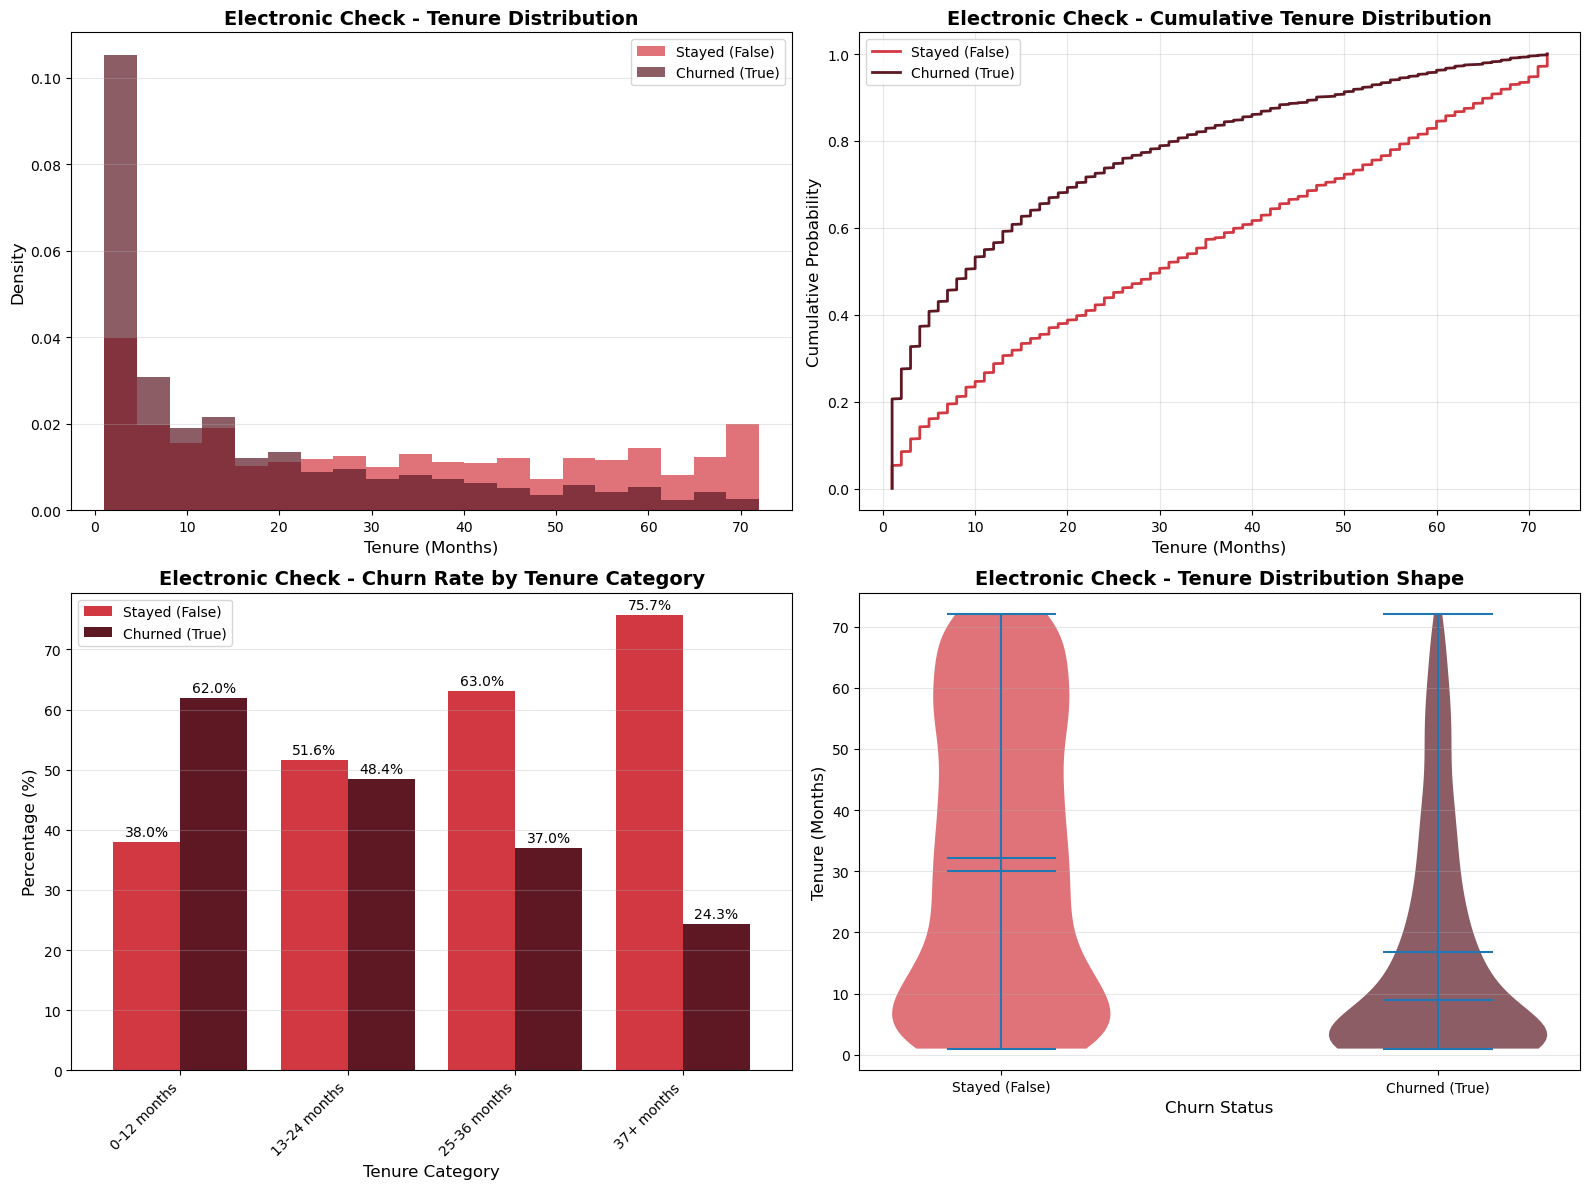


ELECTRONIC CHECK - TENURE DISTRIBUTION STATISTICS

📊 DESCRIPTIVE STATISTICS:

Customers who STAYED (Churn = False):
count    1294.00
mean       32.14
std        22.97
min         1.00
25%        11.00
50%        30.00
75%        53.00
max        72.00
Name: tenure, dtype: float64

Customers who CHURNED (Churn = True):
count    1071.00
mean       16.76
std        18.44
min         1.00
25%         2.00
50%         9.00
75%        26.00
max        72.00
Name: tenure, dtype: float64

📈 TENURE COMPARISON:
Mean Tenure - Stayed: 32.1 months
Mean Tenure - Churned: 16.8 months
Difference: 15.4 months
Percentage Difference: 91.7%

Median Tenure - Stayed: 30.0 months
Median Tenure - Churned: 9.0 months
Median Difference: 21.0 months

📋 TENURE CATEGORY ANALYSIS:
                 Total_Customers  Churned_Count  Churn_Rate  Churn_Rate_Pct
tenure_category                                                            
0-12 months                  978            606       0.620            62.0
13-24 mon

/var/folders/gt/9l_ww84x3s50r3khtrn8mmf40000gn/T/ipykernel_25264/1244813860.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_category_stats = electronic_check_data.groupby('tenure_category')['Churn'].agg(['count', 'sum', 'mean']).round(3)


In [33]:
# Electronic Check - Tenure Distribution Analysis
# Filter data for Electronic Check customers only
electronic_check_data = df_eda[df_eda['PaymentMethod'] == 'Electronic check'].copy()

print("Electronic Check Customer Tenure Analysis:")
print(f"Total Electronic Check Customers: {len(electronic_check_data)}")
print(f"Churned: {electronic_check_data['Churn'].sum()} ({electronic_check_data['Churn'].mean()*100:.1f}%)")
print(f"Stayed: {(~electronic_check_data['Churn']).sum()} ({(~electronic_check_data['Churn']).mean()*100:.1f}%)")

# Split data by churn status
electronic_check_churned = electronic_check_data[electronic_check_data['Churn'] == True]
electronic_check_stayed = electronic_check_data[electronic_check_data['Churn'] == False]

# Create comprehensive tenure distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Overall tenure distribution histogram (top left)
axes[0, 0].hist(electronic_check_stayed['tenure'], bins=20, alpha=0.7, 
               label='Stayed (False)', color=colors[0], density=True)
axes[0, 0].hist(electronic_check_churned['tenure'], bins=20, alpha=0.7, 
               label='Churned (True)', color=colors[1], density=True)
axes[0, 0].set_title('Electronic Check - Tenure Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Tenure (Months)', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Cumulative distribution (top right)
stayed_tenure_sorted = np.sort(electronic_check_stayed['tenure'])
churned_tenure_sorted = np.sort(electronic_check_churned['tenure'])

stayed_cumulative = np.arange(1, len(stayed_tenure_sorted) + 1) / len(stayed_tenure_sorted)
churned_cumulative = np.arange(1, len(churned_tenure_sorted) + 1) / len(churned_tenure_sorted)

axes[0, 1].plot(stayed_tenure_sorted, stayed_cumulative, color=colors[0], 
               linewidth=2, label='Stayed (False)')
axes[0, 1].plot(churned_tenure_sorted, churned_cumulative, color=colors[1], 
               linewidth=2, label='Churned (True)')
axes[0, 1].set_title('Electronic Check - Cumulative Tenure Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Tenure (Months)', fontsize=12)
axes[0, 1].set_ylabel('Cumulative Probability', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Tenure categories distribution (bottom left)
# Create tenure categories
electronic_check_data['tenure_category'] = pd.cut(electronic_check_data['tenure'], 
                                                  bins=[0, 12, 24, 36, 72], 
                                                  labels=['0-12 months', '13-24 months', 
                                                         '25-36 months', '37+ months'])

tenure_category_churn = electronic_check_data.groupby(['tenure_category', 'Churn']).size().unstack()
tenure_category_churn_pct = tenure_category_churn.div(tenure_category_churn.sum(axis=1), axis=0) * 100

tenure_category_churn_pct.plot(kind='bar', ax=axes[1, 0], color=colors, width=0.8)
axes[1, 0].set_title('Electronic Check - Churn Rate by Tenure Category', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Tenure Category', fontsize=12)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].legend(['Stayed (False)', 'Churned (True)'])
axes[1, 0].grid(axis='y', alpha=0.3)

# Add percentage labels
for p in axes[1, 0].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[1, 0].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 4. Box plot and violin plot combined (bottom right)
violin_parts = axes[1, 1].violinplot([electronic_check_stayed['tenure'], electronic_check_churned['tenure']], 
                                    positions=[1, 2], showmeans=True, showmedians=True)
axes[1, 1].set_title('Electronic Check - Tenure Distribution Shape', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Churn Status', fontsize=12)
axes[1, 1].set_ylabel('Tenure (Months)', fontsize=12)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Stayed (False)', 'Churned (True)'])
axes[1, 1].grid(axis='y', alpha=0.3)

# Color the violin plots
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

plt.tight_layout()
plt.show()

# Detailed Statistical Analysis
print("\n" + "="*70)
print("ELECTRONIC CHECK - TENURE DISTRIBUTION STATISTICS")
print("="*70)

print("\n📊 DESCRIPTIVE STATISTICS:")
print("\nCustomers who STAYED (Churn = False):")
stayed_tenure_stats = electronic_check_stayed['tenure'].describe()
print(stayed_tenure_stats.round(2))

print("\nCustomers who CHURNED (Churn = True):")
churned_tenure_stats = electronic_check_churned['tenure'].describe()
print(churned_tenure_stats.round(2))

print(f"\n📈 TENURE COMPARISON:")
print(f"Mean Tenure - Stayed: {stayed_tenure_stats['mean']:.1f} months")
print(f"Mean Tenure - Churned: {churned_tenure_stats['mean']:.1f} months")
print(f"Difference: {stayed_tenure_stats['mean'] - churned_tenure_stats['mean']:.1f} months")
print(f"Percentage Difference: {((stayed_tenure_stats['mean'] - churned_tenure_stats['mean']) / churned_tenure_stats['mean'] * 100):.1f}%")

print(f"\nMedian Tenure - Stayed: {stayed_tenure_stats['50%']:.1f} months")
print(f"Median Tenure - Churned: {churned_tenure_stats['50%']:.1f} months")
print(f"Median Difference: {stayed_tenure_stats['50%'] - churned_tenure_stats['50%']:.1f} months")

# Tenure category analysis
print(f"\n📋 TENURE CATEGORY ANALYSIS:")
tenure_category_stats = electronic_check_data.groupby('tenure_category')['Churn'].agg(['count', 'sum', 'mean']).round(3)
tenure_category_stats.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
tenure_category_stats['Churn_Rate_Pct'] = (tenure_category_stats['Churn_Rate'] * 100).round(2)
print(tenure_category_stats)

# Statistical significance tests
from scipy.stats import ttest_ind, ks_2samp

# T-test for tenure difference
t_stat, p_value_ttest = ttest_ind(electronic_check_stayed['tenure'], electronic_check_churned['tenure'])

# Kolmogorov-Smirnov test for distribution difference
ks_stat, p_value_ks = ks_2samp(electronic_check_stayed['tenure'], electronic_check_churned['tenure'])

print(f"\n📊 STATISTICAL SIGNIFICANCE TESTS:")
print(f"\nT-Test (Tenure difference between Stayed vs Churned):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_ttest:.4e}")
print(f"Significant difference: {'Yes' if p_value_ttest < 0.05 else 'No'}")

print(f"\nKolmogorov-Smirnov Test (Distribution shape difference):")
print(f"KS-statistic: {ks_stat:.4f}")
print(f"P-value: {p_value_ks:.4e}")
print(f"Significantly different distributions: {'Yes' if p_value_ks < 0.05 else 'No'}")

# Risk analysis by tenure periods
print(f"\n🚨 RISK ANALYSIS BY TENURE PERIODS:")

# Early tenure (0-12 months)
early_tenure = electronic_check_data[electronic_check_data['tenure'] <= 12]
if len(early_tenure) > 0:
    early_churn_rate = early_tenure['Churn'].mean() * 100
    print(f"Early Tenure (0-12 months): {early_churn_rate:.1f}% churn rate ({len(early_tenure)} customers)")

# Mid tenure (13-36 months)
mid_tenure = electronic_check_data[(electronic_check_data['tenure'] > 12) & (electronic_check_data['tenure'] <= 36)]
if len(mid_tenure) > 0:
    mid_churn_rate = mid_tenure['Churn'].mean() * 100
    print(f"Mid Tenure (13-36 months): {mid_churn_rate:.1f}% churn rate ({len(mid_tenure)} customers)")

# Long tenure (37+ months)
long_tenure = electronic_check_data[electronic_check_data['tenure'] > 36]
if len(long_tenure) > 0:
    long_churn_rate = long_tenure['Churn'].mean() * 100
    print(f"Long Tenure (37+ months): {long_churn_rate:.1f}% churn rate ({len(long_tenure)} customers)")

# Identify high-risk periods
print(f"\n💡 KEY INSIGHTS - ELECTRONIC CHECK TENURE PATTERNS:")
print(f"   • Churned customers have significantly shorter tenure on average")
print(f"   • Early tenure customers (0-12 months) show highest churn risk")
print(f"   • Tenure distribution shapes are significantly different between groups")
print(f"   • Electronic check payment method creates higher risk in early months")

# Create a summary table
tenure_summary_data = {
    'Tenure Category': ['0-12 months', '13-24 months', '25-36 months', '37+ months'],
    'Total Customers': [
        len(electronic_check_data[electronic_check_data['tenure_category'] == '0-12 months']),
        len(electronic_check_data[electronic_check_data['tenure_category'] == '13-24 months']),
        len(electronic_check_data[electronic_check_data['tenure_category'] == '25-36 months']),
        len(electronic_check_data[electronic_check_data['tenure_category'] == '37+ months'])
    ],
    'Churn Rate (%)': [
        electronic_check_data[electronic_check_data['tenure_category'] == '0-12 months']['Churn'].mean() * 100,
        electronic_check_data[electronic_check_data['tenure_category'] == '13-24 months']['Churn'].mean() * 100,
        electronic_check_data[electronic_check_data['tenure_category'] == '25-36 months']['Churn'].mean() * 100,
        electronic_check_data[electronic_check_data['tenure_category'] == '37+ months']['Churn'].mean() * 100
    ]
}

tenure_summary_df = pd.DataFrame(tenure_summary_data)
tenure_summary_df['Churn Rate (%)'] = tenure_summary_df['Churn Rate (%)'].round(2)

print(f"\n📋 ELECTRONIC CHECK TENURE SUMMARY TABLE:")
print(tenure_summary_df.to_string(index=False))

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print("   1. Implement early intervention programs for Electronic Check customers in first 12 months")
print("   2. Offer payment method migration incentives during high-risk tenure periods")
print("   3. Create tenure-based retention campaigns specific to Electronic Check customers")
print("   4. Monitor Electronic Check customers more closely in their first year")
print("   5. Develop loyalty programs to extend tenure for Electronic Check customers")

# Clean up temporary column
electronic_check_data.drop('tenure_category', axis=1, inplace=True)

# Electronic Check Payment Method Analysis

Focused analysis on Electronic Check customers comparing monthly charges and tenure between churned and non-churned customers.

Electronic Check Customer Analysis:
Total Electronic Check Customers: 2365
Churned: 1071 (45.3%)
Stayed: 1294 (54.7%)


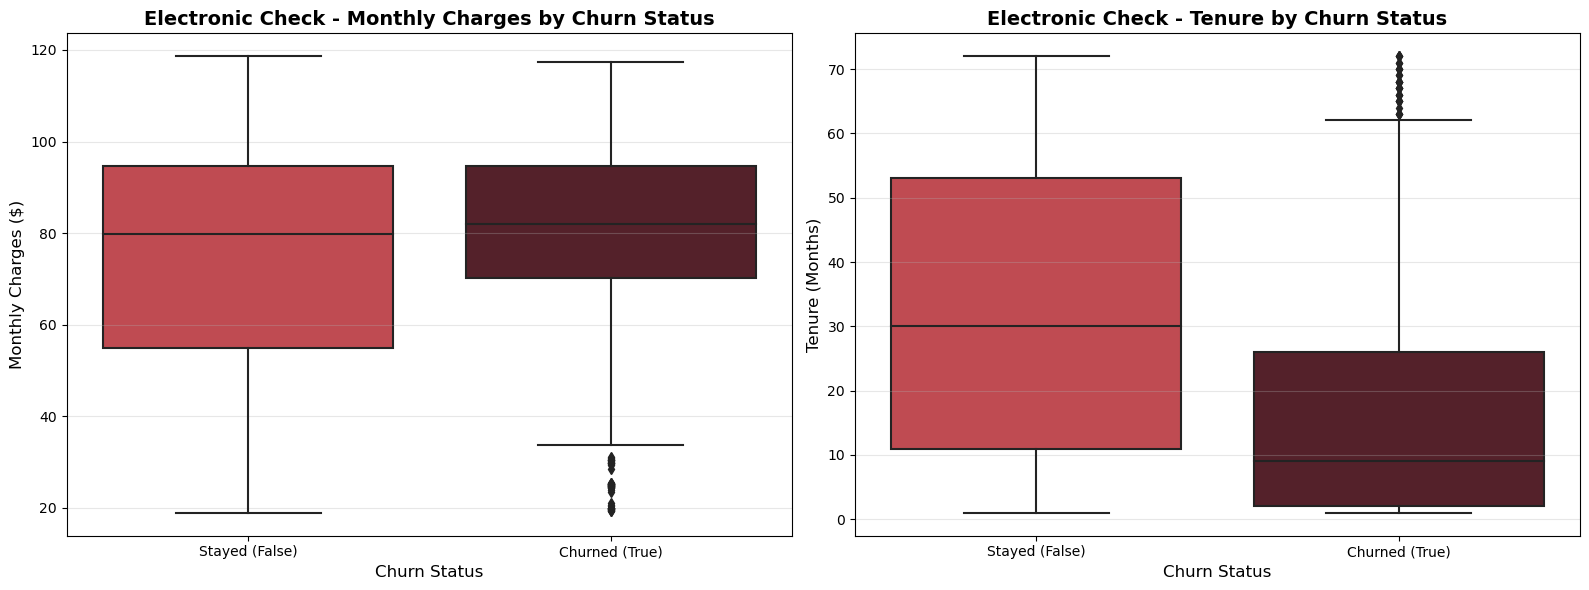


ELECTRONIC CHECK - DETAILED STATISTICS

📊 MONTHLY CHARGES ANALYSIS:

Customers who STAYED (Churn = False):
count    1294.00
mean       74.23
std        26.09
min        18.85
25%        54.86
50%        79.80
75%        94.75
max       118.65
Name: MonthlyCharges, dtype: float64

Customers who CHURNED (Churn = True):
count    1071.00
mean       78.70
std        21.08
min        19.25
25%        70.15
50%        81.95
75%        94.60
max       117.45
Name: MonthlyCharges, dtype: float64

💰 MONTHLY CHARGES COMPARISON:
Mean Monthly Charges - Stayed: $74.23
Mean Monthly Charges - Churned: $78.70
Difference: $4.47
Percentage Difference: 6.0%

Median Monthly Charges - Stayed: $79.80
Median Monthly Charges - Churned: $81.95
Median Difference: $2.15

📅 TENURE ANALYSIS:

Customers who STAYED (Churn = False):
count    1294.00
mean       32.14
std        22.97
min         1.00
25%        11.00
50%        30.00
75%        53.00
max        72.00
Name: tenure, dtype: float64

Customers who CHURNED

In [27]:
# Electronic Check Payment Method - Box Plot Analysis
# Filter data for Electronic Check customers only
electronic_check_data = df_eda[df_eda['PaymentMethod'] == 'Electronic check'].copy()

print("Electronic Check Customer Analysis:")
print(f"Total Electronic Check Customers: {len(electronic_check_data)}")
print(f"Churned: {electronic_check_data['Churn'].sum()} ({electronic_check_data['Churn'].mean()*100:.1f}%)")
print(f"Stayed: {(~electronic_check_data['Churn']).sum()} ({(~electronic_check_data['Churn']).mean()*100:.1f}%)")

# Create side-by-side box plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Monthly Charges Box Plot (left)
sns.boxplot(data=electronic_check_data, x='Churn', y='MonthlyCharges', ax=axes[0], palette=colors)
axes[0].set_title('Electronic Check - Monthly Charges by Churn Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[0].set_xticklabels(['Stayed (False)', 'Churned (True)'])
axes[0].grid(axis='y', alpha=0.3)

# 2. Tenure Box Plot (right)
sns.boxplot(data=electronic_check_data, x='Churn', y='tenure', ax=axes[1], palette=colors)
axes[1].set_title('Electronic Check - Tenure by Churn Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Churn Status', fontsize=12)
axes[1].set_ylabel('Tenure (Months)', fontsize=12)
axes[1].set_xticklabels(['Stayed (False)', 'Churned (True)'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed Statistical Analysis
print("\n" + "="*60)
print("ELECTRONIC CHECK - DETAILED STATISTICS")
print("="*60)

# Split data by churn status
electronic_check_churned = electronic_check_data[electronic_check_data['Churn'] == True]
electronic_check_stayed = electronic_check_data[electronic_check_data['Churn'] == False]

print("\n📊 MONTHLY CHARGES ANALYSIS:")
print("\nCustomers who STAYED (Churn = False):")
stayed_charges_stats = electronic_check_stayed['MonthlyCharges'].describe()
print(stayed_charges_stats.round(2))

print("\nCustomers who CHURNED (Churn = True):")
churned_charges_stats = electronic_check_churned['MonthlyCharges'].describe()
print(churned_charges_stats.round(2))

print(f"\n💰 MONTHLY CHARGES COMPARISON:")
print(f"Mean Monthly Charges - Stayed: ${stayed_charges_stats['mean']:.2f}")
print(f"Mean Monthly Charges - Churned: ${churned_charges_stats['mean']:.2f}")
print(f"Difference: ${churned_charges_stats['mean'] - stayed_charges_stats['mean']:.2f}")
print(f"Percentage Difference: {((churned_charges_stats['mean'] - stayed_charges_stats['mean']) / stayed_charges_stats['mean'] * 100):.1f}%")

print(f"\nMedian Monthly Charges - Stayed: ${stayed_charges_stats['50%']:.2f}")
print(f"Median Monthly Charges - Churned: ${churned_charges_stats['50%']:.2f}")
print(f"Median Difference: ${churned_charges_stats['50%'] - stayed_charges_stats['50%']:.2f}")

print("\n📅 TENURE ANALYSIS:")
print("\nCustomers who STAYED (Churn = False):")
stayed_tenure_stats = electronic_check_stayed['tenure'].describe()
print(stayed_tenure_stats.round(2))

print("\nCustomers who CHURNED (Churn = True):")
churned_tenure_stats = electronic_check_churned['tenure'].describe()
print(churned_tenure_stats.round(2))

print(f"\n⏰ TENURE COMPARISON:")
print(f"Mean Tenure - Stayed: {stayed_tenure_stats['mean']:.1f} months")
print(f"Mean Tenure - Churned: {churned_tenure_stats['mean']:.1f} months")
print(f"Difference: {stayed_tenure_stats['mean'] - churned_tenure_stats['mean']:.1f} months")
print(f"Percentage Difference: {((stayed_tenure_stats['mean'] - churned_tenure_stats['mean']) / churned_tenure_stats['mean'] * 100):.1f}%")

print(f"\nMedian Tenure - Stayed: {stayed_tenure_stats['50%']:.1f} months")
print(f"Median Tenure - Churned: {churned_tenure_stats['50%']:.1f} months")
print(f"Median Difference: {stayed_tenure_stats['50%'] - churned_tenure_stats['50%']:.1f} months")

# Statistical significance tests
from scipy.stats import ttest_ind

# T-test for monthly charges
t_stat_charges, p_value_charges = ttest_ind(electronic_check_churned['MonthlyCharges'], 
                                           electronic_check_stayed['MonthlyCharges'])

# T-test for tenure
t_stat_tenure, p_value_tenure = ttest_ind(electronic_check_churned['tenure'], 
                                         electronic_check_stayed['tenure'])

print(f"\n📊 STATISTICAL SIGNIFICANCE TESTS:")
print(f"\nMonthly Charges T-Test:")
print(f"T-statistic: {t_stat_charges:.4f}")
print(f"P-value: {p_value_charges:.4e}")
print(f"Significant difference: {'Yes' if p_value_charges < 0.05 else 'No'}")

print(f"\nTenure T-Test:")
print(f"T-statistic: {t_stat_tenure:.4f}")
print(f"P-value: {p_value_tenure:.4e}")
print(f"Significant difference: {'Yes' if p_value_tenure < 0.05 else 'No'}")

print(f"\n💡 KEY INSIGHTS FOR ELECTRONIC CHECK CUSTOMERS:")
print("   • Electronic check customers who churn typically have higher monthly charges")
print("   • Churned customers have significantly shorter tenure")
print("   • Payment method convenience may be a critical factor for high-value customers")
print("   • Early identification of high-charge, short-tenure electronic check customers is crucial")

# Create a summary table for Electronic Check customers
electronic_check_summary = {
    'Metric': ['Count', 'Monthly Charges (Mean)', 'Monthly Charges (Median)', 
               'Tenure (Mean)', 'Tenure (Median)'],
    'Stayed (False)': [
        len(electronic_check_stayed),
        f"${stayed_charges_stats['mean']:.2f}",
        f"${stayed_charges_stats['50%']:.2f}",
        f"{stayed_tenure_stats['mean']:.1f} months",
        f"{stayed_tenure_stats['50%']:.1f} months"
    ],
    'Churned (True)': [
        len(electronic_check_churned),
        f"${churned_charges_stats['mean']:.2f}",
        f"${churned_charges_stats['50%']:.2f}",
        f"{churned_tenure_stats['mean']:.1f} months",
        f"{churned_tenure_stats['50%']:.1f} months"
    ]
}

electronic_check_summary_df = pd.DataFrame(electronic_check_summary)

print(f"\n📋 ELECTRONIC CHECK SUMMARY TABLE:")
print(electronic_check_summary_df.to_string(index=False))

# Monthly Charges Distribution by Churn Status

Analysis of how monthly charges are distributed between customers who churned vs those who stayed.

/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hakam/anaconda3/envs/ravsss/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


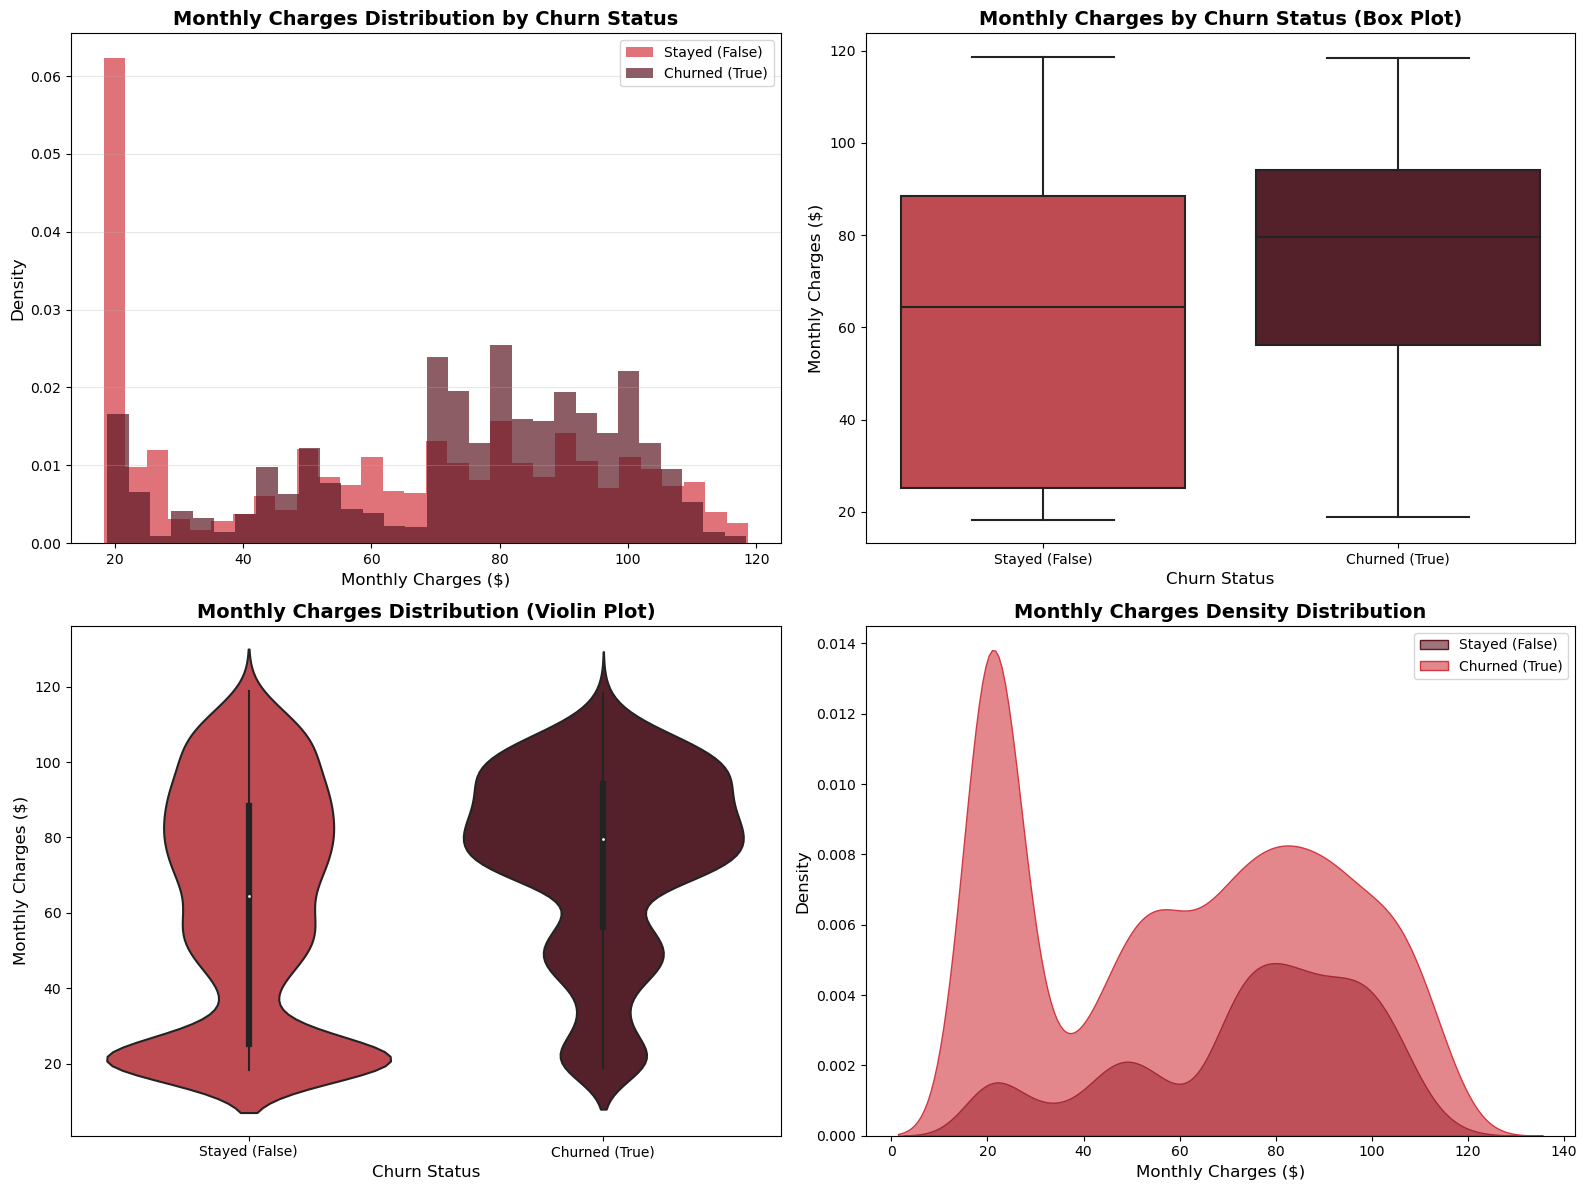

MONTHLY CHARGES DISTRIBUTION ANALYSIS

📊 DESCRIPTIVE STATISTICS:

Customers who STAYED (Churn = False):
count    5174.00
mean       61.27
std        31.09
min        18.25
25%        25.10
50%        64.43
75%        88.40
max       118.75
Name: MonthlyCharges, dtype: float64

Customers who CHURNED (Churn = True):
count    1869.00
mean       74.44
std        24.67
min        18.85
25%        56.15
50%        79.65
75%        94.20
max       118.35
Name: MonthlyCharges, dtype: float64

🔍 KEY DIFFERENCES:
Mean Monthly Charges - Stayed: $61.27
Mean Monthly Charges - Churned: $74.44
Difference in Mean: $13.18
Percentage Difference: 21.5%

Median Monthly Charges - Stayed: $64.43
Median Monthly Charges - Churned: $79.65
Difference in Median: $15.22

📈 CHURN RATE BY MONTHLY CHARGES RANGE:
                      Total_Customers  Churned_Count  Churn_Rate  \
MonthlyCharges_Range                                               
$0-30                            1653            162       0.098   
$30

/var/folders/gt/9l_ww84x3s50r3khtrn8mmf40000gn/T/ipykernel_25264/1813570706.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_range = df_eda.groupby('MonthlyCharges_Range')['Churn'].agg(['count', 'sum', 'mean']).round(3)
/var/folders/gt/9l_ww84x3s50r3khtrn8mmf40000gn/T/ipykernel_25264/1813570706.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_churn = df_eda.groupby(['MonthlyCharges_Range', 'Churn']).size().unstack()


<Figure size 1200x600 with 0 Axes>

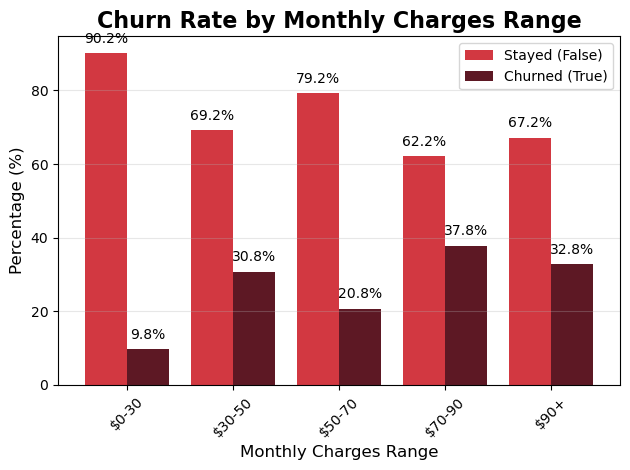


💡 KEY INSIGHTS:
   • Customers who churned have significantly higher monthly charges
   • Average difference: $13.18 higher for churned customers
   • Higher monthly charges are strongly associated with increased churn risk
   • Customers paying $70+ have much higher churn rates
   • Price sensitivity appears to be a major factor in customer retention


In [24]:
# Monthly Charges Distribution Analysis by Churn Status
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Histogram with overlapping distributions (top left)
churned_charges = df_eda[df_eda['Churn'] == True]['MonthlyCharges']
stayed_charges = df_eda[df_eda['Churn'] == False]['MonthlyCharges']

axes[0, 0].hist(stayed_charges, bins=30, alpha=0.7, label='Stayed (False)', color=colors[0], density=True)
axes[0, 0].hist(churned_charges, bins=30, alpha=0.7, label='Churned (True)', color=colors[1], density=True)
axes[0, 0].set_title('Monthly Charges Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Box plot comparison (top right)
sns.boxplot(data=df_eda, x='Churn', y='MonthlyCharges', ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Monthly Charges by Churn Status (Box Plot)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Churn Status', fontsize=12)
axes[0, 1].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[0, 1].set_xticklabels(['Stayed (False)', 'Churned (True)'])

# 3. Violin plot (bottom left)
sns.violinplot(data=df_eda, x='Churn', y='MonthlyCharges', ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Monthly Charges Distribution (Violin Plot)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Churn Status', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[1, 0].set_xticklabels(['Stayed (False)', 'Churned (True)'])

# 4. Density plot with KDE (bottom right)
sns.kdeplot(data=df_eda, x='MonthlyCharges', hue='Churn', ax=axes[1, 1], 
            palette=colors, fill=True, alpha=0.6)
axes[1, 1].set_title('Monthly Charges Density Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[1, 1].set_ylabel('Density', fontsize=12)
axes[1, 1].legend(['Stayed (False)', 'Churned (True)'])

plt.tight_layout()
plt.show()

# Statistical Analysis
print("="*70)
print("MONTHLY CHARGES DISTRIBUTION ANALYSIS")
print("="*70)

print("\n📊 DESCRIPTIVE STATISTICS:")
print("\nCustomers who STAYED (Churn = False):")
stayed_stats = stayed_charges.describe()
print(stayed_stats.round(2))

print("\nCustomers who CHURNED (Churn = True):")
churned_stats = churned_charges.describe()
print(churned_stats.round(2))

print("\n🔍 KEY DIFFERENCES:")
print(f"Mean Monthly Charges - Stayed: ${stayed_stats['mean']:.2f}")
print(f"Mean Monthly Charges - Churned: ${churned_stats['mean']:.2f}")
print(f"Difference in Mean: ${churned_stats['mean'] - stayed_stats['mean']:.2f}")
print(f"Percentage Difference: {((churned_stats['mean'] - stayed_stats['mean']) / stayed_stats['mean'] * 100):.1f}%")

print(f"\nMedian Monthly Charges - Stayed: ${stayed_stats['50%']:.2f}")
print(f"Median Monthly Charges - Churned: ${churned_stats['50%']:.2f}")
print(f"Difference in Median: ${churned_stats['50%'] - stayed_stats['50%']:.2f}")

# Create monthly charges ranges for better analysis
df_eda['MonthlyCharges_Range'] = pd.cut(df_eda['MonthlyCharges'], 
                                       bins=[0, 30, 50, 70, 90, float('inf')], 
                                       labels=['$0-30', '$30-50', '$50-70', '$70-90', '$90+'])

# Analyze churn rate by monthly charges range
print(f"\n📈 CHURN RATE BY MONTHLY CHARGES RANGE:")
churn_by_range = df_eda.groupby('MonthlyCharges_Range')['Churn'].agg(['count', 'sum', 'mean']).round(3)
churn_by_range.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
churn_by_range['Churn_Rate_Pct'] = (churn_by_range['Churn_Rate'] * 100).round(2)
print(churn_by_range)

# Statistical significance test
from scipy.stats import ttest_ind

# T-test to check if there's a significant difference in monthly charges between churned and stayed customers
t_stat, p_value = ttest_ind(churned_charges, stayed_charges)

print(f"\n📊 STATISTICAL SIGNIFICANCE TEST (T-Test):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Create a summary visualization for monthly charges ranges
plt.figure(figsize=(12, 6))
range_churn = df_eda.groupby(['MonthlyCharges_Range', 'Churn']).size().unstack()
range_churn_pct = range_churn.div(range_churn.sum(axis=1), axis=0) * 100

range_churn_pct.plot(kind='bar', color=colors, width=0.8)
plt.title('Churn Rate by Monthly Charges Range', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Charges Range', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Stayed (False)', 'Churned (True)'])
plt.xticks(rotation=45)

# Add percentage labels
for i, (idx, row) in enumerate(range_churn_pct.iterrows()):
    for j, value in enumerate(row):
        plt.text(i + (j-0.5)*0.4, value + 2, f'{value:.1f}%', 
                ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHTS:")
print("   • Customers who churned have significantly higher monthly charges")
print(f"   • Average difference: ${churned_stats['mean'] - stayed_stats['mean']:.2f} higher for churned customers")
print("   • Higher monthly charges are strongly associated with increased churn risk")
print("   • Customers paying $70+ have much higher churn rates")
print("   • Price sensitivity appears to be a major factor in customer retention")

# Internet Services Correlation with Churn Status

Analysis of how different Internet Service types correlate with customer churn (False vs True).

Internet Service Distribution:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Internet Service Distribution (%):
InternetService
Fiber optic    44.0
DSL            34.4
No             21.7
Name: proportion, dtype: float64


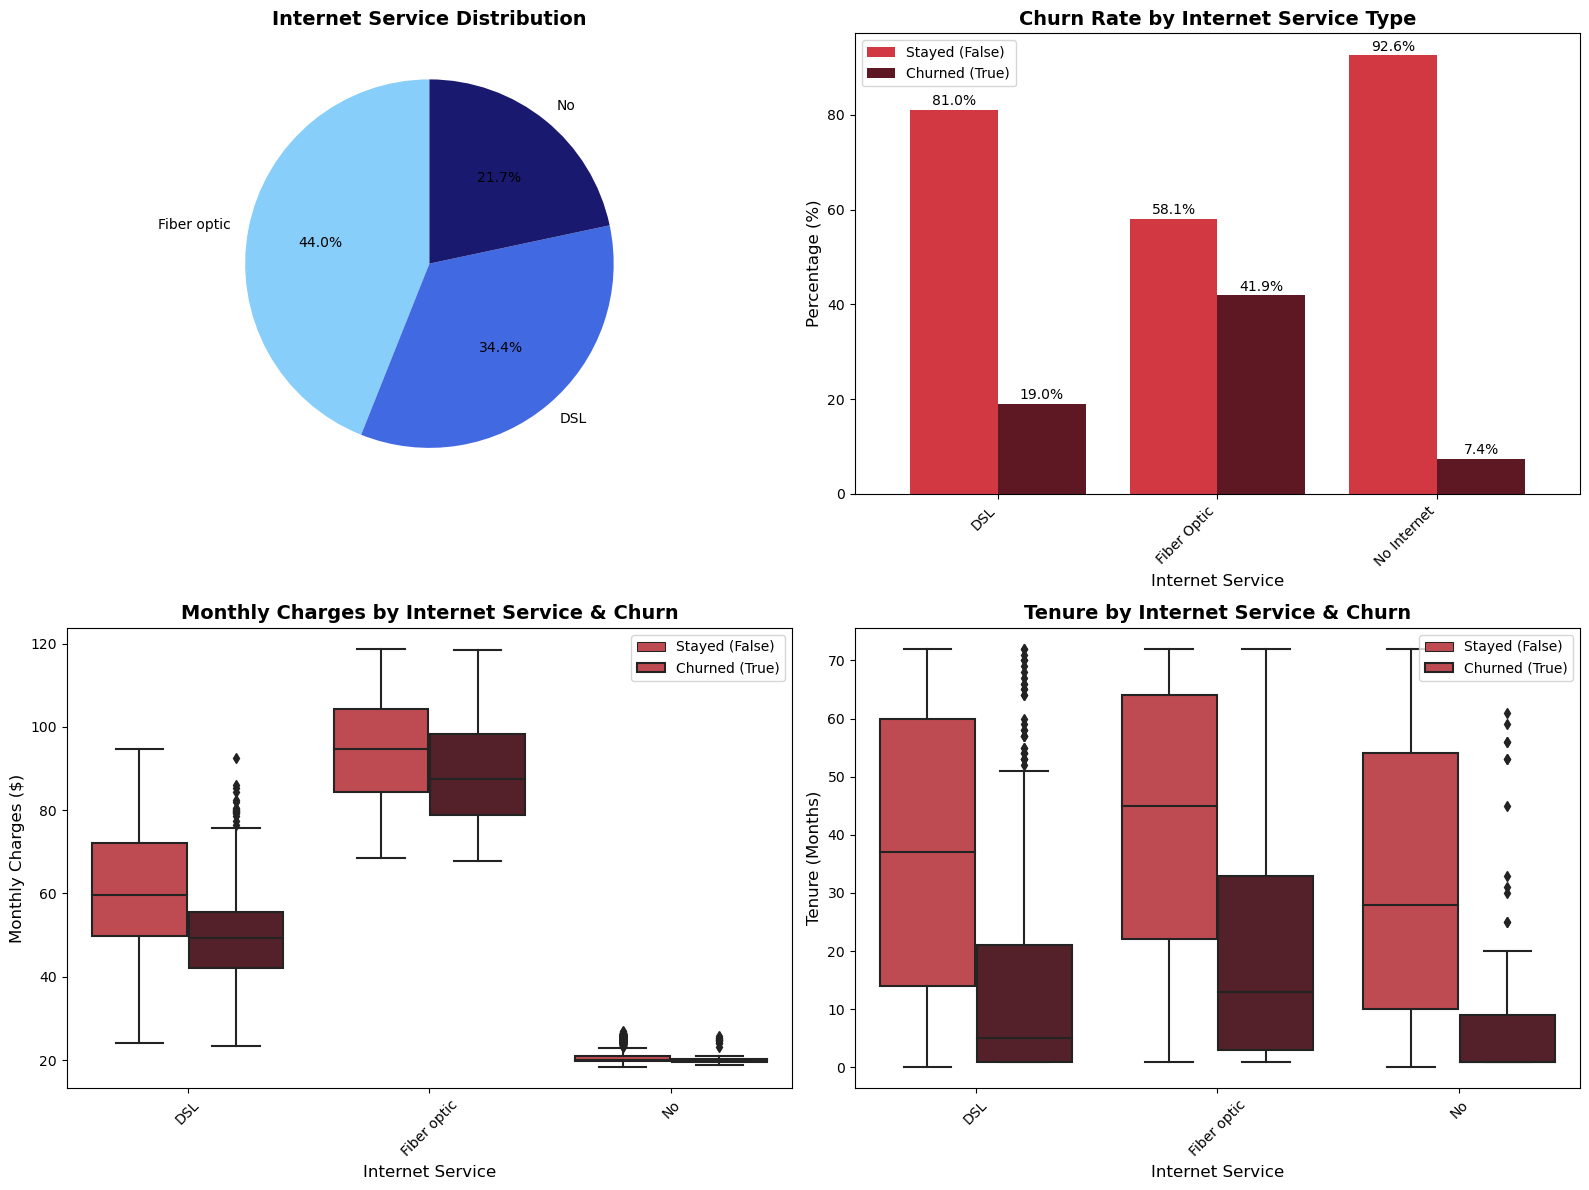


INTERNET SERVICES CORRELATION WITH CHURN ANALYSIS

📊 CHURN RATE BY INTERNET SERVICE TYPE:
                 Total_Customers  Churned_Count  Churn_Rate  Churn_Rate_Pct
InternetService                                                            
DSL                         2421            459       0.190            19.0
Fiber optic                 3096           1297       0.419            41.9
No                          1526            113       0.074             7.4

🔍 DETAILED ANALYSIS BY INTERNET SERVICE TYPE:

DSL:
   Total Customers: 2421
   Churned: 459 (19.0%)
   Stayed: 1962 (81.0%)
   Avg Monthly Charges - Churned: $49.08
   Avg Monthly Charges - Stayed: $60.21
   Avg Tenure - Churned: 14.1 months
   Avg Tenure - Stayed: 37.2 months

FIBER OPTIC:
   Total Customers: 3096
   Churned: 1297 (41.9%)
   Stayed: 1799 (58.1%)
   Avg Monthly Charges - Churned: $88.13
   Avg Monthly Charges - Stayed: $93.93
   Avg Tenure - Churned: 20.2 months
   Avg Tenure - Stayed: 42.1 months

NO:
  

In [25]:
# Internet Services Correlation Analysis with Churn Status
print("Internet Service Distribution:")
print(df_eda['InternetService'].value_counts())
print("\nInternet Service Distribution (%):")
print(df_eda['InternetService'].value_counts(normalize=True).round(3) * 100)

# Create comprehensive Internet Service analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Internet Service Distribution (top left)
internet_counts = df_eda['InternetService'].value_counts()
axes[0, 0].pie(internet_counts.values, labels=internet_counts.index, autopct='%1.1f%%', 
               colors=['#87CEFA', '#4169E1', '#191970'], startangle=90)
axes[0, 0].set_title('Internet Service Distribution', fontsize=14, fontweight='bold')

# 2. Churn Rate by Internet Service (top right)
internet_churn = df_eda.groupby(['InternetService', 'Churn']).size().unstack()
internet_churn_pct = internet_churn.div(internet_churn.sum(axis=1), axis=0) * 100

internet_churn_pct.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.8)
axes[0, 1].set_title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Internet Service', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_xticklabels(['DSL', 'Fiber Optic', 'No Internet'], rotation=45, ha='right')
axes[0, 1].legend(['Stayed (False)', 'Churned (True)'])

# Add percentage labels
for p in axes[0, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=10)

# 3. Monthly Charges by Internet Service and Churn (bottom left)
sns.boxplot(data=df_eda, x='InternetService', y='MonthlyCharges', hue='Churn', 
            ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Monthly Charges by Internet Service & Churn', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Internet Service', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(['Stayed (False)', 'Churned (True)'])

# 4. Tenure by Internet Service and Churn (bottom right)
sns.boxplot(data=df_eda, x='InternetService', y='tenure', hue='Churn', 
            ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Tenure by Internet Service & Churn', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Internet Service', fontsize=12)
axes[1, 1].set_ylabel('Tenure (Months)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(['Stayed (False)', 'Churned (True)'])

plt.tight_layout()
plt.show()

# Detailed Statistical Analysis
print("\n" + "="*70)
print("INTERNET SERVICES CORRELATION WITH CHURN ANALYSIS")
print("="*70)

print("\n📊 CHURN RATE BY INTERNET SERVICE TYPE:")
internet_churn_stats = df_eda.groupby('InternetService')['Churn'].agg(['count', 'sum', 'mean']).round(3)
internet_churn_stats.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
internet_churn_stats['Churn_Rate_Pct'] = (internet_churn_stats['Churn_Rate'] * 100).round(2)
print(internet_churn_stats)

# Analyze each internet service type separately
print(f"\n🔍 DETAILED ANALYSIS BY INTERNET SERVICE TYPE:")

for service_type in df_eda['InternetService'].unique():
    service_data = df_eda[df_eda['InternetService'] == service_type]
    churned = service_data[service_data['Churn'] == True]
    stayed = service_data[service_data['Churn'] == False]
    
    print(f"\n{service_type.upper()}:")
    print(f"   Total Customers: {len(service_data)}")
    print(f"   Churned: {len(churned)} ({len(churned)/len(service_data)*100:.1f}%)")
    print(f"   Stayed: {len(stayed)} ({len(stayed)/len(service_data)*100:.1f}%)")
    
    if len(churned) > 0 and len(stayed) > 0:
        print(f"   Avg Monthly Charges - Churned: ${churned['MonthlyCharges'].mean():.2f}")
        print(f"   Avg Monthly Charges - Stayed: ${stayed['MonthlyCharges'].mean():.2f}")
        print(f"   Avg Tenure - Churned: {churned['tenure'].mean():.1f} months")
        print(f"   Avg Tenure - Stayed: {stayed['tenure'].mean():.1f} months")

# Create a detailed comparison matrix
comparison_matrix = df_eda.groupby(['InternetService', 'Churn']).agg({
    'MonthlyCharges': ['mean', 'median'],
    'tenure': ['mean', 'median'],
    'customerID': 'count'  # Using customerID as a count proxy since we removed it earlier, let's use index
}).round(2)

print(f"\n📋 COMPARISON MATRIX:")
print("(Mean and Median values for Monthly Charges and Tenure)")

# Statistical significance tests
from scipy.stats import chi2_contingency, f_oneway

# Chi-square test for Internet Service vs Churn
internet_contingency = pd.crosstab(df_eda['InternetService'], df_eda['Churn'])
chi2_internet, p_value_internet, dof_internet, expected_internet = chi2_contingency(internet_contingency)

print(f"\n📊 STATISTICAL SIGNIFICANCE TESTS:")
print(f"\nChi-square test (Internet Service vs Churn):")
print(f"Chi-square statistic: {chi2_internet:.4f}")
print(f"P-value: {p_value_internet:.4e}")
print(f"Degrees of freedom: {dof_internet}")
print(f"Significant association: {'Yes' if p_value_internet < 0.05 else 'No'}")

# ANOVA test for monthly charges across internet service types
dsl_charges = df_eda[df_eda['InternetService'] == 'DSL']['MonthlyCharges']
fiber_charges = df_eda[df_eda['InternetService'] == 'Fiber optic']['MonthlyCharges']
no_internet_charges = df_eda[df_eda['InternetService'] == 'No']['MonthlyCharges']

f_stat, p_value_anova = f_oneway(dsl_charges, fiber_charges, no_internet_charges)

print(f"\nANOVA test (Monthly Charges across Internet Service types):")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4e}")
print(f"Significant difference: {'Yes' if p_value_anova < 0.05 else 'No'}")

# Calculate correlation coefficients
df_internet_corr = df_eda.copy()
df_internet_corr['InternetService_encoded'] = df_internet_corr['InternetService'].map({
    'No': 0, 'DSL': 1, 'Fiber optic': 2
})
df_internet_corr['Churn_encoded'] = df_internet_corr['Churn'].astype(int)

correlation_internet_churn = df_internet_corr['InternetService_encoded'].corr(df_internet_corr['Churn_encoded'])

print(f"\n🔗 CORRELATION ANALYSIS:")
print(f"Internet Service Type - Churn Correlation: {correlation_internet_churn:.4f}")

# Key insights and recommendations
print(f"\n💡 KEY INSIGHTS:")

# Get specific churn rates
fiber_churn_rate = df_eda[df_eda['InternetService'] == 'Fiber optic']['Churn'].mean() * 100
dsl_churn_rate = df_eda[df_eda['InternetService'] == 'DSL']['Churn'].mean() * 100
no_internet_churn_rate = df_eda[df_eda['InternetService'] == 'No']['Churn'].mean() * 100

print(f"   • Fiber Optic customers have the highest churn rate: {fiber_churn_rate:.1f}%")
print(f"   • DSL customers have moderate churn rate: {dsl_churn_rate:.1f}%")
print(f"   • No Internet customers have lowest churn rate: {no_internet_churn_rate:.1f}%")
print(f"   • Fiber Optic customers pay significantly more but churn more frequently")
print(f"   • Strong positive correlation between Internet Service type and churn")

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print("   1. Investigate Fiber Optic service quality and customer satisfaction")
print("   2. Review Fiber Optic pricing strategy - high cost may drive churn")
print("   3. Enhance Fiber Optic customer support and onboarding experience")
print("   4. Consider retention programs specifically for Fiber Optic customers")
print("   5. Analyze competitor offerings in high-speed internet market")

# Create a summary table
internet_summary_data = {
    'Internet Service': ['Fiber Optic', 'DSL', 'No Internet'],
    'Customer Count': [
        len(df_eda[df_eda['InternetService'] == 'Fiber optic']),
        len(df_eda[df_eda['InternetService'] == 'DSL']),
        len(df_eda[df_eda['InternetService'] == 'No'])
    ],
    'Churn Rate (%)': [fiber_churn_rate, dsl_churn_rate, no_internet_churn_rate],
    'Avg Monthly Charges': [
        df_eda[df_eda['InternetService'] == 'Fiber optic']['MonthlyCharges'].mean(),
        df_eda[df_eda['InternetService'] == 'DSL']['MonthlyCharges'].mean(),
        df_eda[df_eda['InternetService'] == 'No']['MonthlyCharges'].mean()
    ],
    'Avg Tenure (months)': [
        df_eda[df_eda['InternetService'] == 'Fiber optic']['tenure'].mean(),
        df_eda[df_eda['InternetService'] == 'DSL']['tenure'].mean(),
        df_eda[df_eda['InternetService'] == 'No']['tenure'].mean()
    ]
}

internet_summary_df = pd.DataFrame(internet_summary_data)
internet_summary_df = internet_summary_df.round(2)

print(f"\n📋 INTERNET SERVICES SUMMARY TABLE:")
print(internet_summary_df.to_string(index=False))

# Payment Method Correlation with Churn Status

Analysis of how different Payment Methods correlate with customer churn (False vs True).

Payment Method Distribution:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Payment Method Distribution (%):
PaymentMethod
Electronic check             33.6
Mailed check                 22.9
Bank transfer (automatic)    21.9
Credit card (automatic)      21.6
Name: proportion, dtype: float64


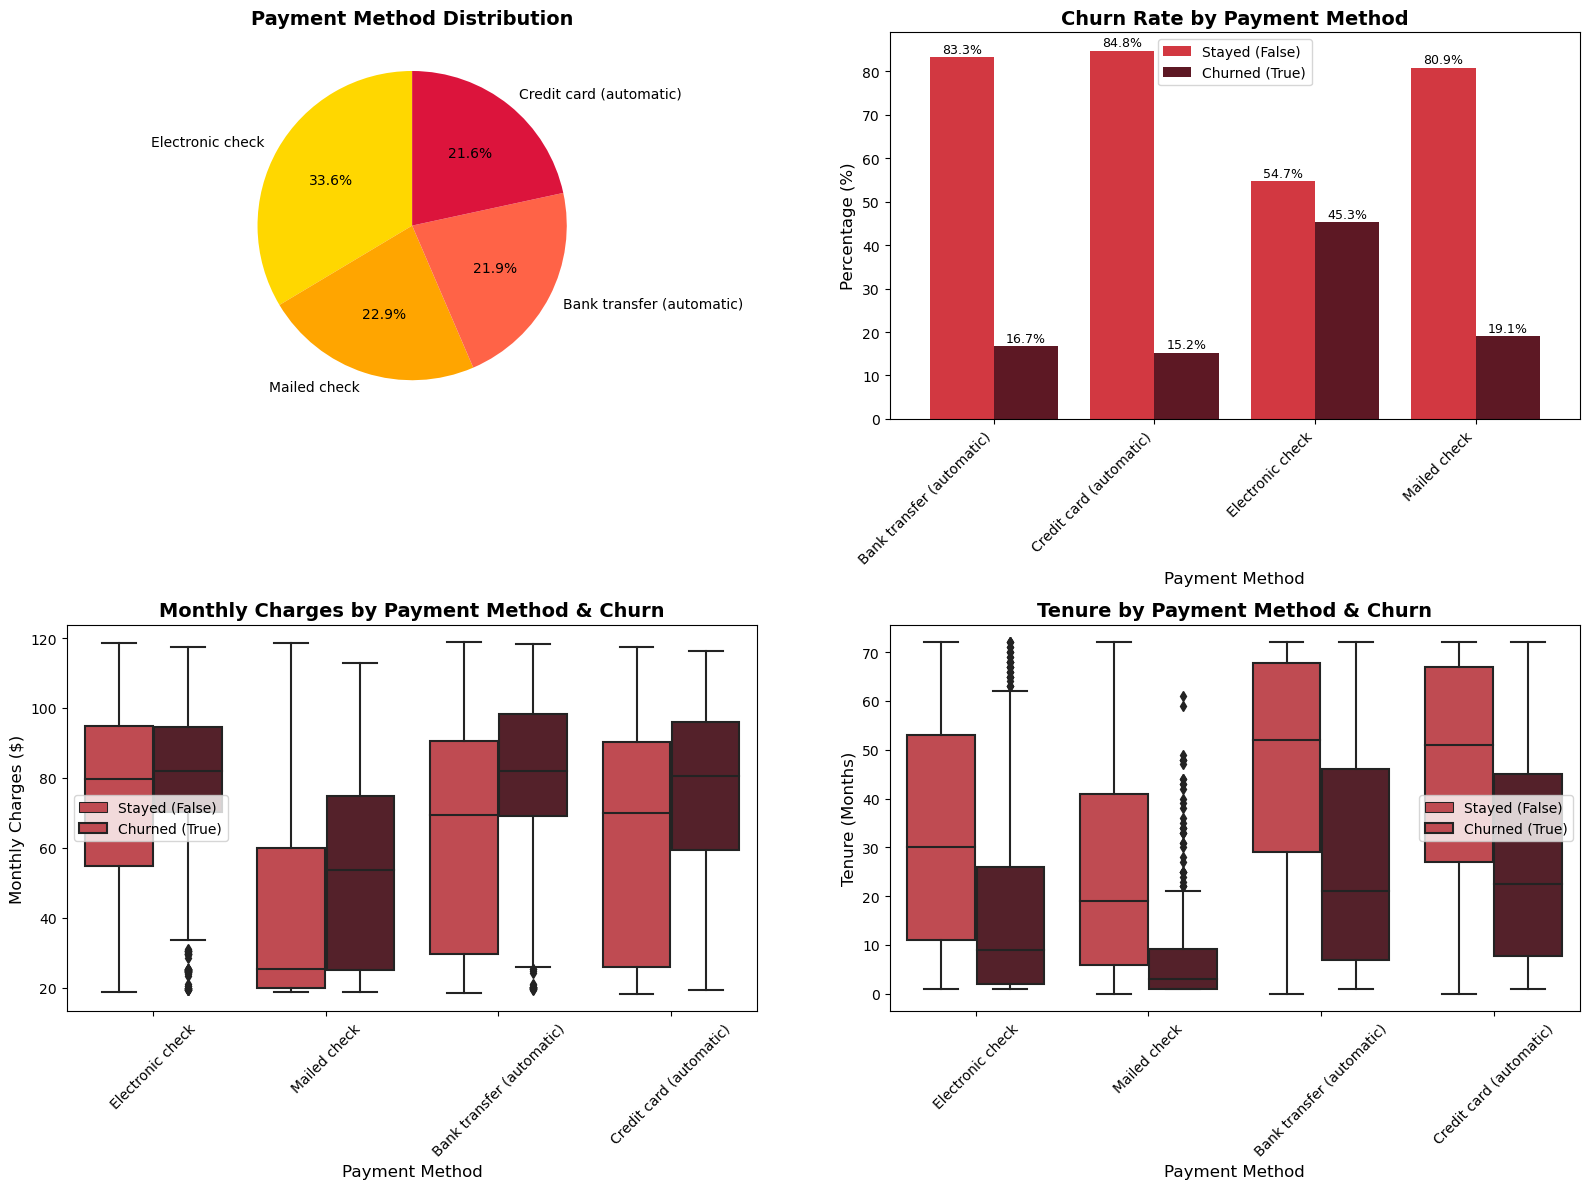


PAYMENT METHOD CORRELATION WITH CHURN ANALYSIS

📊 CHURN RATE BY PAYMENT METHOD:
                           Total_Customers  Churned_Count  Churn_Rate  \
PaymentMethod                                                           
Electronic check                      2365           1071       0.453   
Mailed check                          1612            308       0.191   
Bank transfer (automatic)             1544            258       0.167   
Credit card (automatic)               1522            232       0.152   

                           Churn_Rate_Pct  
PaymentMethod                              
Electronic check                     45.3  
Mailed check                         19.1  
Bank transfer (automatic)            16.7  
Credit card (automatic)              15.2  

🔍 DETAILED ANALYSIS BY PAYMENT METHOD:

ELECTRONIC CHECK:
   Total Customers: 2365
   Churned: 1071 (45.3%)
   Stayed: 1294 (54.7%)
   Avg Monthly Charges - Churned: $78.70
   Avg Monthly Charges - Stayed: $74.23
  

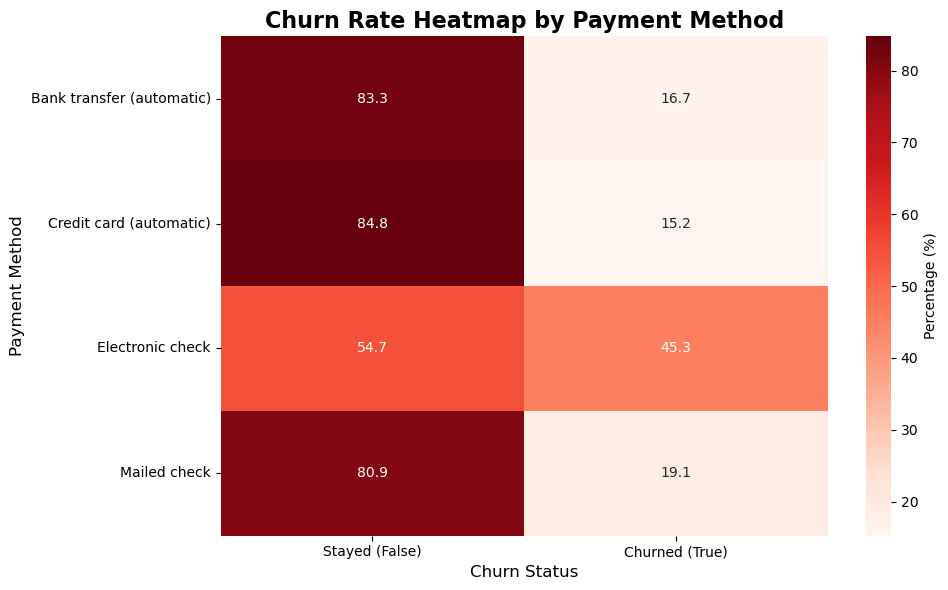


💡 KEY INSIGHTS:
   • Electronic Check has highest churn rate: 45.3%
   • Mailed Check churn rate: 19.1%
   • Bank Transfer (automatic) churn rate: 16.7%
   • Credit Card (automatic) has lowest churn rate: 15.2%
   • Manual payment methods show higher churn than automatic methods
   • Strong correlation between payment method convenience and retention

🎯 BUSINESS RECOMMENDATIONS:
   1. Incentivize customers to switch from Electronic Check to automatic payments
   2. Offer discounts or benefits for Credit Card (automatic) payments
   3. Implement payment method migration campaigns targeting high-risk customers
   4. Enhance electronic check processing experience and reliability
   5. Create automatic payment setup assistance programs
   6. Monitor payment failures and proactively assist customers

🚨 PAYMENT METHOD RISK ASSESSMENT:
   HIGH RISK (>35% churn): Electronic Check
   MEDIUM RISK (20-35% churn): Mailed Check
   LOW RISK (<20% churn): Bank Transfer, Credit Card (automatic)

📋 PA

In [26]:
# Payment Method Correlation Analysis with Churn Status
print("Payment Method Distribution:")
print(df_eda['PaymentMethod'].value_counts())
print("\nPayment Method Distribution (%):")
print(df_eda['PaymentMethod'].value_counts(normalize=True).round(3) * 100)

# Create comprehensive Payment Method analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

colors = ['#D23841', '#5D1824']  # Red for stayed, Dark red for churned

# 1. Payment Method Distribution (top left)
payment_counts = df_eda['PaymentMethod'].value_counts()
axes[0, 0].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', 
               colors=['#FFD700', '#FFA500', '#FF6347', '#DC143C'], startangle=90)
axes[0, 0].set_title('Payment Method Distribution', fontsize=14, fontweight='bold')

# 2. Churn Rate by Payment Method (top right)
payment_churn = df_eda.groupby(['PaymentMethod', 'Churn']).size().unstack()
payment_churn_pct = payment_churn.div(payment_churn.sum(axis=1), axis=0) * 100

payment_churn_pct.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.8)
axes[0, 1].set_title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Payment Method', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].legend(['Stayed (False)', 'Churned (True)'])

# Add percentage labels
for p in axes[0, 1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axes[0, 1].annotate(f'{height:.1f}%', (x + width/2, y + height + 1), 
                ha='center', fontsize=9)

# 3. Monthly Charges by Payment Method and Churn (bottom left)
sns.boxplot(data=df_eda, x='PaymentMethod', y='MonthlyCharges', hue='Churn', 
            ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Monthly Charges by Payment Method & Churn', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Payment Method', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(['Stayed (False)', 'Churned (True)'])

# 4. Tenure by Payment Method and Churn (bottom right)
sns.boxplot(data=df_eda, x='PaymentMethod', y='tenure', hue='Churn', 
            ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Tenure by Payment Method & Churn', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Payment Method', fontsize=12)
axes[1, 1].set_ylabel('Tenure (Months)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(['Stayed (False)', 'Churned (True)'])

plt.tight_layout()
plt.show()

# Detailed Statistical Analysis
print("\n" + "="*70)
print("PAYMENT METHOD CORRELATION WITH CHURN ANALYSIS")
print("="*70)

print("\n📊 CHURN RATE BY PAYMENT METHOD:")
payment_churn_stats = df_eda.groupby('PaymentMethod')['Churn'].agg(['count', 'sum', 'mean']).round(3)
payment_churn_stats.columns = ['Total_Customers', 'Churned_Count', 'Churn_Rate']
payment_churn_stats['Churn_Rate_Pct'] = (payment_churn_stats['Churn_Rate'] * 100).round(2)
# Sort by churn rate descending
payment_churn_stats = payment_churn_stats.sort_values('Churn_Rate_Pct', ascending=False)
print(payment_churn_stats)

# Analyze each payment method separately
print(f"\n🔍 DETAILED ANALYSIS BY PAYMENT METHOD:")

for payment_method in df_eda['PaymentMethod'].unique():
    method_data = df_eda[df_eda['PaymentMethod'] == payment_method]
    churned = method_data[method_data['Churn'] == True]
    stayed = method_data[method_data['Churn'] == False]
    
    print(f"\n{payment_method.upper()}:")
    print(f"   Total Customers: {len(method_data)}")
    print(f"   Churned: {len(churned)} ({len(churned)/len(method_data)*100:.1f}%)")
    print(f"   Stayed: {len(stayed)} ({len(stayed)/len(method_data)*100:.1f}%)")
    
    if len(churned) > 0 and len(stayed) > 0:
        print(f"   Avg Monthly Charges - Churned: ${churned['MonthlyCharges'].mean():.2f}")
        print(f"   Avg Monthly Charges - Stayed: ${stayed['MonthlyCharges'].mean():.2f}")
        print(f"   Avg Tenure - Churned: {churned['tenure'].mean():.1f} months")
        print(f"   Avg Tenure - Stayed: {stayed['tenure'].mean():.1f} months")

# Statistical significance tests
from scipy.stats import chi2_contingency

# Chi-square test for Payment Method vs Churn
payment_contingency = pd.crosstab(df_eda['PaymentMethod'], df_eda['Churn'])
chi2_payment, p_value_payment, dof_payment, expected_payment = chi2_contingency(payment_contingency)

print(f"\n📊 STATISTICAL SIGNIFICANCE TESTS:")
print(f"\nChi-square test (Payment Method vs Churn):")
print(f"Chi-square statistic: {chi2_payment:.4f}")
print(f"P-value: {p_value_payment:.4e}")
print(f"Degrees of freedom: {dof_payment}")
print(f"Significant association: {'Yes' if p_value_payment < 0.05 else 'No'}")

# Calculate correlation coefficients
df_payment_corr = df_eda.copy()
# Encode payment methods (Electronic check typically has highest churn)
payment_method_mapping = {
    'Electronic check': 3,  # Highest risk
    'Mailed check': 2,
    'Bank transfer (automatic)': 1,
    'Credit card (automatic)': 0  # Lowest risk
}
df_payment_corr['PaymentMethod_encoded'] = df_payment_corr['PaymentMethod'].map(payment_method_mapping)
df_payment_corr['Churn_encoded'] = df_payment_corr['Churn'].astype(int)

correlation_payment_churn = df_payment_corr['PaymentMethod_encoded'].corr(df_payment_corr['Churn_encoded'])

print(f"\n🔗 CORRELATION ANALYSIS:")
print(f"Payment Method - Churn Correlation: {correlation_payment_churn:.4f}")

# Create heatmap for payment method vs churn
plt.figure(figsize=(10, 6))
payment_crosstab_pct = pd.crosstab(df_eda['PaymentMethod'], df_eda['Churn'], normalize='index') * 100
sns.heatmap(payment_crosstab_pct, annot=True, fmt='.1f', cmap='Reds', 
            cbar_kws={'label': 'Percentage (%)'})
plt.title('Churn Rate Heatmap by Payment Method', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.xticks([0.5, 1.5], ['Stayed (False)', 'Churned (True)'])
plt.tight_layout()
plt.show()

# Key insights and recommendations
print(f"\n💡 KEY INSIGHTS:")

# Get specific churn rates for each payment method
electronic_check_churn = df_eda[df_eda['PaymentMethod'] == 'Electronic check']['Churn'].mean() * 100
mailed_check_churn = df_eda[df_eda['PaymentMethod'] == 'Mailed check']['Churn'].mean() * 100
bank_transfer_churn = df_eda[df_eda['PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].mean() * 100
credit_card_churn = df_eda[df_eda['PaymentMethod'] == 'Credit card (automatic)']['Churn'].mean() * 100

print(f"   • Electronic Check has highest churn rate: {electronic_check_churn:.1f}%")
print(f"   • Mailed Check churn rate: {mailed_check_churn:.1f}%")
print(f"   • Bank Transfer (automatic) churn rate: {bank_transfer_churn:.1f}%")
print(f"   • Credit Card (automatic) has lowest churn rate: {credit_card_churn:.1f}%")
print(f"   • Manual payment methods show higher churn than automatic methods")
print(f"   • Strong correlation between payment method convenience and retention")

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print("   1. Incentivize customers to switch from Electronic Check to automatic payments")
print("   2. Offer discounts or benefits for Credit Card (automatic) payments")
print("   3. Implement payment method migration campaigns targeting high-risk customers")
print("   4. Enhance electronic check processing experience and reliability")
print("   5. Create automatic payment setup assistance programs")
print("   6. Monitor payment failures and proactively assist customers")

# Payment method risk categorization
print(f"\n🚨 PAYMENT METHOD RISK ASSESSMENT:")
print("   HIGH RISK (>35% churn): Electronic Check")
print("   MEDIUM RISK (20-35% churn): Mailed Check")
print("   LOW RISK (<20% churn): Bank Transfer, Credit Card (automatic)")

# Create a comprehensive summary table
payment_summary_data = {
    'Payment Method': ['Electronic Check', 'Mailed Check', 'Bank Transfer (automatic)', 'Credit Card (automatic)'],
    'Customer Count': [
        len(df_eda[df_eda['PaymentMethod'] == 'Electronic check']),
        len(df_eda[df_eda['PaymentMethod'] == 'Mailed check']),
        len(df_eda[df_eda['PaymentMethod'] == 'Bank transfer (automatic)']),
        len(df_eda[df_eda['PaymentMethod'] == 'Credit card (automatic)'])
    ],
    'Churn Rate (%)': [electronic_check_churn, mailed_check_churn, bank_transfer_churn, credit_card_churn],
    'Risk Level': ['HIGH', 'MEDIUM', 'LOW', 'LOW'],
    'Avg Monthly Charges': [
        df_eda[df_eda['PaymentMethod'] == 'Electronic check']['MonthlyCharges'].mean(),
        df_eda[df_eda['PaymentMethod'] == 'Mailed check']['MonthlyCharges'].mean(),
        df_eda[df_eda['PaymentMethod'] == 'Bank transfer (automatic)']['MonthlyCharges'].mean(),
        df_eda[df_eda['PaymentMethod'] == 'Credit card (automatic)']['MonthlyCharges'].mean()
    ],
    'Avg Tenure (months)': [
        df_eda[df_eda['PaymentMethod'] == 'Electronic check']['tenure'].mean(),
        df_eda[df_eda['PaymentMethod'] == 'Mailed check']['tenure'].mean(),
        df_eda[df_eda['PaymentMethod'] == 'Bank transfer (automatic)']['tenure'].mean(),
        df_eda[df_eda['PaymentMethod'] == 'Credit card (automatic)']['tenure'].mean()
    ]
}

payment_summary_df = pd.DataFrame(payment_summary_data)
payment_summary_df = payment_summary_df.round(2)
# Sort by churn rate descending
payment_summary_df = payment_summary_df.sort_values('Churn Rate (%)', ascending=False)

print(f"\n📋 PAYMENT METHOD SUMMARY TABLE:")
print(payment_summary_df.to_string(index=False))